### The Data
This book builds on previous notebooks regarding feature enginnering and feature selection however in this book we will train a model per 1JHC and 1JHN coupling types. We will additionally feature enhance those datasets by more details about the eletronic structure of the molecules.

Note: this book will only consider data from the following csv files: train, structures and molecule_structures


In [50]:
import pandas as pd

input_folder = './input'

train = pd.read_csv(f'{input_folder}/train.csv')
structures = pd.read_csv(f'{input_folder}/structures.csv')
molecular_structures = pd.read_csv(f'{input_folder}/molecule_structures.csv')


In [51]:
f'Train shape: {train.shape}'

'Train shape: (4658147, 6)'

In [52]:
f'Structures shape: {structures.shape}'

'Structures shape: (2358657, 6)'

In [53]:
f'molecular structures shape: {molecular_structures.shape}'

'molecular structures shape: (1586325, 32)'

In [54]:
print(f"There are {train['type'].nunique()} unique coupling types: {train['type'].unique()}")

There are 8 unique coupling types: ['1JHC' '2JHH' '1JHN' '2JHN' '2JHC' '3JHH' '3JHC' '3JHN']


#### Merging training and structure data sources into one training data

Code for joining data is from this kernel: https://www.kaggle.com/seriousran/just-speed-up-calculate-distance-from-benchmark

In [55]:
def map_atom_info(df, atom_idx):
    df = pd.merge(df, structures, how = 'left',
                  left_on  = ['molecule_name', f'atom_index_{atom_idx}'],
                  right_on = ['molecule_name',  'atom_index'])
    
    df = df.drop('atom_index', axis=1)
    df = df.rename(columns={'atom': f'atom_{atom_idx}',
                            'x': f'x_{atom_idx}',
                            'y': f'y_{atom_idx}',
                            'z': f'z_{atom_idx}'})
    return df

In [56]:
train = map_atom_info(train, 0)
train = map_atom_info(train, 1)

In [57]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001


#### Merging new training and molecule_structures data sources into one training data

In [58]:
def map_molecule_info(df):
    df = pd.merge(df, molecular_structures, how = 'left',
                  left_on  = ['molecule_name', 'atom_index_0', 'atom_index_1'],
                  right_on = ['molecule_name',  'atom_0', 'atom_1'])
    
    df = df.drop('atom_0_y', axis=1)
    df = df.drop('atom_1_y', axis=1)
    df = df.drop('atom_1_1_level_NB', axis=1)
    df = df.drop('atom_1_2_level_NB', axis=1)
    
    df = df.rename(columns={'atom_0_x': 'atom_0',
                            'atom_1_x': 'atom_1'})
    return df

In [59]:
train = map_molecule_info(train)

In [60]:
print(train.shape)

(4658147, 41)


In [61]:
import pandas

pandas.set_option('display.max_columns', None)

train.head(10)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,atom_0_CH3,atom_1_CH3,atom_0_CH2,atom_1_CH2,atom_0_CH1,atom_1_CH1,atom_0_CH0,atom_1_CH0,atom_0_NH2,atom_1_NH2,atom_0_NH1,atom_1_NH1,atom_0_NH0,atom_1_NH0,atom_0_OH1,atom_1_OH1,atom_0_OH0,atom_1_OH0,is_in_ring,has_aromatic_bond,is_primary_amide,is_secondary_amide,is_tertiary_amide,is_ester,is_carbonyl,bond_order,bond_length
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.091953
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.091952
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541,H,1.011731,1.463751,0.000277,H,-0.540815,1.447527,-0.876644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.2548,H,1.011731,1.463751,0.000277,H,-0.523814,1.437933,0.906397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093,H,-0.540815,1.447527,-0.876644,C,-0.012698,1.085804,0.008001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.091946
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.2543,H,-0.540815,1.447527,-0.876644,H,-0.523814,1.437933,0.906397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095,H,-0.523814,1.437933,0.906397,C,-0.012698,1.085804,0.008001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.091948


In [62]:
import numpy as np

train.iloc[:,14:40] = train.iloc[:,14:40].fillna(0.0).astype(np.int8)
train.head()


,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,atom_0_CH3,atom_1_CH3,atom_0_CH2,atom_1_CH2,atom_0_CH1,atom_1_CH1,atom_0_CH0,atom_1_CH0,atom_0_NH2,atom_1_NH2,atom_0_NH1,atom_1_NH1,atom_0_NH0,atom_1_NH0,atom_0_OH1,atom_1_OH1,atom_0_OH0,atom_1_OH0,is_in_ring,has_aromatic_bond,is_primary_amide,is_secondary_amide,is_tertiary_amide,is_ester,is_carbonyl,bond_order,bond_length
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.091953
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.091952


In [64]:
train.loc[train['molecule_name'] == 'dsgdb9nsd_000050']

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,atom_0_CH3,atom_1_CH3,atom_0_CH2,atom_1_CH2,atom_0_CH1,atom_1_CH1,atom_0_CH0,atom_1_CH0,atom_0_NH2,atom_1_NH2,atom_0_NH1,atom_1_NH1,atom_0_NH0,atom_1_NH0,atom_0_OH1,atom_1_OH1,atom_0_OH0,atom_1_OH0,is_in_ring,has_aromatic_bond,is_primary_amide,is_secondary_amide,is_tertiary_amide,is_ester,is_carbonyl,bond_order,bond_length
696,696,dsgdb9nsd_000050,5,0,1JHN,59.301000,H,-0.832432,1.927727,0.021230,N,-0.008297,1.353628,0.009960,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.004448
697,697,dsgdb9nsd_000050,5,1,2JHC,2.826250,H,-0.832432,1.927727,0.021230,C,1.280333,1.824574,-0.000225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
698,698,dsgdb9nsd_000050,5,2,3JHC,6.737830,H,-0.832432,1.927727,0.021230,C,2.122166,0.736989,-0.014456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
699,699,dsgdb9nsd_000050,5,3,3JHC,6.737890,H,-0.832432,1.927727,0.021230,C,1.308499,-0.431096,-0.012842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
700,700,dsgdb9nsd_000050,5,4,2JHC,2.826320,H,-0.832432,1.927727,0.021230,C,-0.003428,-0.018369,0.002357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
701,701,dsgdb9nsd_000050,5,6,3JHH,0.689723,H,-0.832432,1.927727,0.021230,H,1.484718,2.883126,0.003543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
702,702,dsgdb9nsd_000050,5,9,3JHH,0.689683,H,-0.832432,1.927727,0.021230,H,-0.925516,-0.576971,0.008394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
703,703,dsgdb9nsd_000050,6,0,2JHN,3.805590,H,1.484718,2.883126,0.003543,N,-0.008297,1.353628,0.009960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
704,704,dsgdb9nsd_000050,6,1,1JHC,125.638000,H,1.484718,2.883126,0.003543,C,1.280333,1.824574,-0.000225,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.078110
705,705,dsgdb9nsd_000050,6,2,2JHC,5.964290,H,1.484718,2.883126,0.003543,C,2.122166,0.736989,-0.014456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


#### Create separate data sets for 1JHC and 1JHN

### Feature engineering
#### Distances between atoms

In [7]:
def add_distances(df):
    df['dx']=df['x_1']-df['x_0']
    df['dy']=df['y_1']-df['y_0']
    df['dz']=df['z_1']-df['z_0']
    df['dx2']=df['dx']**2
    df['dy2']=df['dy']**2
    df['dz2']=df['dz']**2
    df['distance']=(df['dx2'] + df['dy2'] + df['dz2'])**(1/2)
    return df

In [8]:
train=add_distances(train)

In [9]:
import numpy as np

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                c_prec = df[col].apply(lambda x: np.finfo(x).precision).max()
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max and c_prec == np.finfo(np.float16).precision:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max and c_prec == np.finfo(np.float32).precision:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
                    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [10]:
def additional_features(df):
    df['molecule_couples'] = df.groupby('molecule_name')['id'].transform('count')
    df['molecule_dist_mean'] = df.groupby('molecule_name')['distance'].transform('mean')
    df['molecule_dist_min'] = df.groupby('molecule_name')['distance'].transform('min')
    df['molecule_dist_max'] = df.groupby('molecule_name')['distance'].transform('max')
    df['molecule_dist_std'] = df.groupby('molecule_name')['distance'].transform('std')
    df['atom_0_couples_count'] = df.groupby(['molecule_name', 'atom_index_0'])['id'].transform('count')
    df['atom_1_couples_count'] = df.groupby(['molecule_name', 'atom_index_1'])['id'].transform('count')

    num_cols = ['distance'] # 'dx', 'dy', 'dz'
    cat_cols = ['atom_index_0', 'atom_index_1']
    aggs = ['mean', 'std', 'max', 'min']
    for col in cat_cols:
        df[f'molecule_{col}_count'] = df.groupby('molecule_name')[col].transform('count')

    for cat_col in cat_cols:
        for num_col in num_cols:
            for agg in aggs:
                df[f'molecule_{cat_col}_{num_col}_{agg}'] = df.groupby(['molecule_name', cat_col])[num_col].transform(agg)
                df[f'molecule_{cat_col}_{num_col}_{agg}_diff'] = df[f'molecule_{cat_col}_{num_col}_{agg}'] - df[num_col]
                df[f'molecule_{cat_col}_{num_col}_{agg}_div'] = df[f'molecule_{cat_col}_{num_col}_{agg}'] / df[num_col]

    df = reduce_mem_usage(df)
    return df

In [11]:
train=additional_features(train)
#test=additional_features(test)
# started 1005 ongoing at 1035 finished training, test start 1035 

Mem. usage decreased to 1732.52 Mb (11.4% reduction)


In [12]:
train.shape

(4658147, 54)

In [ ]:
stop here stop here

#### Handling Category data

For the above columns I will consider atom_index's ordinal data. I will argue that atom's are pure labels, that is, nominal data.

LabelEncoder could be used for the ordinal data but as they are already ordered integers we will leave them be. One Hot Encoding is used for nominal data.

In [13]:
train_atom_0 = pd.get_dummies(train['atom_0'], prefix='atom_0')
#test_atom_0 = pd.get_dummies(test['atom_0'], prefix='atom_0')

train = pd.concat([train, train_atom_0], axis=1)
#test = pd.concat([test, test_atom_0], axis=1)

train_atom_1 = pd.get_dummies(train['atom_1'], prefix='atom_1')
#test_atom_1 = pd.get_dummies(test['atom_1'], prefix='atom_1')

train = pd.concat([train, train_atom_1], axis=1)
#test = pd.concat([test, test_atom_1], axis=1)


#### Remove not useful columns

In [14]:
train = train.drop('id', axis=1)
train = train.drop('molecule_name', axis=1)
train = train.drop('atom_0', axis=1)
train = train.drop('atom_1', axis=1)

#test = test.drop('id', axis=1)
#test = test.drop('molecule_name', axis=1)
#test = test.drop('atom_0', axis=1)
#test = test.drop('atom_1', axis=1)


#### Let's split the data into different datasets based on coupling types

In [15]:
train_map={}
for coupling_type, df_by_type in train.groupby('type'):
    df_by_type = df_by_type.drop('type', axis=1)
    train_map[coupling_type] = df_by_type

In [16]:
train_map.keys()

dict_keys(['1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'])

In [17]:
[df.shape for df in train_map.values()]

[(709416, 53),
 (43363, 53),
 (1140674, 53),
 (378036, 53),
 (119253, 53),
 (1510379, 53),
 (590611, 53),
 (166415, 53)]

Just checking the numbers for the test dataset

In [ ]:
#test_map={}
#for coupling_type, df_by_type in test.groupby('type'):
#    df_by_type = df_by_type.drop('type', axis=1)
#    test_map[coupling_type] = df_by_type

In [ ]:
#test_map.keys()

In [ ]:
#[df.shape for df in test_map.values()]

### Data splitting

In [91]:
train_map['1JHC'].columns

KeyError: '1JHC'

In [26]:
from sklearn.model_selection import train_test_split

train_map_split = {}
for key, dataset in train_map.items():
    y = dataset['scalar_coupling_constant']
    X = dataset.drop('scalar_coupling_constant', axis=1)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 13, test_size = 0.25)
    train_map_split[key] = (X_train, X_valid, y_train, y_valid)

In [92]:
train_map_split['1JHC'][0].head()

,atom_index_0,atom_index_1,x_0,y_0,z_0,x_1,y_1,z_1,dx,dy,...,molecule_atom_index_1_distance_max,molecule_atom_index_1_distance_max_diff,molecule_atom_index_1_distance_max_div,molecule_atom_index_1_distance_min,molecule_atom_index_1_distance_min_diff,molecule_atom_index_1_distance_min_div,atom_0_H,atom_1_C,atom_1_H,atom_1_N
2662234,17,6,-0.848313,-0.722608,2.695692,0.181974,-0.355070,2.639212,1.030287,0.367538,...,2.994453,1.899115,2.733817,1.094863,-0.000475,0.999567,1,1,0,0
1861995,21,6,1.680221,-2.124947,-3.178018,2.009854,-2.357947,-2.154981,0.329633,-0.233000,...,3.271329,2.171533,2.974486,1.099796,0.000000,1.000000,1,1,0,0
1413733,14,6,3.378742,3.861877,0.385266,2.536057,3.249472,0.708234,-0.842685,-0.612405,...,3.061795,1.971169,2.807373,1.090627,0.000000,1.000000,1,1,0,0
121298,10,0,-0.583418,1.810196,0.852186,0.004972,1.360666,0.046756,0.588390,-0.449531,...,1.094074,0.000000,1.000000,1.090596,-0.003479,0.996821,1,1,0,0
4643406,11,0,0.440245,1.771128,1.077663,0.017357,1.434540,0.123716,-0.422888,-0.336588,...,1.096422,0.000000,1.000000,1.095056,-0.001366,0.998754,1,1,0,0


#### Cleanup - we need the resources

In [34]:
import gc

del train
del structures

for key, dataset in train_map.items():
    del dataset
train_map.clear()

gc.collect()

242

### The model

In [35]:
from catboost import CatBoostRegressor

model_map = {}
for key, datasets in train_map_split.items():
    f'Training model on coupling type: {key}'
    model = CatBoostRegressor(iterations=2000, depth= 13, random_seed = 23, task_type = "GPU", devices='0')
    model.fit(datasets[0], datasets[2], eval_set=(datasets[1], datasets[3]), logging_level='Verbose')
    model_map[key] = model

0:	learn: 93.8471616	test: 93.8510990	best: 93.8510990 (0)	total: 113ms	remaining: 3m 45s
1:	learn: 91.0511863	test: 91.0548285	best: 91.0548285 (1)	total: 175ms	remaining: 2m 55s
2:	learn: 88.3427089	test: 88.3469189	best: 88.3469189 (2)	total: 238ms	remaining: 2m 38s
3:	learn: 85.7177337	test: 85.7224122	best: 85.7224122 (3)	total: 301ms	remaining: 2m 30s
4:	learn: 83.1649230	test: 83.1694326	best: 83.1694326 (4)	total: 366ms	remaining: 2m 26s
5:	learn: 80.6933354	test: 80.6981904	best: 80.6981904 (5)	total: 428ms	remaining: 2m 22s
6:	learn: 78.2937946	test: 78.2986171	best: 78.2986171 (6)	total: 487ms	remaining: 2m 18s
7:	learn: 75.9661670	test: 75.9708348	best: 75.9708348 (7)	total: 544ms	remaining: 2m 15s
8:	learn: 73.7106789	test: 73.7156502	best: 73.7156502 (8)	total: 601ms	remaining: 2m 12s
9:	learn: 71.5207312	test: 71.5258447	best: 71.5258447 (9)	total: 657ms	remaining: 2m 10s
10:	learn: 69.3973357	test: 69.4022043	best: 69.4022043 (10)	total: 714ms	remaining: 2m 9s
11:	learn

90:	learn: 7.8018190	test: 7.8252362	best: 7.8252362 (90)	total: 5.26s	remaining: 1m 50s
91:	learn: 7.6519057	test: 7.6759494	best: 7.6759494 (91)	total: 5.33s	remaining: 1m 50s
92:	learn: 7.5084282	test: 7.5327658	best: 7.5327658 (92)	total: 5.38s	remaining: 1m 50s
93:	learn: 7.3688982	test: 7.3936578	best: 7.3936578 (93)	total: 5.43s	remaining: 1m 50s
94:	learn: 7.2367207	test: 7.2617128	best: 7.2617128 (94)	total: 5.49s	remaining: 1m 50s
95:	learn: 7.1093302	test: 7.1347869	best: 7.1347869 (95)	total: 5.55s	remaining: 1m 50s
96:	learn: 6.9859174	test: 7.0117266	best: 7.0117266 (96)	total: 5.61s	remaining: 1m 50s
97:	learn: 6.8677871	test: 6.8941017	best: 6.8941017 (97)	total: 5.66s	remaining: 1m 49s
98:	learn: 6.7538925	test: 6.7805155	best: 6.7805155 (98)	total: 5.72s	remaining: 1m 49s
99:	learn: 6.6445631	test: 6.6714750	best: 6.6714750 (99)	total: 5.78s	remaining: 1m 49s
100:	learn: 6.5411053	test: 6.5682680	best: 6.5682680 (100)	total: 5.83s	remaining: 1m 49s
101:	learn: 6.44141

184:	learn: 4.1820478	test: 4.2393638	best: 4.2393638 (184)	total: 10.7s	remaining: 1m 45s
185:	learn: 4.1755251	test: 4.2330323	best: 4.2330323 (185)	total: 10.8s	remaining: 1m 45s
186:	learn: 4.1696491	test: 4.2274242	best: 4.2274242 (186)	total: 10.9s	remaining: 1m 45s
187:	learn: 4.1650027	test: 4.2229969	best: 4.2229969 (187)	total: 10.9s	remaining: 1m 45s
188:	learn: 4.1599975	test: 4.2184553	best: 4.2184553 (188)	total: 11s	remaining: 1m 45s
189:	learn: 4.1544131	test: 4.2133982	best: 4.2133982 (189)	total: 11s	remaining: 1m 45s
190:	learn: 4.1496658	test: 4.2089971	best: 4.2089971 (190)	total: 11.1s	remaining: 1m 45s
191:	learn: 4.1455573	test: 4.2051669	best: 4.2051669 (191)	total: 11.2s	remaining: 1m 45s
192:	learn: 4.1399728	test: 4.2003050	best: 4.2003050 (192)	total: 11.2s	remaining: 1m 45s
193:	learn: 4.1339615	test: 4.1947676	best: 4.1947676 (193)	total: 11.3s	remaining: 1m 45s
194:	learn: 4.1293946	test: 4.1909094	best: 4.1909094 (194)	total: 11.4s	remaining: 1m 45s
195

276:	learn: 3.7980710	test: 3.8951124	best: 3.8951124 (276)	total: 16.4s	remaining: 1m 42s
277:	learn: 3.7947434	test: 3.8919634	best: 3.8919634 (277)	total: 16.5s	remaining: 1m 42s
278:	learn: 3.7922266	test: 3.8898225	best: 3.8898225 (278)	total: 16.5s	remaining: 1m 41s
279:	learn: 3.7878922	test: 3.8863855	best: 3.8863855 (279)	total: 16.6s	remaining: 1m 41s
280:	learn: 3.7853642	test: 3.8839109	best: 3.8839109 (280)	total: 16.7s	remaining: 1m 41s
281:	learn: 3.7814744	test: 3.8805714	best: 3.8805714 (281)	total: 16.7s	remaining: 1m 41s
282:	learn: 3.7785781	test: 3.8778417	best: 3.8778417 (282)	total: 16.8s	remaining: 1m 41s
283:	learn: 3.7749619	test: 3.8746661	best: 3.8746661 (283)	total: 16.8s	remaining: 1m 41s
284:	learn: 3.7728537	test: 3.8726814	best: 3.8726814 (284)	total: 16.9s	remaining: 1m 41s
285:	learn: 3.7708767	test: 3.8710366	best: 3.8710366 (285)	total: 17s	remaining: 1m 41s
286:	learn: 3.7687608	test: 3.8692287	best: 3.8692287 (286)	total: 17s	remaining: 1m 41s
287

370:	learn: 3.5460831	test: 3.6772071	best: 3.6772071 (370)	total: 22.2s	remaining: 1m 37s
371:	learn: 3.5435759	test: 3.6751437	best: 3.6751437 (371)	total: 22.2s	remaining: 1m 37s
372:	learn: 3.5407831	test: 3.6728567	best: 3.6728567 (372)	total: 22.3s	remaining: 1m 37s
373:	learn: 3.5388463	test: 3.6713053	best: 3.6713053 (373)	total: 22.4s	remaining: 1m 37s
374:	learn: 3.5363498	test: 3.6690098	best: 3.6690098 (374)	total: 22.4s	remaining: 1m 37s
375:	learn: 3.5345426	test: 3.6672713	best: 3.6672713 (375)	total: 22.5s	remaining: 1m 37s
376:	learn: 3.5323638	test: 3.6652178	best: 3.6652178 (376)	total: 22.5s	remaining: 1m 36s
377:	learn: 3.5305906	test: 3.6635502	best: 3.6635502 (377)	total: 22.6s	remaining: 1m 36s
378:	learn: 3.5283984	test: 3.6615841	best: 3.6615841 (378)	total: 22.6s	remaining: 1m 36s
379:	learn: 3.5258314	test: 3.6596474	best: 3.6596474 (379)	total: 22.7s	remaining: 1m 36s
380:	learn: 3.5235667	test: 3.6576755	best: 3.6576755 (380)	total: 22.8s	remaining: 1m 36s

461:	learn: 3.3631642	test: 3.5258872	best: 3.5258872 (461)	total: 27.8s	remaining: 1m 32s
462:	learn: 3.3615801	test: 3.5244869	best: 3.5244869 (462)	total: 27.8s	remaining: 1m 32s
463:	learn: 3.3592274	test: 3.5229019	best: 3.5229019 (463)	total: 27.9s	remaining: 1m 32s
464:	learn: 3.3573994	test: 3.5213275	best: 3.5213275 (464)	total: 28s	remaining: 1m 32s
465:	learn: 3.3552261	test: 3.5194585	best: 3.5194585 (465)	total: 28s	remaining: 1m 32s
466:	learn: 3.3529956	test: 3.5179412	best: 3.5179412 (466)	total: 28.1s	remaining: 1m 32s
467:	learn: 3.3518698	test: 3.5170330	best: 3.5170330 (467)	total: 28.2s	remaining: 1m 32s
468:	learn: 3.3504029	test: 3.5160364	best: 3.5160364 (468)	total: 28.2s	remaining: 1m 32s
469:	learn: 3.3485838	test: 3.5144533	best: 3.5144533 (469)	total: 28.3s	remaining: 1m 32s
470:	learn: 3.3464898	test: 3.5128289	best: 3.5128289 (470)	total: 28.3s	remaining: 1m 32s
471:	learn: 3.3449136	test: 3.5114037	best: 3.5114037 (471)	total: 28.4s	remaining: 1m 31s
472

554:	learn: 3.2144080	test: 3.4072155	best: 3.4072155 (554)	total: 33.6s	remaining: 1m 27s
555:	learn: 3.2131605	test: 3.4061335	best: 3.4061335 (555)	total: 33.6s	remaining: 1m 27s
556:	learn: 3.2113066	test: 3.4048237	best: 3.4048237 (556)	total: 33.7s	remaining: 1m 27s
557:	learn: 3.2099422	test: 3.4038787	best: 3.4038787 (557)	total: 33.7s	remaining: 1m 27s
558:	learn: 3.2084959	test: 3.4028357	best: 3.4028357 (558)	total: 33.8s	remaining: 1m 27s
559:	learn: 3.2071095	test: 3.4016737	best: 3.4016737 (559)	total: 33.9s	remaining: 1m 27s
560:	learn: 3.2057917	test: 3.4007109	best: 3.4007109 (560)	total: 33.9s	remaining: 1m 27s
561:	learn: 3.2049646	test: 3.3999470	best: 3.3999470 (561)	total: 34s	remaining: 1m 26s
562:	learn: 3.2032889	test: 3.3988407	best: 3.3988407 (562)	total: 34.1s	remaining: 1m 26s
563:	learn: 3.2018411	test: 3.3975290	best: 3.3975290 (563)	total: 34.1s	remaining: 1m 26s
564:	learn: 3.2006416	test: 3.3964422	best: 3.3964422 (564)	total: 34.2s	remaining: 1m 26s
5

645:	learn: 3.0971706	test: 3.3153589	best: 3.3153589 (645)	total: 39.1s	remaining: 1m 22s
646:	learn: 3.0962523	test: 3.3146513	best: 3.3146513 (646)	total: 39.2s	remaining: 1m 21s
647:	learn: 3.0951812	test: 3.3138120	best: 3.3138120 (647)	total: 39.3s	remaining: 1m 21s
648:	learn: 3.0940320	test: 3.3128948	best: 3.3128948 (648)	total: 39.3s	remaining: 1m 21s
649:	learn: 3.0928641	test: 3.3120281	best: 3.3120281 (649)	total: 39.4s	remaining: 1m 21s
650:	learn: 3.0921633	test: 3.3115276	best: 3.3115276 (650)	total: 39.4s	remaining: 1m 21s
651:	learn: 3.0910108	test: 3.3105510	best: 3.3105510 (651)	total: 39.5s	remaining: 1m 21s
652:	learn: 3.0895997	test: 3.3093137	best: 3.3093137 (652)	total: 39.6s	remaining: 1m 21s
653:	learn: 3.0887237	test: 3.3087405	best: 3.3087405 (653)	total: 39.6s	remaining: 1m 21s
654:	learn: 3.0873858	test: 3.3075724	best: 3.3075724 (654)	total: 39.7s	remaining: 1m 21s
655:	learn: 3.0861035	test: 3.3067712	best: 3.3067712 (655)	total: 39.7s	remaining: 1m 21s

736:	learn: 2.9915824	test: 3.2364307	best: 3.2364307 (736)	total: 44.7s	remaining: 1m 16s
737:	learn: 2.9908004	test: 3.2357530	best: 3.2357530 (737)	total: 44.8s	remaining: 1m 16s
738:	learn: 2.9897999	test: 3.2349065	best: 3.2349065 (738)	total: 44.9s	remaining: 1m 16s
739:	learn: 2.9882655	test: 3.2339469	best: 3.2339469 (739)	total: 44.9s	remaining: 1m 16s
740:	learn: 2.9870467	test: 3.2332061	best: 3.2332061 (740)	total: 45s	remaining: 1m 16s
741:	learn: 2.9853761	test: 3.2321105	best: 3.2321105 (741)	total: 45.1s	remaining: 1m 16s
742:	learn: 2.9846858	test: 3.2315651	best: 3.2315651 (742)	total: 45.1s	remaining: 1m 16s
743:	learn: 2.9838184	test: 3.2309539	best: 3.2309539 (743)	total: 45.2s	remaining: 1m 16s
744:	learn: 2.9826221	test: 3.2302416	best: 3.2302416 (744)	total: 45.2s	remaining: 1m 16s
745:	learn: 2.9815322	test: 3.2295811	best: 3.2295811 (745)	total: 45.3s	remaining: 1m 16s
746:	learn: 2.9799141	test: 3.2284334	best: 3.2284334 (746)	total: 45.4s	remaining: 1m 16s
7

828:	learn: 2.8967126	test: 3.1700819	best: 3.1700819 (828)	total: 50.5s	remaining: 1m 11s
829:	learn: 2.8949872	test: 3.1689223	best: 3.1689223 (829)	total: 50.6s	remaining: 1m 11s
830:	learn: 2.8940432	test: 3.1683594	best: 3.1683594 (830)	total: 50.6s	remaining: 1m 11s
831:	learn: 2.8932654	test: 3.1678760	best: 3.1678760 (831)	total: 50.7s	remaining: 1m 11s
832:	learn: 2.8920267	test: 3.1668978	best: 3.1668978 (832)	total: 50.8s	remaining: 1m 11s
833:	learn: 2.8909680	test: 3.1662825	best: 3.1662825 (833)	total: 50.8s	remaining: 1m 11s
834:	learn: 2.8901857	test: 3.1657695	best: 3.1657695 (834)	total: 50.9s	remaining: 1m 10s
835:	learn: 2.8895598	test: 3.1652042	best: 3.1652042 (835)	total: 50.9s	remaining: 1m 10s
836:	learn: 2.8883893	test: 3.1643294	best: 3.1643294 (836)	total: 51s	remaining: 1m 10s
837:	learn: 2.8876845	test: 3.1639099	best: 3.1639099 (837)	total: 51.1s	remaining: 1m 10s
838:	learn: 2.8860751	test: 3.1629142	best: 3.1629142 (838)	total: 51.1s	remaining: 1m 10s
8

920:	learn: 2.8118248	test: 3.1124074	best: 3.1124074 (920)	total: 56.3s	remaining: 1m 5s
921:	learn: 2.8111874	test: 3.1118373	best: 3.1118373 (921)	total: 56.3s	remaining: 1m 5s
922:	learn: 2.8103494	test: 3.1112637	best: 3.1112637 (922)	total: 56.4s	remaining: 1m 5s
923:	learn: 2.8093139	test: 3.1105700	best: 3.1105700 (923)	total: 56.4s	remaining: 1m 5s
924:	learn: 2.8082940	test: 3.1097744	best: 3.1097744 (924)	total: 56.5s	remaining: 1m 5s
925:	learn: 2.8075289	test: 3.1091351	best: 3.1091351 (925)	total: 56.6s	remaining: 1m 5s
926:	learn: 2.8069910	test: 3.1087415	best: 3.1087415 (926)	total: 56.6s	remaining: 1m 5s
927:	learn: 2.8056453	test: 3.1080978	best: 3.1080978 (927)	total: 56.7s	remaining: 1m 5s
928:	learn: 2.8051665	test: 3.1076693	best: 3.1076693 (928)	total: 56.8s	remaining: 1m 5s
929:	learn: 2.8041637	test: 3.1070477	best: 3.1070477 (929)	total: 56.8s	remaining: 1m 5s
930:	learn: 2.8034017	test: 3.1065322	best: 3.1065322 (930)	total: 56.9s	remaining: 1m 5s
931:	learn

1013:	learn: 2.7320712	test: 3.0598828	best: 3.0598828 (1013)	total: 1m 2s	remaining: 1m
1014:	learn: 2.7309083	test: 3.0592932	best: 3.0592932 (1014)	total: 1m 2s	remaining: 1m
1015:	learn: 2.7300721	test: 3.0586793	best: 3.0586793 (1015)	total: 1m 2s	remaining: 1m
1016:	learn: 2.7285126	test: 3.0579317	best: 3.0579317 (1016)	total: 1m 2s	remaining: 1m
1017:	learn: 2.7276047	test: 3.0572849	best: 3.0572849 (1017)	total: 1m 2s	remaining: 1m
1018:	learn: 2.7268974	test: 3.0568084	best: 3.0568084 (1018)	total: 1m 2s	remaining: 1m
1019:	learn: 2.7263182	test: 3.0562548	best: 3.0562548 (1019)	total: 1m 2s	remaining: 1m
1020:	learn: 2.7254444	test: 3.0556851	best: 3.0556851 (1020)	total: 1m 2s	remaining: 60s
1021:	learn: 2.7247647	test: 3.0553120	best: 3.0553120 (1021)	total: 1m 2s	remaining: 59.9s
1022:	learn: 2.7237409	test: 3.0547268	best: 3.0547268 (1022)	total: 1m 2s	remaining: 59.9s
1023:	learn: 2.7224846	test: 3.0540344	best: 3.0540344 (1023)	total: 1m 2s	remaining: 59.8s
1024:	learn

1105:	learn: 2.6593603	test: 3.0137237	best: 3.0137237 (1105)	total: 1m 7s	remaining: 54.9s
1106:	learn: 2.6586975	test: 3.0132262	best: 3.0132262 (1106)	total: 1m 8s	remaining: 54.9s
1107:	learn: 2.6581948	test: 3.0128921	best: 3.0128921 (1107)	total: 1m 8s	remaining: 54.8s
1108:	learn: 2.6576922	test: 3.0126659	best: 3.0126659 (1108)	total: 1m 8s	remaining: 54.8s
1109:	learn: 2.6564543	test: 3.0119782	best: 3.0119782 (1109)	total: 1m 8s	remaining: 54.7s
1110:	learn: 2.6553867	test: 3.0114180	best: 3.0114180 (1110)	total: 1m 8s	remaining: 54.6s
1111:	learn: 2.6543709	test: 3.0107523	best: 3.0107523 (1111)	total: 1m 8s	remaining: 54.6s
1112:	learn: 2.6539308	test: 3.0103807	best: 3.0103807 (1112)	total: 1m 8s	remaining: 54.5s
1113:	learn: 2.6532912	test: 3.0100227	best: 3.0100227 (1113)	total: 1m 8s	remaining: 54.5s
1114:	learn: 2.6524591	test: 3.0093817	best: 3.0093817 (1114)	total: 1m 8s	remaining: 54.4s
1115:	learn: 2.6517861	test: 3.0089876	best: 3.0089876 (1115)	total: 1m 8s	remai

1195:	learn: 2.5926916	test: 2.9730060	best: 2.9730060 (1195)	total: 1m 13s	remaining: 49.5s
1196:	learn: 2.5923111	test: 2.9727843	best: 2.9727843 (1196)	total: 1m 13s	remaining: 49.5s
1197:	learn: 2.5916409	test: 2.9724366	best: 2.9724366 (1197)	total: 1m 13s	remaining: 49.4s
1198:	learn: 2.5910287	test: 2.9720343	best: 2.9720343 (1198)	total: 1m 13s	remaining: 49.3s
1199:	learn: 2.5905783	test: 2.9716804	best: 2.9716804 (1199)	total: 1m 13s	remaining: 49.3s
1200:	learn: 2.5898027	test: 2.9711241	best: 2.9711241 (1200)	total: 1m 13s	remaining: 49.2s
1201:	learn: 2.5888768	test: 2.9704986	best: 2.9704986 (1201)	total: 1m 14s	remaining: 49.1s
1202:	learn: 2.5879338	test: 2.9700705	best: 2.9700705 (1202)	total: 1m 14s	remaining: 49.1s
1203:	learn: 2.5876581	test: 2.9698616	best: 2.9698616 (1203)	total: 1m 14s	remaining: 49s
1204:	learn: 2.5869937	test: 2.9695671	best: 2.9695671 (1204)	total: 1m 14s	remaining: 49s
1205:	learn: 2.5864100	test: 2.9692908	best: 2.9692908 (1205)	total: 1m 14

1285:	learn: 2.5319642	test: 2.9365572	best: 2.9365572 (1285)	total: 1m 19s	remaining: 44s
1286:	learn: 2.5315045	test: 2.9361937	best: 2.9361937 (1286)	total: 1m 19s	remaining: 44s
1287:	learn: 2.5310031	test: 2.9358917	best: 2.9358917 (1287)	total: 1m 19s	remaining: 43.9s
1288:	learn: 2.5304714	test: 2.9356063	best: 2.9356063 (1288)	total: 1m 19s	remaining: 43.8s
1289:	learn: 2.5296862	test: 2.9350746	best: 2.9350746 (1289)	total: 1m 19s	remaining: 43.8s
1290:	learn: 2.5288702	test: 2.9346006	best: 2.9346006 (1290)	total: 1m 19s	remaining: 43.7s
1291:	learn: 2.5278359	test: 2.9339627	best: 2.9339627 (1291)	total: 1m 19s	remaining: 43.7s
1292:	learn: 2.5272968	test: 2.9336691	best: 2.9336691 (1292)	total: 1m 19s	remaining: 43.6s
1293:	learn: 2.5265154	test: 2.9331042	best: 2.9331042 (1293)	total: 1m 19s	remaining: 43.5s
1294:	learn: 2.5258317	test: 2.9328131	best: 2.9328131 (1294)	total: 1m 19s	remaining: 43.5s
1295:	learn: 2.5251660	test: 2.9323483	best: 2.9323483 (1295)	total: 1m 19

1376:	learn: 2.4760664	test: 2.9043622	best: 2.9043622 (1376)	total: 1m 25s	remaining: 38.5s
1377:	learn: 2.4755946	test: 2.9039589	best: 2.9039589 (1377)	total: 1m 25s	remaining: 38.4s
1378:	learn: 2.4751479	test: 2.9037297	best: 2.9037297 (1378)	total: 1m 25s	remaining: 38.3s
1379:	learn: 2.4746635	test: 2.9034208	best: 2.9034208 (1379)	total: 1m 25s	remaining: 38.3s
1380:	learn: 2.4740077	test: 2.9030805	best: 2.9030805 (1380)	total: 1m 25s	remaining: 38.2s
1381:	learn: 2.4735990	test: 2.9027236	best: 2.9027236 (1381)	total: 1m 25s	remaining: 38.2s
1382:	learn: 2.4730224	test: 2.9023930	best: 2.9023930 (1382)	total: 1m 25s	remaining: 38.1s
1383:	learn: 2.4725548	test: 2.9019499	best: 2.9019499 (1383)	total: 1m 25s	remaining: 38s
1384:	learn: 2.4717012	test: 2.9015561	best: 2.9015561 (1384)	total: 1m 25s	remaining: 38s
1385:	learn: 2.4711512	test: 2.9012290	best: 2.9012290 (1385)	total: 1m 25s	remaining: 37.9s
1386:	learn: 2.4703583	test: 2.9008008	best: 2.9008008 (1386)	total: 1m 25

1465:	learn: 2.4251355	test: 2.8755866	best: 2.8755866 (1465)	total: 1m 30s	remaining: 33s
1466:	learn: 2.4245440	test: 2.8753228	best: 2.8753228 (1466)	total: 1m 30s	remaining: 33s
1467:	learn: 2.4240575	test: 2.8750049	best: 2.8750049 (1467)	total: 1m 30s	remaining: 32.9s
1468:	learn: 2.4235143	test: 2.8747796	best: 2.8747796 (1468)	total: 1m 30s	remaining: 32.8s
1469:	learn: 2.4228716	test: 2.8744693	best: 2.8744693 (1469)	total: 1m 30s	remaining: 32.8s
1470:	learn: 2.4221682	test: 2.8740658	best: 2.8740658 (1470)	total: 1m 30s	remaining: 32.7s
1471:	learn: 2.4212653	test: 2.8735618	best: 2.8735618 (1471)	total: 1m 31s	remaining: 32.7s
1472:	learn: 2.4205892	test: 2.8731176	best: 2.8731176 (1472)	total: 1m 31s	remaining: 32.6s
1473:	learn: 2.4200029	test: 2.8727424	best: 2.8727424 (1473)	total: 1m 31s	remaining: 32.5s
1474:	learn: 2.4196330	test: 2.8724554	best: 2.8724554 (1474)	total: 1m 31s	remaining: 32.5s
1475:	learn: 2.4192415	test: 2.8722146	best: 2.8722146 (1475)	total: 1m 31

1554:	learn: 2.3736407	test: 2.8478937	best: 2.8478937 (1554)	total: 1m 36s	remaining: 27.6s
1555:	learn: 2.3728816	test: 2.8475412	best: 2.8475412 (1555)	total: 1m 36s	remaining: 27.5s
1556:	learn: 2.3720973	test: 2.8471135	best: 2.8471135 (1556)	total: 1m 36s	remaining: 27.4s
1557:	learn: 2.3711506	test: 2.8464065	best: 2.8464065 (1557)	total: 1m 36s	remaining: 27.4s
1558:	learn: 2.3704227	test: 2.8461685	best: 2.8461685 (1558)	total: 1m 36s	remaining: 27.3s
1559:	learn: 2.3696390	test: 2.8458979	best: 2.8458979 (1559)	total: 1m 36s	remaining: 27.3s
1560:	learn: 2.3686496	test: 2.8455757	best: 2.8455757 (1560)	total: 1m 36s	remaining: 27.2s
1561:	learn: 2.3680831	test: 2.8452578	best: 2.8452578 (1561)	total: 1m 36s	remaining: 27.1s
1562:	learn: 2.3673849	test: 2.8448431	best: 2.8448431 (1562)	total: 1m 36s	remaining: 27.1s
1563:	learn: 2.3669871	test: 2.8446157	best: 2.8446157 (1563)	total: 1m 36s	remaining: 27s
1564:	learn: 2.3666909	test: 2.8444484	best: 2.8444484 (1564)	total: 1m 

1646:	learn: 2.3217271	test: 2.8205996	best: 2.8205996 (1646)	total: 1m 42s	remaining: 21.9s
1647:	learn: 2.3213742	test: 2.8203013	best: 2.8203013 (1647)	total: 1m 42s	remaining: 21.8s
1648:	learn: 2.3205147	test: 2.8197750	best: 2.8197750 (1648)	total: 1m 42s	remaining: 21.8s
1649:	learn: 2.3199895	test: 2.8195336	best: 2.8195336 (1649)	total: 1m 42s	remaining: 21.7s
1650:	learn: 2.3193001	test: 2.8190453	best: 2.8190453 (1650)	total: 1m 42s	remaining: 21.7s
1651:	learn: 2.3185822	test: 2.8187245	best: 2.8187245 (1651)	total: 1m 42s	remaining: 21.6s
1652:	learn: 2.3177892	test: 2.8183974	best: 2.8183974 (1652)	total: 1m 42s	remaining: 21.5s
1653:	learn: 2.3173657	test: 2.8182371	best: 2.8182371 (1653)	total: 1m 42s	remaining: 21.5s
1654:	learn: 2.3168026	test: 2.8179266	best: 2.8179266 (1654)	total: 1m 42s	remaining: 21.4s
1655:	learn: 2.3162129	test: 2.8176860	best: 2.8176860 (1655)	total: 1m 42s	remaining: 21.4s
1656:	learn: 2.3159594	test: 2.8175111	best: 2.8175111 (1656)	total: 1

1736:	learn: 2.2761503	test: 2.7961290	best: 2.7961290 (1736)	total: 1m 47s	remaining: 16.3s
1737:	learn: 2.2756930	test: 2.7959279	best: 2.7959279 (1737)	total: 1m 48s	remaining: 16.3s
1738:	learn: 2.2753558	test: 2.7956887	best: 2.7956887 (1738)	total: 1m 48s	remaining: 16.2s
1739:	learn: 2.2749289	test: 2.7955129	best: 2.7955129 (1739)	total: 1m 48s	remaining: 16.2s
1740:	learn: 2.2745354	test: 2.7952728	best: 2.7952728 (1740)	total: 1m 48s	remaining: 16.1s
1741:	learn: 2.2741021	test: 2.7951396	best: 2.7951396 (1741)	total: 1m 48s	remaining: 16s
1742:	learn: 2.2735744	test: 2.7948753	best: 2.7948753 (1742)	total: 1m 48s	remaining: 16s
1743:	learn: 2.2729305	test: 2.7946594	best: 2.7946594 (1743)	total: 1m 48s	remaining: 15.9s
1744:	learn: 2.2724723	test: 2.7944159	best: 2.7944159 (1744)	total: 1m 48s	remaining: 15.8s
1745:	learn: 2.2717943	test: 2.7940792	best: 2.7940792 (1745)	total: 1m 48s	remaining: 15.8s
1746:	learn: 2.2711301	test: 2.7938621	best: 2.7938621 (1746)	total: 1m 48

1825:	learn: 2.2311944	test: 2.7745221	best: 2.7745221 (1825)	total: 1m 53s	remaining: 10.8s
1826:	learn: 2.2309099	test: 2.7743402	best: 2.7743402 (1826)	total: 1m 53s	remaining: 10.8s
1827:	learn: 2.2304577	test: 2.7741181	best: 2.7741181 (1827)	total: 1m 53s	remaining: 10.7s
1828:	learn: 2.2298980	test: 2.7739006	best: 2.7739006 (1828)	total: 1m 53s	remaining: 10.6s
1829:	learn: 2.2295886	test: 2.7737905	best: 2.7737905 (1829)	total: 1m 53s	remaining: 10.6s
1830:	learn: 2.2293397	test: 2.7736103	best: 2.7736103 (1830)	total: 1m 53s	remaining: 10.5s
1831:	learn: 2.2288012	test: 2.7732932	best: 2.7732932 (1831)	total: 1m 54s	remaining: 10.5s
1832:	learn: 2.2285347	test: 2.7731575	best: 2.7731575 (1832)	total: 1m 54s	remaining: 10.4s
1833:	learn: 2.2280938	test: 2.7730243	best: 2.7730243 (1833)	total: 1m 54s	remaining: 10.3s
1834:	learn: 2.2277617	test: 2.7727826	best: 2.7727826 (1834)	total: 1m 54s	remaining: 10.3s
1835:	learn: 2.2273553	test: 2.7726207	best: 2.7726207 (1835)	total: 1

1914:	learn: 2.1899939	test: 2.7538737	best: 2.7538737 (1914)	total: 1m 59s	remaining: 5.3s
1915:	learn: 2.1894701	test: 2.7535977	best: 2.7535977 (1915)	total: 1m 59s	remaining: 5.24s
1916:	learn: 2.1885608	test: 2.7531613	best: 2.7531613 (1916)	total: 1m 59s	remaining: 5.18s
1917:	learn: 2.1881961	test: 2.7530195	best: 2.7530195 (1917)	total: 1m 59s	remaining: 5.12s
1918:	learn: 2.1876673	test: 2.7527193	best: 2.7527193 (1918)	total: 1m 59s	remaining: 5.05s
1919:	learn: 2.1872338	test: 2.7525767	best: 2.7525767 (1919)	total: 1m 59s	remaining: 4.99s
1920:	learn: 2.1864794	test: 2.7521445	best: 2.7521445 (1920)	total: 1m 59s	remaining: 4.93s
1921:	learn: 2.1857848	test: 2.7517504	best: 2.7517504 (1921)	total: 1m 59s	remaining: 4.87s
1922:	learn: 2.1854335	test: 2.7515813	best: 2.7515813 (1922)	total: 2m	remaining: 4.81s
1923:	learn: 2.1850625	test: 2.7514227	best: 2.7514227 (1923)	total: 2m	remaining: 4.74s
1924:	learn: 2.1841751	test: 2.7511385	best: 2.7511385 (1924)	total: 2m	remaini

3:	learn: 43.2070925	test: 43.1793752	best: 43.1793752 (3)	total: 412ms	remaining: 3m 25s
4:	learn: 41.9273959	test: 41.9015146	best: 41.9015146 (4)	total: 477ms	remaining: 3m 10s
5:	learn: 40.6866287	test: 40.6631248	best: 40.6631248 (5)	total: 535ms	remaining: 2m 57s
6:	learn: 39.4796905	test: 39.4576132	best: 39.4576132 (6)	total: 605ms	remaining: 2m 52s
7:	learn: 38.3090370	test: 38.2879337	best: 38.2879337 (7)	total: 685ms	remaining: 2m 50s
8:	learn: 37.1734624	test: 37.1546838	best: 37.1546838 (8)	total: 763ms	remaining: 2m 48s
9:	learn: 36.0728462	test: 36.0556982	best: 36.0556982 (9)	total: 832ms	remaining: 2m 45s
10:	learn: 35.0044055	test: 34.9889766	best: 34.9889766 (10)	total: 910ms	remaining: 2m 44s
11:	learn: 33.9698007	test: 33.9567135	best: 33.9567135 (11)	total: 1.03s	remaining: 2m 51s
12:	learn: 32.9673822	test: 32.9563698	best: 32.9563698 (12)	total: 1.12s	remaining: 2m 50s
13:	learn: 31.9933903	test: 31.9831916	best: 31.9831916 (13)	total: 1.3s	remaining: 3m 4s
14:	

94:	learn: 3.8622777	test: 3.8648145	best: 3.8648145 (94)	total: 25.2s	remaining: 8m 26s
95:	learn: 3.7941218	test: 3.7966643	best: 3.7966643 (95)	total: 25.9s	remaining: 8m 32s
96:	learn: 3.7323599	test: 3.7343291	best: 3.7343291 (96)	total: 26.5s	remaining: 8m 39s
97:	learn: 3.6738205	test: 3.6754638	best: 3.6754638 (97)	total: 26.7s	remaining: 8m 37s
98:	learn: 3.6184480	test: 3.6205261	best: 3.6205261 (98)	total: 26.8s	remaining: 8m 34s
99:	learn: 3.5643897	test: 3.5665226	best: 3.5665226 (99)	total: 27.4s	remaining: 8m 40s
100:	learn: 3.5099577	test: 3.5121752	best: 3.5121752 (100)	total: 28s	remaining: 8m 47s
101:	learn: 3.4605004	test: 3.4629648	best: 3.4629648 (101)	total: 28.7s	remaining: 8m 53s
102:	learn: 3.4117263	test: 3.4143770	best: 3.4143770 (102)	total: 29.3s	remaining: 8m 59s
103:	learn: 3.3620639	test: 3.3652040	best: 3.3652040 (103)	total: 29.9s	remaining: 9m 4s
104:	learn: 3.3155986	test: 3.3178999	best: 3.3178999 (104)	total: 30.5s	remaining: 9m 10s
105:	learn: 3.

184:	learn: 2.2035974	test: 2.2264505	best: 2.2264505 (184)	total: 1m 17s	remaining: 12m 43s
185:	learn: 2.1970935	test: 2.2206906	best: 2.2206906 (185)	total: 1m 18s	remaining: 12m 44s
186:	learn: 2.1957698	test: 2.2194340	best: 2.2194340 (186)	total: 1m 19s	remaining: 12m 46s
187:	learn: 2.1942053	test: 2.2180005	best: 2.2180005 (187)	total: 1m 19s	remaining: 12m 43s
188:	learn: 2.1926280	test: 2.2165321	best: 2.2165321 (188)	total: 1m 19s	remaining: 12m 44s
189:	learn: 2.1890866	test: 2.2133727	best: 2.2133727 (189)	total: 1m 20s	remaining: 12m 46s
190:	learn: 2.1881956	test: 2.2124360	best: 2.2124360 (190)	total: 1m 21s	remaining: 12m 47s
191:	learn: 2.1852326	test: 2.2097353	best: 2.2097353 (191)	total: 1m 21s	remaining: 12m 49s
192:	learn: 2.1844260	test: 2.2089550	best: 2.2089550 (192)	total: 1m 22s	remaining: 12m 50s
193:	learn: 2.1836371	test: 2.2082081	best: 2.2082081 (193)	total: 1m 22s	remaining: 12m 51s
194:	learn: 2.1806747	test: 2.2057933	best: 2.2057933 (194)	total: 1m 

273:	learn: 2.1507254	test: 2.1787948	best: 2.1787948 (273)	total: 1m 39s	remaining: 10m 23s
274:	learn: 2.1507148	test: 2.1787912	best: 2.1787912 (274)	total: 1m 39s	remaining: 10m 21s
275:	learn: 2.1507113	test: 2.1787872	best: 2.1787872 (275)	total: 1m 39s	remaining: 10m 19s
276:	learn: 2.1507018	test: 2.1787712	best: 2.1787712 (276)	total: 1m 39s	remaining: 10m 17s
277:	learn: 2.1506944	test: 2.1787621	best: 2.1787621 (277)	total: 1m 39s	remaining: 10m 15s
278:	learn: 2.1506673	test: 2.1787324	best: 2.1787324 (278)	total: 1m 39s	remaining: 10m 13s
279:	learn: 2.1506585	test: 2.1787290	best: 2.1787290 (279)	total: 1m 39s	remaining: 10m 11s
280:	learn: 2.1506508	test: 2.1787227	best: 2.1787227 (280)	total: 1m 39s	remaining: 10m 9s
281:	learn: 2.1506282	test: 2.1786698	best: 2.1786698 (281)	total: 1m 39s	remaining: 10m 7s
282:	learn: 2.1506139	test: 2.1786557	best: 2.1786557 (282)	total: 1m 39s	remaining: 10m 5s
283:	learn: 2.1505900	test: 2.1786357	best: 2.1786357 (283)	total: 1m 39s

363:	learn: 2.1501548	test: 2.1780887	best: 2.1780887 (363)	total: 1m 45s	remaining: 7m 52s
364:	learn: 2.1501546	test: 2.1780888	best: 2.1780887 (363)	total: 1m 45s	remaining: 7m 51s
365:	learn: 2.1501510	test: 2.1780888	best: 2.1780887 (363)	total: 1m 45s	remaining: 7m 50s
366:	learn: 2.1501455	test: 2.1780837	best: 2.1780837 (366)	total: 1m 45s	remaining: 7m 48s
367:	learn: 2.1501428	test: 2.1780788	best: 2.1780788 (367)	total: 1m 45s	remaining: 7m 47s
368:	learn: 2.1501418	test: 2.1780790	best: 2.1780788 (367)	total: 1m 45s	remaining: 7m 46s
369:	learn: 2.1501384	test: 2.1780787	best: 2.1780787 (369)	total: 1m 45s	remaining: 7m 45s
370:	learn: 2.1501380	test: 2.1780785	best: 2.1780785 (370)	total: 1m 45s	remaining: 7m 43s
371:	learn: 2.1501340	test: 2.1780785	best: 2.1780785 (370)	total: 1m 45s	remaining: 7m 42s
372:	learn: 2.1501312	test: 2.1780739	best: 2.1780739 (372)	total: 1m 45s	remaining: 7m 41s
373:	learn: 2.1501258	test: 2.1780690	best: 2.1780690 (373)	total: 1m 45s	remain

453:	learn: 2.1499625	test: 2.1778934	best: 2.1778934 (453)	total: 1m 50s	remaining: 6m 16s
454:	learn: 2.1499615	test: 2.1778908	best: 2.1778908 (454)	total: 1m 50s	remaining: 6m 15s
455:	learn: 2.1499615	test: 2.1778908	best: 2.1778908 (454)	total: 1m 50s	remaining: 6m 14s
456:	learn: 2.1499605	test: 2.1778883	best: 2.1778883 (456)	total: 1m 50s	remaining: 6m 13s
457:	learn: 2.1499594	test: 2.1778859	best: 2.1778859 (457)	total: 1m 50s	remaining: 6m 12s
458:	learn: 2.1499584	test: 2.1778835	best: 2.1778835 (458)	total: 1m 50s	remaining: 6m 12s
459:	learn: 2.1499574	test: 2.1778811	best: 2.1778811 (459)	total: 1m 50s	remaining: 6m 11s
460:	learn: 2.1499564	test: 2.1778788	best: 2.1778788 (460)	total: 1m 50s	remaining: 6m 10s
461:	learn: 2.1499555	test: 2.1778765	best: 2.1778765 (461)	total: 1m 51s	remaining: 6m 9s
462:	learn: 2.1499546	test: 2.1778742	best: 2.1778742 (462)	total: 1m 51s	remaining: 6m 8s
463:	learn: 2.1499530	test: 2.1778699	best: 2.1778699 (463)	total: 1m 51s	remainin

544:	learn: 2.1499017	test: 2.1777757	best: 2.1777757 (543)	total: 1m 55s	remaining: 5m 9s
545:	learn: 2.1499015	test: 2.1777749	best: 2.1777749 (545)	total: 1m 55s	remaining: 5m 8s
546:	learn: 2.1499011	test: 2.1777749	best: 2.1777749 (545)	total: 1m 56s	remaining: 5m 8s
547:	learn: 2.1499007	test: 2.1777749	best: 2.1777749 (545)	total: 1m 56s	remaining: 5m 7s
548:	learn: 2.1498996	test: 2.1777742	best: 2.1777742 (548)	total: 1m 56s	remaining: 5m 6s
549:	learn: 2.1498993	test: 2.1777742	best: 2.1777742 (548)	total: 1m 56s	remaining: 5m 6s
550:	learn: 2.1498988	test: 2.1777736	best: 2.1777736 (550)	total: 1m 56s	remaining: 5m 5s
551:	learn: 2.1498985	test: 2.1777727	best: 2.1777727 (551)	total: 1m 56s	remaining: 5m 5s
552:	learn: 2.1498983	test: 2.1777727	best: 2.1777727 (551)	total: 1m 56s	remaining: 5m 4s
553:	learn: 2.1498979	test: 2.1777719	best: 2.1777719 (553)	total: 1m 56s	remaining: 5m 3s
554:	learn: 2.1498976	test: 2.1777719	best: 2.1777719 (553)	total: 1m 56s	remaining: 5m 3s

636:	learn: 2.1498663	test: 2.1777334	best: 2.1777334 (636)	total: 2m 1s	remaining: 4m 19s
637:	learn: 2.1498661	test: 2.1777329	best: 2.1777329 (637)	total: 2m 1s	remaining: 4m 19s
638:	learn: 2.1498660	test: 2.1777326	best: 2.1777326 (638)	total: 2m 1s	remaining: 4m 18s
639:	learn: 2.1498658	test: 2.1777323	best: 2.1777323 (639)	total: 2m 1s	remaining: 4m 18s
640:	learn: 2.1498656	test: 2.1777318	best: 2.1777318 (640)	total: 2m 1s	remaining: 4m 17s
641:	learn: 2.1498658	test: 2.1777318	best: 2.1777318 (640)	total: 2m 1s	remaining: 4m 17s
642:	learn: 2.1498658	test: 2.1777319	best: 2.1777318 (640)	total: 2m 1s	remaining: 4m 16s
643:	learn: 2.1498656	test: 2.1777320	best: 2.1777318 (640)	total: 2m 1s	remaining: 4m 16s
644:	learn: 2.1498656	test: 2.1777320	best: 2.1777318 (640)	total: 2m 1s	remaining: 4m 15s
645:	learn: 2.1498656	test: 2.1777320	best: 2.1777318 (640)	total: 2m 1s	remaining: 4m 15s
646:	learn: 2.1498656	test: 2.1777320	best: 2.1777318 (640)	total: 2m 1s	remaining: 4m 15s

728:	learn: 2.1498525	test: 2.1777187	best: 2.1777186 (723)	total: 2m 6s	remaining: 3m 41s
729:	learn: 2.1498525	test: 2.1777187	best: 2.1777186 (723)	total: 2m 6s	remaining: 3m 40s
730:	learn: 2.1498523	test: 2.1777185	best: 2.1777185 (730)	total: 2m 6s	remaining: 3m 40s
731:	learn: 2.1498509	test: 2.1777160	best: 2.1777160 (731)	total: 2m 7s	remaining: 3m 40s
732:	learn: 2.1498509	test: 2.1777160	best: 2.1777160 (731)	total: 2m 7s	remaining: 3m 39s
733:	learn: 2.1498508	test: 2.1777157	best: 2.1777157 (733)	total: 2m 7s	remaining: 3m 39s
734:	learn: 2.1498508	test: 2.1777157	best: 2.1777157 (733)	total: 2m 7s	remaining: 3m 38s
735:	learn: 2.1498508	test: 2.1777158	best: 2.1777157 (733)	total: 2m 7s	remaining: 3m 38s
736:	learn: 2.1498507	test: 2.1777158	best: 2.1777157 (733)	total: 2m 7s	remaining: 3m 38s
737:	learn: 2.1498507	test: 2.1777158	best: 2.1777157 (733)	total: 2m 7s	remaining: 3m 37s
738:	learn: 2.1498508	test: 2.1777158	best: 2.1777157 (733)	total: 2m 7s	remaining: 3m 37s

820:	learn: 2.1498449	test: 2.1777062	best: 2.1777062 (819)	total: 2m 12s	remaining: 3m 9s
821:	learn: 2.1498449	test: 2.1777062	best: 2.1777062 (819)	total: 2m 12s	remaining: 3m 9s
822:	learn: 2.1498447	test: 2.1777061	best: 2.1777061 (822)	total: 2m 12s	remaining: 3m 9s
823:	learn: 2.1498447	test: 2.1777059	best: 2.1777059 (823)	total: 2m 12s	remaining: 3m 8s
824:	learn: 2.1498446	test: 2.1777059	best: 2.1777059 (823)	total: 2m 12s	remaining: 3m 8s
825:	learn: 2.1498446	test: 2.1777057	best: 2.1777057 (825)	total: 2m 12s	remaining: 3m 8s
826:	learn: 2.1498445	test: 2.1777056	best: 2.1777056 (826)	total: 2m 12s	remaining: 3m 7s
827:	learn: 2.1498445	test: 2.1777056	best: 2.1777056 (826)	total: 2m 12s	remaining: 3m 7s
828:	learn: 2.1498444	test: 2.1777056	best: 2.1777056 (826)	total: 2m 12s	remaining: 3m 7s
829:	learn: 2.1498445	test: 2.1777056	best: 2.1777056 (826)	total: 2m 12s	remaining: 3m 6s
830:	learn: 2.1498445	test: 2.1777054	best: 2.1777054 (830)	total: 2m 12s	remaining: 3m 6s

912:	learn: 2.1498261	test: 2.1776820	best: 2.1776818 (901)	total: 2m 17s	remaining: 2m 43s
913:	learn: 2.1498260	test: 2.1776820	best: 2.1776818 (901)	total: 2m 17s	remaining: 2m 43s
914:	learn: 2.1498260	test: 2.1776819	best: 2.1776818 (901)	total: 2m 17s	remaining: 2m 43s
915:	learn: 2.1498260	test: 2.1776819	best: 2.1776818 (901)	total: 2m 17s	remaining: 2m 42s
916:	learn: 2.1498260	test: 2.1776818	best: 2.1776818 (901)	total: 2m 17s	remaining: 2m 42s
917:	learn: 2.1498260	test: 2.1776818	best: 2.1776818 (901)	total: 2m 17s	remaining: 2m 42s
918:	learn: 2.1498259	test: 2.1776817	best: 2.1776817 (918)	total: 2m 17s	remaining: 2m 42s
919:	learn: 2.1498259	test: 2.1776817	best: 2.1776817 (918)	total: 2m 17s	remaining: 2m 41s
920:	learn: 2.1498259	test: 2.1776817	best: 2.1776817 (920)	total: 2m 17s	remaining: 2m 41s
921:	learn: 2.1498259	test: 2.1776817	best: 2.1776817 (920)	total: 2m 17s	remaining: 2m 41s
922:	learn: 2.1498259	test: 2.1776816	best: 2.1776816 (922)	total: 2m 17s	remain

1002:	learn: 2.1498174	test: 2.1776726	best: 2.1776726 (1002)	total: 2m 22s	remaining: 2m 21s
1003:	learn: 2.1498174	test: 2.1776726	best: 2.1776726 (1002)	total: 2m 22s	remaining: 2m 21s
1004:	learn: 2.1498174	test: 2.1776726	best: 2.1776726 (1002)	total: 2m 22s	remaining: 2m 21s
1005:	learn: 2.1498174	test: 2.1776726	best: 2.1776726 (1002)	total: 2m 22s	remaining: 2m 21s
1006:	learn: 2.1498174	test: 2.1776726	best: 2.1776726 (1002)	total: 2m 22s	remaining: 2m 20s
1007:	learn: 2.1498174	test: 2.1776726	best: 2.1776726 (1002)	total: 2m 22s	remaining: 2m 20s
1008:	learn: 2.1498174	test: 2.1776726	best: 2.1776726 (1002)	total: 2m 23s	remaining: 2m 20s
1009:	learn: 2.1498174	test: 2.1776726	best: 2.1776726 (1002)	total: 2m 23s	remaining: 2m 20s
1010:	learn: 2.1498173	test: 2.1776726	best: 2.1776726 (1002)	total: 2m 23s	remaining: 2m 20s
1011:	learn: 2.1498174	test: 2.1776726	best: 2.1776726 (1002)	total: 2m 23s	remaining: 2m 19s
1012:	learn: 2.1498174	test: 2.1776726	best: 2.1776726 (1002

1090:	learn: 2.1498089	test: 2.1776568	best: 2.1776566 (1080)	total: 2m 27s	remaining: 2m 3s
1091:	learn: 2.1498090	test: 2.1776568	best: 2.1776566 (1080)	total: 2m 27s	remaining: 2m 2s
1092:	learn: 2.1498090	test: 2.1776568	best: 2.1776566 (1080)	total: 2m 27s	remaining: 2m 2s
1093:	learn: 2.1498090	test: 2.1776568	best: 2.1776566 (1080)	total: 2m 27s	remaining: 2m 2s
1094:	learn: 2.1498090	test: 2.1776568	best: 2.1776566 (1080)	total: 2m 27s	remaining: 2m 2s
1095:	learn: 2.1498090	test: 2.1776568	best: 2.1776566 (1080)	total: 2m 28s	remaining: 2m 2s
1096:	learn: 2.1498090	test: 2.1776568	best: 2.1776566 (1080)	total: 2m 28s	remaining: 2m 1s
1097:	learn: 2.1498090	test: 2.1776568	best: 2.1776566 (1080)	total: 2m 28s	remaining: 2m 1s
1098:	learn: 2.1498090	test: 2.1776569	best: 2.1776566 (1080)	total: 2m 28s	remaining: 2m 1s
1099:	learn: 2.1498090	test: 2.1776569	best: 2.1776566 (1080)	total: 2m 28s	remaining: 2m 1s
1100:	learn: 2.1498090	test: 2.1776569	best: 2.1776566 (1080)	total: 2

1178:	learn: 2.1497843	test: 2.1776478	best: 2.1776473 (1147)	total: 2m 32s	remaining: 1m 46s
1179:	learn: 2.1497804	test: 2.1776380	best: 2.1776380 (1179)	total: 2m 33s	remaining: 1m 46s
1180:	learn: 2.1497804	test: 2.1776381	best: 2.1776380 (1179)	total: 2m 33s	remaining: 1m 46s
1181:	learn: 2.1497804	test: 2.1776381	best: 2.1776380 (1179)	total: 2m 33s	remaining: 1m 45s
1182:	learn: 2.1497804	test: 2.1776381	best: 2.1776380 (1179)	total: 2m 33s	remaining: 1m 45s
1183:	learn: 2.1497804	test: 2.1776381	best: 2.1776380 (1179)	total: 2m 33s	remaining: 1m 45s
1184:	learn: 2.1497804	test: 2.1776382	best: 2.1776380 (1179)	total: 2m 33s	remaining: 1m 45s
1185:	learn: 2.1497804	test: 2.1776382	best: 2.1776380 (1179)	total: 2m 33s	remaining: 1m 45s
1186:	learn: 2.1497805	test: 2.1776382	best: 2.1776380 (1179)	total: 2m 33s	remaining: 1m 45s
1187:	learn: 2.1497805	test: 2.1776382	best: 2.1776380 (1179)	total: 2m 33s	remaining: 1m 44s
1188:	learn: 2.1497805	test: 2.1776382	best: 2.1776380 (1179

1266:	learn: 2.1497546	test: 2.1776097	best: 2.1776097 (1258)	total: 2m 38s	remaining: 1m 31s
1267:	learn: 2.1497546	test: 2.1776097	best: 2.1776097 (1258)	total: 2m 38s	remaining: 1m 31s
1268:	learn: 2.1497546	test: 2.1776097	best: 2.1776097 (1258)	total: 2m 38s	remaining: 1m 31s
1269:	learn: 2.1497546	test: 2.1776097	best: 2.1776097 (1258)	total: 2m 38s	remaining: 1m 30s
1270:	learn: 2.1497546	test: 2.1776097	best: 2.1776097 (1258)	total: 2m 38s	remaining: 1m 30s
1271:	learn: 2.1497543	test: 2.1776097	best: 2.1776097 (1258)	total: 2m 38s	remaining: 1m 30s
1272:	learn: 2.1497543	test: 2.1776097	best: 2.1776097 (1258)	total: 2m 38s	remaining: 1m 30s
1273:	learn: 2.1497543	test: 2.1776097	best: 2.1776097 (1258)	total: 2m 38s	remaining: 1m 30s
1274:	learn: 2.1497543	test: 2.1776097	best: 2.1776097 (1258)	total: 2m 38s	remaining: 1m 30s
1275:	learn: 2.1497543	test: 2.1776097	best: 2.1776097 (1258)	total: 2m 38s	remaining: 1m 29s
1276:	learn: 2.1497543	test: 2.1776097	best: 2.1776097 (1258

1357:	learn: 2.1497465	test: 2.1776031	best: 2.1776031 (1354)	total: 2m 43s	remaining: 1m 17s
1358:	learn: 2.1497465	test: 2.1776031	best: 2.1776031 (1354)	total: 2m 43s	remaining: 1m 17s
1359:	learn: 2.1497465	test: 2.1776031	best: 2.1776031 (1354)	total: 2m 43s	remaining: 1m 16s
1360:	learn: 2.1497465	test: 2.1776031	best: 2.1776031 (1354)	total: 2m 43s	remaining: 1m 16s
1361:	learn: 2.1497465	test: 2.1776031	best: 2.1776031 (1354)	total: 2m 43s	remaining: 1m 16s
1362:	learn: 2.1497465	test: 2.1776031	best: 2.1776031 (1354)	total: 2m 43s	remaining: 1m 16s
1363:	learn: 2.1497465	test: 2.1776031	best: 2.1776031 (1354)	total: 2m 43s	remaining: 1m 16s
1364:	learn: 2.1497465	test: 2.1776031	best: 2.1776031 (1354)	total: 2m 43s	remaining: 1m 16s
1365:	learn: 2.1497465	test: 2.1776031	best: 2.1776031 (1354)	total: 2m 43s	remaining: 1m 15s
1366:	learn: 2.1497465	test: 2.1776031	best: 2.1776031 (1354)	total: 2m 43s	remaining: 1m 15s
1367:	learn: 2.1497465	test: 2.1776031	best: 2.1776031 (1354

1448:	learn: 2.1497326	test: 2.1775945	best: 2.1775945 (1444)	total: 2m 48s	remaining: 1m 4s
1449:	learn: 2.1497326	test: 2.1775945	best: 2.1775945 (1444)	total: 2m 48s	remaining: 1m 3s
1450:	learn: 2.1497326	test: 2.1775945	best: 2.1775945 (1444)	total: 2m 48s	remaining: 1m 3s
1451:	learn: 2.1497295	test: 2.1775914	best: 2.1775914 (1451)	total: 2m 48s	remaining: 1m 3s
1452:	learn: 2.1497295	test: 2.1775914	best: 2.1775914 (1451)	total: 2m 48s	remaining: 1m 3s
1453:	learn: 2.1497295	test: 2.1775914	best: 2.1775914 (1451)	total: 2m 48s	remaining: 1m 3s
1454:	learn: 2.1497295	test: 2.1775914	best: 2.1775914 (1451)	total: 2m 48s	remaining: 1m 3s
1455:	learn: 2.1497295	test: 2.1775914	best: 2.1775914 (1451)	total: 2m 48s	remaining: 1m 3s
1456:	learn: 2.1497295	test: 2.1775914	best: 2.1775914 (1451)	total: 2m 48s	remaining: 1m 2s
1457:	learn: 2.1497295	test: 2.1775914	best: 2.1775914 (1451)	total: 2m 49s	remaining: 1m 2s
1458:	learn: 2.1497295	test: 2.1775914	best: 2.1775914 (1451)	total: 2

1537:	learn: 2.1302546	test: 2.1619136	best: 2.1619135 (1536)	total: 2m 55s	remaining: 52.7s
1538:	learn: 2.1302545	test: 2.1619127	best: 2.1619127 (1538)	total: 2m 55s	remaining: 52.6s
1539:	learn: 2.1302539	test: 2.1619127	best: 2.1619127 (1538)	total: 2m 55s	remaining: 52.5s
1540:	learn: 2.1302539	test: 2.1619126	best: 2.1619126 (1540)	total: 2m 55s	remaining: 52.3s
1541:	learn: 2.1302537	test: 2.1619127	best: 2.1619126 (1540)	total: 2m 55s	remaining: 52.2s
1542:	learn: 2.1302536	test: 2.1619117	best: 2.1619117 (1542)	total: 2m 55s	remaining: 52.1s
1543:	learn: 2.1302531	test: 2.1619117	best: 2.1619117 (1542)	total: 2m 55s	remaining: 51.9s
1544:	learn: 2.1302531	test: 2.1619115	best: 2.1619115 (1544)	total: 2m 55s	remaining: 51.8s
1545:	learn: 2.1302532	test: 2.1619116	best: 2.1619115 (1544)	total: 2m 55s	remaining: 51.7s
1546:	learn: 2.1302527	test: 2.1619116	best: 2.1619115 (1544)	total: 2m 56s	remaining: 51.6s
1547:	learn: 2.1302522	test: 2.1619116	best: 2.1619115 (1544)	total: 2

1626:	learn: 2.1302437	test: 2.1619097	best: 2.1619089 (1569)	total: 3m	remaining: 41.4s
1627:	learn: 2.1302437	test: 2.1619097	best: 2.1619089 (1569)	total: 3m	remaining: 41.3s
1628:	learn: 2.1302437	test: 2.1619097	best: 2.1619089 (1569)	total: 3m	remaining: 41.2s
1629:	learn: 2.1302437	test: 2.1619097	best: 2.1619089 (1569)	total: 3m	remaining: 41.1s
1630:	learn: 2.1302438	test: 2.1619099	best: 2.1619089 (1569)	total: 3m	remaining: 40.9s
1631:	learn: 2.1302438	test: 2.1619099	best: 2.1619089 (1569)	total: 3m 1s	remaining: 40.8s
1632:	learn: 2.1302438	test: 2.1619099	best: 2.1619089 (1569)	total: 3m 1s	remaining: 40.7s
1633:	learn: 2.1302438	test: 2.1619099	best: 2.1619089 (1569)	total: 3m 1s	remaining: 40.6s
1634:	learn: 2.1302438	test: 2.1619099	best: 2.1619089 (1569)	total: 3m 1s	remaining: 40.4s
1635:	learn: 2.1302438	test: 2.1619099	best: 2.1619089 (1569)	total: 3m 1s	remaining: 40.3s
1636:	learn: 2.1302438	test: 2.1619099	best: 2.1619089 (1569)	total: 3m 1s	remaining: 40.2s
163

1717:	learn: 2.1302360	test: 2.1619075	best: 2.1619074 (1700)	total: 3m 6s	remaining: 30.6s
1718:	learn: 2.1302360	test: 2.1619075	best: 2.1619074 (1700)	total: 3m 6s	remaining: 30.5s
1719:	learn: 2.1302360	test: 2.1619075	best: 2.1619074 (1700)	total: 3m 6s	remaining: 30.3s
1720:	learn: 2.1302360	test: 2.1619075	best: 2.1619074 (1700)	total: 3m 6s	remaining: 30.2s
1721:	learn: 2.1302360	test: 2.1619075	best: 2.1619074 (1700)	total: 3m 6s	remaining: 30.1s
1722:	learn: 2.1302311	test: 2.1619069	best: 2.1619069 (1722)	total: 3m 6s	remaining: 30s
1723:	learn: 2.1302311	test: 2.1619069	best: 2.1619069 (1722)	total: 3m 6s	remaining: 29.9s
1724:	learn: 2.1302311	test: 2.1619069	best: 2.1619069 (1722)	total: 3m 6s	remaining: 29.8s
1725:	learn: 2.1302313	test: 2.1619068	best: 2.1619068 (1725)	total: 3m 6s	remaining: 29.7s
1726:	learn: 2.1302313	test: 2.1619068	best: 2.1619068 (1725)	total: 3m 7s	remaining: 29.6s
1727:	learn: 2.1302311	test: 2.1619068	best: 2.1619068 (1725)	total: 3m 7s	remaini

1806:	learn: 2.1302284	test: 2.1619062	best: 2.1619059 (1760)	total: 3m 11s	remaining: 20.5s
1807:	learn: 2.1302284	test: 2.1619062	best: 2.1619059 (1760)	total: 3m 12s	remaining: 20.4s
1808:	learn: 2.1302284	test: 2.1619062	best: 2.1619059 (1760)	total: 3m 12s	remaining: 20.3s
1809:	learn: 2.1302243	test: 2.1619049	best: 2.1619049 (1809)	total: 3m 12s	remaining: 20.2s
1810:	learn: 2.1302243	test: 2.1619049	best: 2.1619049 (1809)	total: 3m 12s	remaining: 20.1s
1811:	learn: 2.1302243	test: 2.1619049	best: 2.1619049 (1809)	total: 3m 12s	remaining: 20s
1812:	learn: 2.1302243	test: 2.1619049	best: 2.1619049 (1809)	total: 3m 12s	remaining: 19.8s
1813:	learn: 2.1302243	test: 2.1619048	best: 2.1619048 (1813)	total: 3m 12s	remaining: 19.7s
1814:	learn: 2.1302243	test: 2.1619048	best: 2.1619048 (1813)	total: 3m 12s	remaining: 19.6s
1815:	learn: 2.1302243	test: 2.1619048	best: 2.1619048 (1813)	total: 3m 12s	remaining: 19.5s
1816:	learn: 2.1302243	test: 2.1619048	best: 2.1619048 (1813)	total: 3m 

1896:	learn: 2.1302170	test: 2.1619043	best: 2.1619039 (1884)	total: 3m 17s	remaining: 10.7s
1897:	learn: 2.1302169	test: 2.1619043	best: 2.1619039 (1884)	total: 3m 17s	remaining: 10.6s
1898:	learn: 2.1302168	test: 2.1619043	best: 2.1619039 (1884)	total: 3m 17s	remaining: 10.5s
1899:	learn: 2.1302168	test: 2.1619043	best: 2.1619039 (1884)	total: 3m 17s	remaining: 10.4s
1900:	learn: 2.1302165	test: 2.1619043	best: 2.1619039 (1884)	total: 3m 17s	remaining: 10.3s
1901:	learn: 2.1302164	test: 2.1619043	best: 2.1619039 (1884)	total: 3m 17s	remaining: 10.2s
1902:	learn: 2.1302164	test: 2.1619043	best: 2.1619039 (1884)	total: 3m 17s	remaining: 10.1s
1903:	learn: 2.1302163	test: 2.1619043	best: 2.1619039 (1884)	total: 3m 17s	remaining: 9.98s
1904:	learn: 2.1302162	test: 2.1619042	best: 2.1619039 (1884)	total: 3m 17s	remaining: 9.87s
1905:	learn: 2.1302162	test: 2.1619042	best: 2.1619039 (1884)	total: 3m 18s	remaining: 9.77s
1906:	learn: 2.1302162	test: 2.1619042	best: 2.1619039 (1884)	total: 3

1987:	learn: 2.1302078	test: 2.1619024	best: 2.1619024 (1977)	total: 3m 23s	remaining: 1.23s
1988:	learn: 2.1302077	test: 2.1619024	best: 2.1619024 (1977)	total: 3m 23s	remaining: 1.12s
1989:	learn: 2.1302077	test: 2.1619024	best: 2.1619024 (1977)	total: 3m 23s	remaining: 1.02s
1990:	learn: 2.1302062	test: 2.1619023	best: 2.1619023 (1990)	total: 3m 23s	remaining: 919ms
1991:	learn: 2.1302060	test: 2.1619023	best: 2.1619023 (1990)	total: 3m 23s	remaining: 817ms
1992:	learn: 2.1302060	test: 2.1619023	best: 2.1619023 (1990)	total: 3m 23s	remaining: 715ms
1993:	learn: 2.1302059	test: 2.1619023	best: 2.1619023 (1990)	total: 3m 23s	remaining: 612ms
1994:	learn: 2.1302059	test: 2.1619023	best: 2.1619023 (1990)	total: 3m 23s	remaining: 510ms
1995:	learn: 2.1302059	test: 2.1619023	best: 2.1619023 (1990)	total: 3m 23s	remaining: 408ms
1996:	learn: 2.1302059	test: 2.1619023	best: 2.1619023 (1990)	total: 3m 23s	remaining: 306ms
1997:	learn: 2.1302059	test: 2.1619022	best: 2.1619022 (1997)	total: 3

79:	learn: 2.1033660	test: 2.1107591	best: 2.1107591 (79)	total: 5.29s	remaining: 2m 6s
80:	learn: 2.0984892	test: 2.1058823	best: 2.1058823 (80)	total: 5.36s	remaining: 2m 6s
81:	learn: 2.0933128	test: 2.1008454	best: 2.1008454 (81)	total: 5.43s	remaining: 2m 7s
82:	learn: 2.0885223	test: 2.0960889	best: 2.0960889 (82)	total: 5.5s	remaining: 2m 7s
83:	learn: 2.0845324	test: 2.0921753	best: 2.0921753 (83)	total: 5.57s	remaining: 2m 6s
84:	learn: 2.0798607	test: 2.0875766	best: 2.0875766 (84)	total: 5.64s	remaining: 2m 6s
85:	learn: 2.0749497	test: 2.0827868	best: 2.0827868 (85)	total: 5.71s	remaining: 2m 7s
86:	learn: 2.0710174	test: 2.0788301	best: 2.0788301 (86)	total: 5.77s	remaining: 2m 6s
87:	learn: 2.0667657	test: 2.0746746	best: 2.0746746 (87)	total: 5.84s	remaining: 2m 6s
88:	learn: 2.0630021	test: 2.0708982	best: 2.0708982 (88)	total: 5.9s	remaining: 2m 6s
89:	learn: 2.0585869	test: 2.0665902	best: 2.0665902 (89)	total: 5.97s	remaining: 2m 6s
90:	learn: 2.0541326	test: 2.06226

171:	learn: 1.8473052	test: 1.8659562	best: 1.8659562 (171)	total: 11.7s	remaining: 2m 4s
172:	learn: 1.8459266	test: 1.8646445	best: 1.8646445 (172)	total: 11.8s	remaining: 2m 4s
173:	learn: 1.8442011	test: 1.8631125	best: 1.8631125 (173)	total: 11.8s	remaining: 2m 4s
174:	learn: 1.8430812	test: 1.8620504	best: 1.8620504 (174)	total: 11.9s	remaining: 2m 3s
175:	learn: 1.8411474	test: 1.8602942	best: 1.8602942 (175)	total: 12s	remaining: 2m 3s
176:	learn: 1.8394509	test: 1.8587703	best: 1.8587703 (176)	total: 12s	remaining: 2m 3s
177:	learn: 1.8372103	test: 1.8567805	best: 1.8567805 (177)	total: 12.1s	remaining: 2m 3s
178:	learn: 1.8357372	test: 1.8555075	best: 1.8555075 (178)	total: 12.2s	remaining: 2m 3s
179:	learn: 1.8338671	test: 1.8538419	best: 1.8538419 (179)	total: 12.2s	remaining: 2m 3s
180:	learn: 1.8318823	test: 1.8521078	best: 1.8521078 (180)	total: 12.3s	remaining: 2m 3s
181:	learn: 1.8303815	test: 1.8506918	best: 1.8506918 (181)	total: 12.4s	remaining: 2m 3s
182:	learn: 1.

265:	learn: 1.7200134	test: 1.7513099	best: 1.7513099 (265)	total: 18.3s	remaining: 1m 59s
266:	learn: 1.7183752	test: 1.7499846	best: 1.7499846 (266)	total: 18.4s	remaining: 1m 59s
267:	learn: 1.7173789	test: 1.7490324	best: 1.7490324 (267)	total: 18.5s	remaining: 1m 59s
268:	learn: 1.7164677	test: 1.7483350	best: 1.7483350 (268)	total: 18.5s	remaining: 1m 59s
269:	learn: 1.7154712	test: 1.7473827	best: 1.7473827 (269)	total: 18.6s	remaining: 1m 59s
270:	learn: 1.7141310	test: 1.7461923	best: 1.7461923 (270)	total: 18.7s	remaining: 1m 59s
271:	learn: 1.7124671	test: 1.7447157	best: 1.7447157 (271)	total: 18.7s	remaining: 1m 59s
272:	learn: 1.7113790	test: 1.7437638	best: 1.7437638 (272)	total: 18.8s	remaining: 1m 58s
273:	learn: 1.7097452	test: 1.7423829	best: 1.7423829 (273)	total: 18.9s	remaining: 1m 58s
274:	learn: 1.7089392	test: 1.7416869	best: 1.7416869 (274)	total: 19s	remaining: 1m 58s
275:	learn: 1.7076478	test: 1.7405499	best: 1.7405499 (275)	total: 19s	remaining: 1m 58s
276

357:	learn: 1.6270012	test: 1.6707880	best: 1.6707880 (357)	total: 24.9s	remaining: 1m 54s
358:	learn: 1.6261682	test: 1.6701193	best: 1.6701193 (358)	total: 24.9s	remaining: 1m 53s
359:	learn: 1.6253984	test: 1.6694895	best: 1.6694895 (359)	total: 25s	remaining: 1m 53s
360:	learn: 1.6246306	test: 1.6687970	best: 1.6687970 (360)	total: 25.1s	remaining: 1m 53s
361:	learn: 1.6236748	test: 1.6680783	best: 1.6680783 (361)	total: 25.1s	remaining: 1m 53s
362:	learn: 1.6229724	test: 1.6675687	best: 1.6675687 (362)	total: 25.2s	remaining: 1m 53s
363:	learn: 1.6222249	test: 1.6669402	best: 1.6669402 (363)	total: 25.3s	remaining: 1m 53s
364:	learn: 1.6214859	test: 1.6662950	best: 1.6662950 (364)	total: 25.4s	remaining: 1m 53s
365:	learn: 1.6205296	test: 1.6654651	best: 1.6654651 (365)	total: 25.4s	remaining: 1m 53s
366:	learn: 1.6197835	test: 1.6648830	best: 1.6648830 (366)	total: 25.5s	remaining: 1m 53s
367:	learn: 1.6189076	test: 1.6642302	best: 1.6642302 (367)	total: 25.6s	remaining: 1m 53s
3

449:	learn: 1.5549768	test: 1.6113062	best: 1.6113062 (449)	total: 31.4s	remaining: 1m 48s
450:	learn: 1.5543547	test: 1.6107351	best: 1.6107351 (450)	total: 31.5s	remaining: 1m 48s
451:	learn: 1.5535651	test: 1.6100802	best: 1.6100802 (451)	total: 31.5s	remaining: 1m 47s
452:	learn: 1.5527253	test: 1.6094527	best: 1.6094527 (452)	total: 31.6s	remaining: 1m 47s
453:	learn: 1.5518585	test: 1.6088000	best: 1.6088000 (453)	total: 31.7s	remaining: 1m 47s
454:	learn: 1.5509484	test: 1.6080806	best: 1.6080806 (454)	total: 31.8s	remaining: 1m 47s
455:	learn: 1.5503123	test: 1.6075191	best: 1.6075191 (455)	total: 31.8s	remaining: 1m 47s
456:	learn: 1.5497305	test: 1.6070970	best: 1.6070970 (456)	total: 31.9s	remaining: 1m 47s
457:	learn: 1.5491470	test: 1.6065638	best: 1.6065638 (457)	total: 32s	remaining: 1m 47s
458:	learn: 1.5484691	test: 1.6060314	best: 1.6060314 (458)	total: 32s	remaining: 1m 47s
459:	learn: 1.5476530	test: 1.6054111	best: 1.6054111 (459)	total: 32.1s	remaining: 1m 47s
460

541:	learn: 1.4949249	test: 1.5634663	best: 1.5634663 (541)	total: 38s	remaining: 1m 42s
542:	learn: 1.4941493	test: 1.5628610	best: 1.5628610 (542)	total: 38.1s	remaining: 1m 42s
543:	learn: 1.4935617	test: 1.5623835	best: 1.5623835 (543)	total: 38.2s	remaining: 1m 42s
544:	learn: 1.4931220	test: 1.5620046	best: 1.5620046 (544)	total: 38.3s	remaining: 1m 42s
545:	learn: 1.4925655	test: 1.5615767	best: 1.5615767 (545)	total: 38.3s	remaining: 1m 42s
546:	learn: 1.4920089	test: 1.5610765	best: 1.5610765 (546)	total: 38.4s	remaining: 1m 41s
547:	learn: 1.4913729	test: 1.5606585	best: 1.5606585 (547)	total: 38.5s	remaining: 1m 41s
548:	learn: 1.4908803	test: 1.5602792	best: 1.5602792 (548)	total: 38.5s	remaining: 1m 41s
549:	learn: 1.4902018	test: 1.5598130	best: 1.5598130 (549)	total: 38.6s	remaining: 1m 41s
550:	learn: 1.4894039	test: 1.5593304	best: 1.5593304 (550)	total: 38.7s	remaining: 1m 41s
551:	learn: 1.4887207	test: 1.5588553	best: 1.5588553 (551)	total: 38.8s	remaining: 1m 41s
5

632:	learn: 1.4450369	test: 1.5246104	best: 1.5246104 (632)	total: 44.5s	remaining: 1m 36s
633:	learn: 1.4446828	test: 1.5243284	best: 1.5243284 (633)	total: 44.6s	remaining: 1m 36s
634:	learn: 1.4442908	test: 1.5240253	best: 1.5240253 (634)	total: 44.6s	remaining: 1m 35s
635:	learn: 1.4436451	test: 1.5235110	best: 1.5235110 (635)	total: 44.7s	remaining: 1m 35s
636:	learn: 1.4431765	test: 1.5232565	best: 1.5232565 (636)	total: 44.8s	remaining: 1m 35s
637:	learn: 1.4423322	test: 1.5226669	best: 1.5226669 (637)	total: 44.9s	remaining: 1m 35s
638:	learn: 1.4417666	test: 1.5222104	best: 1.5222104 (638)	total: 44.9s	remaining: 1m 35s
639:	learn: 1.4414060	test: 1.5218811	best: 1.5218811 (639)	total: 45s	remaining: 1m 35s
640:	learn: 1.4407434	test: 1.5213273	best: 1.5213273 (640)	total: 45.1s	remaining: 1m 35s
641:	learn: 1.4402536	test: 1.5209428	best: 1.5209428 (641)	total: 45.2s	remaining: 1m 35s
642:	learn: 1.4395048	test: 1.5204462	best: 1.5204462 (642)	total: 45.2s	remaining: 1m 35s
6

724:	learn: 1.3986333	test: 1.4894639	best: 1.4894639 (724)	total: 51.1s	remaining: 1m 29s
725:	learn: 1.3983615	test: 1.4892276	best: 1.4892276 (725)	total: 51.2s	remaining: 1m 29s
726:	learn: 1.3978441	test: 1.4889160	best: 1.4889160 (726)	total: 51.2s	remaining: 1m 29s
727:	learn: 1.3974242	test: 1.4886117	best: 1.4886117 (727)	total: 51.3s	remaining: 1m 29s
728:	learn: 1.3965727	test: 1.4880243	best: 1.4880243 (728)	total: 51.4s	remaining: 1m 29s
729:	learn: 1.3958280	test: 1.4875345	best: 1.4875345 (729)	total: 51.5s	remaining: 1m 29s
730:	learn: 1.3953418	test: 1.4871358	best: 1.4871358 (730)	total: 51.5s	remaining: 1m 29s
731:	learn: 1.3946757	test: 1.4866247	best: 1.4866247 (731)	total: 51.6s	remaining: 1m 29s
732:	learn: 1.3941119	test: 1.4862683	best: 1.4862683 (732)	total: 51.7s	remaining: 1m 29s
733:	learn: 1.3936174	test: 1.4858651	best: 1.4858651 (733)	total: 51.8s	remaining: 1m 29s
734:	learn: 1.3928901	test: 1.4853684	best: 1.4853684 (734)	total: 51.8s	remaining: 1m 29s

817:	learn: 1.3568578	test: 1.4593523	best: 1.4593523 (817)	total: 57.8s	remaining: 1m 23s
818:	learn: 1.3566794	test: 1.4592447	best: 1.4592447 (818)	total: 57.8s	remaining: 1m 23s
819:	learn: 1.3563471	test: 1.4589659	best: 1.4589659 (819)	total: 57.9s	remaining: 1m 23s
820:	learn: 1.3557498	test: 1.4586108	best: 1.4586108 (820)	total: 58s	remaining: 1m 23s
821:	learn: 1.3552232	test: 1.4581993	best: 1.4581993 (821)	total: 58.1s	remaining: 1m 23s
822:	learn: 1.3546993	test: 1.4577645	best: 1.4577645 (822)	total: 58.1s	remaining: 1m 23s
823:	learn: 1.3541104	test: 1.4573111	best: 1.4573111 (823)	total: 58.2s	remaining: 1m 23s
824:	learn: 1.3536081	test: 1.4569051	best: 1.4569051 (824)	total: 58.3s	remaining: 1m 23s
825:	learn: 1.3529173	test: 1.4563743	best: 1.4563743 (825)	total: 58.4s	remaining: 1m 22s
826:	learn: 1.3525867	test: 1.4560798	best: 1.4560798 (826)	total: 58.4s	remaining: 1m 22s
827:	learn: 1.3520002	test: 1.4556761	best: 1.4556761 (827)	total: 58.5s	remaining: 1m 22s
8

908:	learn: 1.3206761	test: 1.4331752	best: 1.4331752 (908)	total: 1m 4s	remaining: 1m 17s
909:	learn: 1.3201979	test: 1.4328856	best: 1.4328856 (909)	total: 1m 4s	remaining: 1m 17s
910:	learn: 1.3199907	test: 1.4327217	best: 1.4327217 (910)	total: 1m 4s	remaining: 1m 17s
911:	learn: 1.3197213	test: 1.4325188	best: 1.4325188 (911)	total: 1m 4s	remaining: 1m 16s
912:	learn: 1.3195190	test: 1.4323337	best: 1.4323337 (912)	total: 1m 4s	remaining: 1m 16s
913:	learn: 1.3190249	test: 1.4319886	best: 1.4319886 (913)	total: 1m 4s	remaining: 1m 16s
914:	learn: 1.3187788	test: 1.4317799	best: 1.4317799 (914)	total: 1m 4s	remaining: 1m 16s
915:	learn: 1.3185034	test: 1.4315175	best: 1.4315175 (915)	total: 1m 4s	remaining: 1m 16s
916:	learn: 1.3181254	test: 1.4312318	best: 1.4312318 (916)	total: 1m 4s	remaining: 1m 16s
917:	learn: 1.3175483	test: 1.4308101	best: 1.4308101 (917)	total: 1m 4s	remaining: 1m 16s
918:	learn: 1.3170177	test: 1.4304949	best: 1.4304949 (918)	total: 1m 5s	remaining: 1m 16s

1000:	learn: 1.2872351	test: 1.4100221	best: 1.4100221 (1000)	total: 1m 11s	remaining: 1m 10s
1001:	learn: 1.2868341	test: 1.4098267	best: 1.4098267 (1001)	total: 1m 11s	remaining: 1m 10s
1002:	learn: 1.2865599	test: 1.4096371	best: 1.4096371 (1002)	total: 1m 11s	remaining: 1m 10s
1003:	learn: 1.2862827	test: 1.4094063	best: 1.4094063 (1003)	total: 1m 11s	remaining: 1m 10s
1004:	learn: 1.2859029	test: 1.4091465	best: 1.4091465 (1004)	total: 1m 11s	remaining: 1m 10s
1005:	learn: 1.2853424	test: 1.4088036	best: 1.4088036 (1005)	total: 1m 11s	remaining: 1m 10s
1006:	learn: 1.2850978	test: 1.4086106	best: 1.4086106 (1006)	total: 1m 11s	remaining: 1m 10s
1007:	learn: 1.2848818	test: 1.4084585	best: 1.4084585 (1007)	total: 1m 11s	remaining: 1m 10s
1008:	learn: 1.2845755	test: 1.4082686	best: 1.4082686 (1008)	total: 1m 11s	remaining: 1m 10s
1009:	learn: 1.2842961	test: 1.4080513	best: 1.4080513 (1009)	total: 1m 11s	remaining: 1m 10s
1010:	learn: 1.2838655	test: 1.4077752	best: 1.4077752 (1010

1090:	learn: 1.2588623	test: 1.3906765	best: 1.3906765 (1090)	total: 1m 17s	remaining: 1m 4s
1091:	learn: 1.2585467	test: 1.3904787	best: 1.3904787 (1091)	total: 1m 17s	remaining: 1m 4s
1092:	learn: 1.2583586	test: 1.3903458	best: 1.3903458 (1092)	total: 1m 17s	remaining: 1m 4s
1093:	learn: 1.2580514	test: 1.3901357	best: 1.3901357 (1093)	total: 1m 17s	remaining: 1m 4s
1094:	learn: 1.2576805	test: 1.3898980	best: 1.3898980 (1094)	total: 1m 17s	remaining: 1m 4s
1095:	learn: 1.2572630	test: 1.3896703	best: 1.3896703 (1095)	total: 1m 17s	remaining: 1m 4s
1096:	learn: 1.2569754	test: 1.3894540	best: 1.3894540 (1096)	total: 1m 18s	remaining: 1m 4s
1097:	learn: 1.2567152	test: 1.3892986	best: 1.3892986 (1097)	total: 1m 18s	remaining: 1m 4s
1098:	learn: 1.2564536	test: 1.3891722	best: 1.3891722 (1098)	total: 1m 18s	remaining: 1m 4s
1099:	learn: 1.2561270	test: 1.3889884	best: 1.3889884 (1099)	total: 1m 18s	remaining: 1m 4s
1100:	learn: 1.2559202	test: 1.3888804	best: 1.3888804 (1100)	total: 1

1180:	learn: 1.2300927	test: 1.3719121	best: 1.3719121 (1180)	total: 1m 24s	remaining: 58.4s
1181:	learn: 1.2298132	test: 1.3716859	best: 1.3716859 (1181)	total: 1m 24s	remaining: 58.3s
1182:	learn: 1.2295963	test: 1.3715676	best: 1.3715676 (1182)	total: 1m 24s	remaining: 58.3s
1183:	learn: 1.2291187	test: 1.3712587	best: 1.3712587 (1183)	total: 1m 24s	remaining: 58.2s
1184:	learn: 1.2287926	test: 1.3710295	best: 1.3710295 (1184)	total: 1m 24s	remaining: 58.1s
1185:	learn: 1.2286292	test: 1.3709048	best: 1.3709048 (1185)	total: 1m 24s	remaining: 58s
1186:	learn: 1.2282942	test: 1.3707129	best: 1.3707129 (1186)	total: 1m 24s	remaining: 58s
1187:	learn: 1.2281041	test: 1.3705933	best: 1.3705933 (1187)	total: 1m 24s	remaining: 57.9s
1188:	learn: 1.2278713	test: 1.3704667	best: 1.3704667 (1188)	total: 1m 24s	remaining: 57.8s
1189:	learn: 1.2275871	test: 1.3702647	best: 1.3702647 (1189)	total: 1m 24s	remaining: 57.8s
1190:	learn: 1.2271651	test: 1.3700385	best: 1.3700385 (1190)	total: 1m 24

1270:	learn: 1.2052112	test: 1.3558137	best: 1.3558137 (1270)	total: 1m 30s	remaining: 52.1s
1271:	learn: 1.2048761	test: 1.3555687	best: 1.3555687 (1271)	total: 1m 30s	remaining: 52s
1272:	learn: 1.2047027	test: 1.3554482	best: 1.3554482 (1272)	total: 1m 30s	remaining: 51.9s
1273:	learn: 1.2044822	test: 1.3553358	best: 1.3553358 (1273)	total: 1m 30s	remaining: 51.8s
1274:	learn: 1.2041126	test: 1.3551337	best: 1.3551337 (1274)	total: 1m 31s	remaining: 51.8s
1275:	learn: 1.2039208	test: 1.3550017	best: 1.3550017 (1275)	total: 1m 31s	remaining: 51.7s
1276:	learn: 1.2036181	test: 1.3548164	best: 1.3548164 (1276)	total: 1m 31s	remaining: 51.6s
1277:	learn: 1.2034341	test: 1.3546818	best: 1.3546818 (1277)	total: 1m 31s	remaining: 51.6s
1278:	learn: 1.2033294	test: 1.3546140	best: 1.3546140 (1278)	total: 1m 31s	remaining: 51.5s
1279:	learn: 1.2031917	test: 1.3544843	best: 1.3544843 (1279)	total: 1m 31s	remaining: 51.4s
1280:	learn: 1.2027770	test: 1.3542264	best: 1.3542264 (1280)	total: 1m 

1360:	learn: 1.1813934	test: 1.3409174	best: 1.3409174 (1360)	total: 1m 37s	remaining: 45.7s
1361:	learn: 1.1811822	test: 1.3407703	best: 1.3407703 (1361)	total: 1m 37s	remaining: 45.6s
1362:	learn: 1.1809401	test: 1.3406306	best: 1.3406306 (1362)	total: 1m 37s	remaining: 45.5s
1363:	learn: 1.1807726	test: 1.3405085	best: 1.3405085 (1363)	total: 1m 37s	remaining: 45.5s
1364:	learn: 1.1805568	test: 1.3403327	best: 1.3403327 (1364)	total: 1m 37s	remaining: 45.4s
1365:	learn: 1.1804300	test: 1.3402323	best: 1.3402323 (1365)	total: 1m 37s	remaining: 45.3s
1366:	learn: 1.1801773	test: 1.3400864	best: 1.3400864 (1366)	total: 1m 37s	remaining: 45.2s
1367:	learn: 1.1798384	test: 1.3398704	best: 1.3398704 (1367)	total: 1m 37s	remaining: 45.2s
1368:	learn: 1.1796179	test: 1.3397177	best: 1.3397177 (1368)	total: 1m 37s	remaining: 45.1s
1369:	learn: 1.1794299	test: 1.3396005	best: 1.3396005 (1369)	total: 1m 37s	remaining: 45s
1370:	learn: 1.1791821	test: 1.3394337	best: 1.3394337 (1370)	total: 1m 

1451:	learn: 1.1593384	test: 1.3270151	best: 1.3270151 (1451)	total: 1m 43s	remaining: 39.2s
1452:	learn: 1.1592182	test: 1.3269231	best: 1.3269231 (1452)	total: 1m 43s	remaining: 39.1s
1453:	learn: 1.1588637	test: 1.3267006	best: 1.3267006 (1453)	total: 1m 43s	remaining: 39s
1454:	learn: 1.1585868	test: 1.3265237	best: 1.3265237 (1454)	total: 1m 44s	remaining: 39s
1455:	learn: 1.1584819	test: 1.3264703	best: 1.3264703 (1455)	total: 1m 44s	remaining: 38.9s
1456:	learn: 1.1580030	test: 1.3262325	best: 1.3262325 (1456)	total: 1m 44s	remaining: 38.8s
1457:	learn: 1.1577635	test: 1.3260801	best: 1.3260801 (1457)	total: 1m 44s	remaining: 38.8s
1458:	learn: 1.1574548	test: 1.3258973	best: 1.3258973 (1458)	total: 1m 44s	remaining: 38.7s
1459:	learn: 1.1571241	test: 1.3257366	best: 1.3257366 (1459)	total: 1m 44s	remaining: 38.6s
1460:	learn: 1.1569457	test: 1.3256512	best: 1.3256512 (1460)	total: 1m 44s	remaining: 38.6s
1461:	learn: 1.1565991	test: 1.3254497	best: 1.3254497 (1461)	total: 1m 44

1542:	learn: 1.1374471	test: 1.3136131	best: 1.3136131 (1542)	total: 1m 50s	remaining: 32.7s
1543:	learn: 1.1371687	test: 1.3134647	best: 1.3134647 (1543)	total: 1m 50s	remaining: 32.7s
1544:	learn: 1.1370055	test: 1.3133810	best: 1.3133810 (1544)	total: 1m 50s	remaining: 32.6s
1545:	learn: 1.1367356	test: 1.3132411	best: 1.3132411 (1545)	total: 1m 50s	remaining: 32.5s
1546:	learn: 1.1364956	test: 1.3130649	best: 1.3130649 (1546)	total: 1m 50s	remaining: 32.4s
1547:	learn: 1.1360584	test: 1.3128276	best: 1.3128276 (1547)	total: 1m 50s	remaining: 32.4s
1548:	learn: 1.1358794	test: 1.3127550	best: 1.3127550 (1548)	total: 1m 50s	remaining: 32.3s
1549:	learn: 1.1356720	test: 1.3126438	best: 1.3126438 (1549)	total: 1m 51s	remaining: 32.2s
1550:	learn: 1.1352939	test: 1.3124549	best: 1.3124549 (1550)	total: 1m 51s	remaining: 32.2s
1551:	learn: 1.1350856	test: 1.3122975	best: 1.3122975 (1551)	total: 1m 51s	remaining: 32.1s
1552:	learn: 1.1349205	test: 1.3121843	best: 1.3121843 (1552)	total: 1

1631:	learn: 1.1175057	test: 1.3018556	best: 1.3018556 (1631)	total: 1m 57s	remaining: 26.4s
1632:	learn: 1.1173675	test: 1.3017531	best: 1.3017531 (1632)	total: 1m 57s	remaining: 26.3s
1633:	learn: 1.1171750	test: 1.3016063	best: 1.3016063 (1633)	total: 1m 57s	remaining: 26.2s
1634:	learn: 1.1168330	test: 1.3014123	best: 1.3014123 (1634)	total: 1m 57s	remaining: 26.2s
1635:	learn: 1.1166497	test: 1.3013028	best: 1.3013028 (1635)	total: 1m 57s	remaining: 26.1s
1636:	learn: 1.1164704	test: 1.3011742	best: 1.3011742 (1636)	total: 1m 57s	remaining: 26s
1637:	learn: 1.1162529	test: 1.3010252	best: 1.3010252 (1637)	total: 1m 57s	remaining: 26s
1638:	learn: 1.1160798	test: 1.3009418	best: 1.3009418 (1638)	total: 1m 57s	remaining: 25.9s
1639:	learn: 1.1158623	test: 1.3008336	best: 1.3008336 (1639)	total: 1m 57s	remaining: 25.8s
1640:	learn: 1.1156440	test: 1.3006862	best: 1.3006862 (1640)	total: 1m 57s	remaining: 25.7s
1641:	learn: 1.1153617	test: 1.3005120	best: 1.3005120 (1641)	total: 1m 57

1722:	learn: 1.0980163	test: 1.2903482	best: 1.2903482 (1722)	total: 2m 3s	remaining: 19.9s
1723:	learn: 1.0978765	test: 1.2902492	best: 1.2902492 (1723)	total: 2m 3s	remaining: 19.8s
1724:	learn: 1.0976473	test: 1.2901476	best: 1.2901476 (1724)	total: 2m 3s	remaining: 19.7s
1725:	learn: 1.0974389	test: 1.2900081	best: 1.2900081 (1725)	total: 2m 3s	remaining: 19.7s
1726:	learn: 1.0972720	test: 1.2899069	best: 1.2899069 (1726)	total: 2m 4s	remaining: 19.6s
1727:	learn: 1.0970274	test: 1.2897687	best: 1.2897687 (1727)	total: 2m 4s	remaining: 19.5s
1728:	learn: 1.0967816	test: 1.2896018	best: 1.2896018 (1728)	total: 2m 4s	remaining: 19.5s
1729:	learn: 1.0965888	test: 1.2894805	best: 1.2894805 (1729)	total: 2m 4s	remaining: 19.4s
1730:	learn: 1.0963269	test: 1.2893548	best: 1.2893548 (1730)	total: 2m 4s	remaining: 19.3s
1731:	learn: 1.0961605	test: 1.2892498	best: 1.2892498 (1731)	total: 2m 4s	remaining: 19.2s
1732:	learn: 1.0959525	test: 1.2891401	best: 1.2891401 (1732)	total: 2m 4s	remai

1812:	learn: 1.0799596	test: 1.2802285	best: 1.2802285 (1812)	total: 2m 10s	remaining: 13.4s
1813:	learn: 1.0797730	test: 1.2800891	best: 1.2800891 (1813)	total: 2m 10s	remaining: 13.4s
1814:	learn: 1.0793940	test: 1.2798991	best: 1.2798991 (1814)	total: 2m 10s	remaining: 13.3s
1815:	learn: 1.0792852	test: 1.2798243	best: 1.2798243 (1815)	total: 2m 10s	remaining: 13.2s
1816:	learn: 1.0790665	test: 1.2796982	best: 1.2796982 (1816)	total: 2m 10s	remaining: 13.2s
1817:	learn: 1.0788842	test: 1.2795812	best: 1.2795812 (1817)	total: 2m 10s	remaining: 13.1s
1818:	learn: 1.0785874	test: 1.2794378	best: 1.2794378 (1818)	total: 2m 10s	remaining: 13s
1819:	learn: 1.0783431	test: 1.2792764	best: 1.2792764 (1819)	total: 2m 10s	remaining: 12.9s
1820:	learn: 1.0781618	test: 1.2791551	best: 1.2791551 (1820)	total: 2m 10s	remaining: 12.9s
1821:	learn: 1.0779647	test: 1.2790725	best: 1.2790725 (1821)	total: 2m 11s	remaining: 12.8s
1822:	learn: 1.0775562	test: 1.2788804	best: 1.2788804 (1822)	total: 2m 

1902:	learn: 1.0619488	test: 1.2700614	best: 1.2700614 (1902)	total: 2m 16s	remaining: 6.98s
1903:	learn: 1.0618320	test: 1.2699684	best: 1.2699684 (1903)	total: 2m 17s	remaining: 6.91s
1904:	learn: 1.0615675	test: 1.2698320	best: 1.2698320 (1904)	total: 2m 17s	remaining: 6.84s
1905:	learn: 1.0614497	test: 1.2697753	best: 1.2697753 (1905)	total: 2m 17s	remaining: 6.77s
1906:	learn: 1.0612068	test: 1.2696234	best: 1.2696234 (1906)	total: 2m 17s	remaining: 6.69s
1907:	learn: 1.0608896	test: 1.2694771	best: 1.2694771 (1907)	total: 2m 17s	remaining: 6.62s
1908:	learn: 1.0607129	test: 1.2693543	best: 1.2693543 (1908)	total: 2m 17s	remaining: 6.55s
1909:	learn: 1.0605570	test: 1.2692633	best: 1.2692633 (1909)	total: 2m 17s	remaining: 6.48s
1910:	learn: 1.0604401	test: 1.2691877	best: 1.2691877 (1910)	total: 2m 17s	remaining: 6.41s
1911:	learn: 1.0602682	test: 1.2690670	best: 1.2690670 (1911)	total: 2m 17s	remaining: 6.33s
1912:	learn: 1.0600951	test: 1.2689575	best: 1.2689575 (1912)	total: 2

1992:	learn: 1.0448391	test: 1.2608612	best: 1.2608612 (1992)	total: 2m 23s	remaining: 505ms
1993:	learn: 1.0445725	test: 1.2607464	best: 1.2607464 (1993)	total: 2m 23s	remaining: 433ms
1994:	learn: 1.0444602	test: 1.2606704	best: 1.2606704 (1994)	total: 2m 23s	remaining: 360ms
1995:	learn: 1.0442407	test: 1.2605085	best: 1.2605085 (1995)	total: 2m 23s	remaining: 288ms
1996:	learn: 1.0440658	test: 1.2603947	best: 1.2603947 (1996)	total: 2m 23s	remaining: 216ms
1997:	learn: 1.0438621	test: 1.2602546	best: 1.2602546 (1997)	total: 2m 24s	remaining: 144ms
1998:	learn: 1.0435455	test: 1.2601329	best: 1.2601329 (1998)	total: 2m 24s	remaining: 72.1ms
1999:	learn: 1.0434643	test: 1.2600695	best: 1.2600695 (1999)	total: 2m 24s	remaining: 0us
bestTest = 1.260069456
bestIteration = 1999
Shrink model to first 2000 iterations.
0:	learn: 10.7076057	test: 10.7087656	best: 10.7087656 (0)	total: 58.7ms	remaining: 1m 57s
1:	learn: 10.3940379	test: 10.3952550	best: 10.3952550 (1)	total: 114ms	remaining: 

84:	learn: 1.3969734	test: 1.4049535	best: 1.4049535 (84)	total: 4.5s	remaining: 1m 41s
85:	learn: 1.3797414	test: 1.3878025	best: 1.3878025 (85)	total: 4.56s	remaining: 1m 41s
86:	learn: 1.3626806	test: 1.3709577	best: 1.3709577 (86)	total: 4.62s	remaining: 1m 41s
87:	learn: 1.3468859	test: 1.3552435	best: 1.3552435 (87)	total: 4.67s	remaining: 1m 41s
88:	learn: 1.3319814	test: 1.3403665	best: 1.3403665 (88)	total: 4.73s	remaining: 1m 41s
89:	learn: 1.3178781	test: 1.3263073	best: 1.3263073 (89)	total: 4.78s	remaining: 1m 41s
90:	learn: 1.3042169	test: 1.3128008	best: 1.3128008 (90)	total: 4.83s	remaining: 1m 41s
91:	learn: 1.2907338	test: 1.2994032	best: 1.2994032 (91)	total: 4.89s	remaining: 1m 41s
92:	learn: 1.2782462	test: 1.2869825	best: 1.2869825 (92)	total: 4.94s	remaining: 1m 41s
93:	learn: 1.2661252	test: 1.2750291	best: 1.2750291 (93)	total: 5s	remaining: 1m 41s
94:	learn: 1.2540899	test: 1.2631103	best: 1.2631103 (94)	total: 5.05s	remaining: 1m 41s
95:	learn: 1.2432408	test

175:	learn: 0.9540442	test: 0.9712206	best: 0.9712206 (175)	total: 9.46s	remaining: 1m 38s
176:	learn: 0.9529503	test: 0.9701863	best: 0.9701863 (176)	total: 9.51s	remaining: 1m 37s
177:	learn: 0.9516846	test: 0.9689111	best: 0.9689111 (177)	total: 9.56s	remaining: 1m 37s
178:	learn: 0.9495924	test: 0.9669300	best: 0.9669300 (178)	total: 9.62s	remaining: 1m 37s
179:	learn: 0.9482149	test: 0.9657552	best: 0.9657552 (179)	total: 9.68s	remaining: 1m 37s
180:	learn: 0.9469698	test: 0.9645157	best: 0.9645157 (180)	total: 9.73s	remaining: 1m 37s
181:	learn: 0.9458170	test: 0.9634524	best: 0.9634524 (181)	total: 9.79s	remaining: 1m 37s
182:	learn: 0.9444491	test: 0.9622058	best: 0.9622058 (182)	total: 9.84s	remaining: 1m 37s
183:	learn: 0.9425829	test: 0.9604985	best: 0.9604985 (183)	total: 9.89s	remaining: 1m 37s
184:	learn: 0.9409823	test: 0.9590321	best: 0.9590321 (184)	total: 9.95s	remaining: 1m 37s
185:	learn: 0.9394534	test: 0.9576198	best: 0.9576198 (185)	total: 10s	remaining: 1m 37s
1

269:	learn: 0.8558248	test: 0.8892791	best: 0.8892791 (269)	total: 14.8s	remaining: 1m 35s
270:	learn: 0.8554392	test: 0.8889308	best: 0.8889308 (270)	total: 14.9s	remaining: 1m 34s
271:	learn: 0.8543760	test: 0.8880409	best: 0.8880409 (271)	total: 14.9s	remaining: 1m 34s
272:	learn: 0.8532224	test: 0.8871066	best: 0.8871066 (272)	total: 15s	remaining: 1m 34s
273:	learn: 0.8520169	test: 0.8863297	best: 0.8863297 (273)	total: 15.1s	remaining: 1m 34s
274:	learn: 0.8514015	test: 0.8858345	best: 0.8858345 (274)	total: 15.1s	remaining: 1m 34s
275:	learn: 0.8505192	test: 0.8851190	best: 0.8851190 (275)	total: 15.2s	remaining: 1m 34s
276:	learn: 0.8498141	test: 0.8844754	best: 0.8844754 (276)	total: 15.2s	remaining: 1m 34s
277:	learn: 0.8488609	test: 0.8836567	best: 0.8836567 (277)	total: 15.3s	remaining: 1m 34s
278:	learn: 0.8478854	test: 0.8830615	best: 0.8830615 (278)	total: 15.4s	remaining: 1m 34s
279:	learn: 0.8468441	test: 0.8825295	best: 0.8825295 (279)	total: 15.4s	remaining: 1m 34s
2

363:	learn: 0.7913001	test: 0.8391250	best: 0.8391250 (363)	total: 20.1s	remaining: 1m 30s
364:	learn: 0.7907244	test: 0.8387661	best: 0.8387661 (364)	total: 20.2s	remaining: 1m 30s
365:	learn: 0.7901964	test: 0.8382930	best: 0.8382930 (365)	total: 20.3s	remaining: 1m 30s
366:	learn: 0.7893127	test: 0.8377970	best: 0.8377970 (366)	total: 20.3s	remaining: 1m 30s
367:	learn: 0.7888440	test: 0.8373890	best: 0.8373890 (367)	total: 20.4s	remaining: 1m 30s
368:	learn: 0.7882048	test: 0.8368804	best: 0.8368804 (368)	total: 20.4s	remaining: 1m 30s
369:	learn: 0.7874147	test: 0.8364099	best: 0.8364099 (369)	total: 20.5s	remaining: 1m 30s
370:	learn: 0.7868291	test: 0.8359378	best: 0.8359378 (370)	total: 20.6s	remaining: 1m 30s
371:	learn: 0.7860896	test: 0.8353135	best: 0.8353135 (371)	total: 20.6s	remaining: 1m 30s
372:	learn: 0.7853626	test: 0.8347286	best: 0.8347286 (372)	total: 20.7s	remaining: 1m 30s
373:	learn: 0.7846986	test: 0.8341020	best: 0.8341020 (373)	total: 20.7s	remaining: 1m 30s

457:	learn: 0.7399059	test: 0.8012593	best: 0.8012593 (457)	total: 25.5s	remaining: 1m 25s
458:	learn: 0.7392598	test: 0.8009136	best: 0.8009136 (458)	total: 25.5s	remaining: 1m 25s
459:	learn: 0.7388819	test: 0.8006006	best: 0.8006006 (459)	total: 25.6s	remaining: 1m 25s
460:	learn: 0.7384685	test: 0.8002588	best: 0.8002588 (460)	total: 25.6s	remaining: 1m 25s
461:	learn: 0.7378530	test: 0.7999747	best: 0.7999747 (461)	total: 25.7s	remaining: 1m 25s
462:	learn: 0.7373041	test: 0.7995771	best: 0.7995771 (462)	total: 25.8s	remaining: 1m 25s
463:	learn: 0.7366965	test: 0.7991255	best: 0.7991255 (463)	total: 25.8s	remaining: 1m 25s
464:	learn: 0.7361400	test: 0.7986932	best: 0.7986932 (464)	total: 25.9s	remaining: 1m 25s
465:	learn: 0.7354438	test: 0.7981310	best: 0.7981310 (465)	total: 25.9s	remaining: 1m 25s
466:	learn: 0.7349188	test: 0.7976654	best: 0.7976654 (466)	total: 26s	remaining: 1m 25s
467:	learn: 0.7345103	test: 0.7973836	best: 0.7973836 (467)	total: 26s	remaining: 1m 25s
468

548:	learn: 0.7002406	test: 0.7743848	best: 0.7743848 (548)	total: 30.6s	remaining: 1m 20s
549:	learn: 0.6996658	test: 0.7740993	best: 0.7740993 (549)	total: 30.7s	remaining: 1m 20s
550:	learn: 0.6992182	test: 0.7737521	best: 0.7737521 (550)	total: 30.8s	remaining: 1m 20s
551:	learn: 0.6987175	test: 0.7734397	best: 0.7734397 (551)	total: 30.8s	remaining: 1m 20s
552:	learn: 0.6984111	test: 0.7732698	best: 0.7732698 (552)	total: 30.9s	remaining: 1m 20s
553:	learn: 0.6981323	test: 0.7730594	best: 0.7730594 (553)	total: 30.9s	remaining: 1m 20s
554:	learn: 0.6976223	test: 0.7727390	best: 0.7727390 (554)	total: 31s	remaining: 1m 20s
555:	learn: 0.6970955	test: 0.7724507	best: 0.7724507 (555)	total: 31s	remaining: 1m 20s
556:	learn: 0.6968904	test: 0.7722701	best: 0.7722701 (556)	total: 31.1s	remaining: 1m 20s
557:	learn: 0.6965030	test: 0.7719970	best: 0.7719970 (557)	total: 31.1s	remaining: 1m 20s
558:	learn: 0.6961286	test: 0.7716578	best: 0.7716578 (558)	total: 31.2s	remaining: 1m 20s
559

639:	learn: 0.6658074	test: 0.7518200	best: 0.7518200 (639)	total: 35.8s	remaining: 1m 16s
640:	learn: 0.6653507	test: 0.7514136	best: 0.7514136 (640)	total: 35.9s	remaining: 1m 16s
641:	learn: 0.6650610	test: 0.7512015	best: 0.7512015 (641)	total: 35.9s	remaining: 1m 15s
642:	learn: 0.6648122	test: 0.7510612	best: 0.7510612 (642)	total: 36s	remaining: 1m 15s
643:	learn: 0.6644719	test: 0.7508465	best: 0.7508465 (643)	total: 36s	remaining: 1m 15s
644:	learn: 0.6642356	test: 0.7507366	best: 0.7507366 (644)	total: 36.1s	remaining: 1m 15s
645:	learn: 0.6639799	test: 0.7506079	best: 0.7506079 (645)	total: 36.1s	remaining: 1m 15s
646:	learn: 0.6636922	test: 0.7504309	best: 0.7504309 (646)	total: 36.2s	remaining: 1m 15s
647:	learn: 0.6633274	test: 0.7502286	best: 0.7502286 (647)	total: 36.3s	remaining: 1m 15s
648:	learn: 0.6630427	test: 0.7500686	best: 0.7500686 (648)	total: 36.3s	remaining: 1m 15s
649:	learn: 0.6627394	test: 0.7498640	best: 0.7498640 (649)	total: 36.4s	remaining: 1m 15s
650

730:	learn: 0.6371466	test: 0.7343876	best: 0.7343876 (730)	total: 41s	remaining: 1m 11s
731:	learn: 0.6368297	test: 0.7342338	best: 0.7342338 (731)	total: 41.1s	remaining: 1m 11s
732:	learn: 0.6364594	test: 0.7340385	best: 0.7340385 (732)	total: 41.1s	remaining: 1m 11s
733:	learn: 0.6358792	test: 0.7338439	best: 0.7338439 (733)	total: 41.2s	remaining: 1m 11s
734:	learn: 0.6355794	test: 0.7337082	best: 0.7337082 (734)	total: 41.2s	remaining: 1m 10s
735:	learn: 0.6352769	test: 0.7335111	best: 0.7335111 (735)	total: 41.3s	remaining: 1m 10s
736:	learn: 0.6350027	test: 0.7333620	best: 0.7333620 (736)	total: 41.4s	remaining: 1m 10s
737:	learn: 0.6346280	test: 0.7332287	best: 0.7332287 (737)	total: 41.4s	remaining: 1m 10s
738:	learn: 0.6344861	test: 0.7331524	best: 0.7331524 (738)	total: 41.5s	remaining: 1m 10s
739:	learn: 0.6337836	test: 0.7328720	best: 0.7328720 (739)	total: 41.5s	remaining: 1m 10s
740:	learn: 0.6335189	test: 0.7327584	best: 0.7327584 (740)	total: 41.6s	remaining: 1m 10s
7

824:	learn: 0.6087552	test: 0.7179784	best: 0.7179784 (824)	total: 46.4s	remaining: 1m 6s
825:	learn: 0.6084313	test: 0.7178215	best: 0.7178215 (825)	total: 46.5s	remaining: 1m 6s
826:	learn: 0.6080864	test: 0.7176979	best: 0.7176979 (826)	total: 46.5s	remaining: 1m 6s
827:	learn: 0.6077980	test: 0.7174839	best: 0.7174839 (827)	total: 46.6s	remaining: 1m 5s
828:	learn: 0.6074494	test: 0.7173508	best: 0.7173508 (828)	total: 46.7s	remaining: 1m 5s
829:	learn: 0.6072520	test: 0.7172387	best: 0.7172387 (829)	total: 46.7s	remaining: 1m 5s
830:	learn: 0.6070744	test: 0.7170843	best: 0.7170843 (830)	total: 46.8s	remaining: 1m 5s
831:	learn: 0.6066695	test: 0.7169257	best: 0.7169257 (831)	total: 46.8s	remaining: 1m 5s
832:	learn: 0.6063629	test: 0.7168245	best: 0.7168245 (832)	total: 46.9s	remaining: 1m 5s
833:	learn: 0.6061222	test: 0.7166231	best: 0.7166231 (833)	total: 46.9s	remaining: 1m 5s
834:	learn: 0.6057514	test: 0.7164691	best: 0.7164691 (834)	total: 47s	remaining: 1m 5s
835:	learn: 

916:	learn: 0.5853084	test: 0.7043472	best: 0.7043472 (916)	total: 51.6s	remaining: 1m
917:	learn: 0.5850856	test: 0.7042328	best: 0.7042328 (917)	total: 51.7s	remaining: 1m
918:	learn: 0.5848303	test: 0.7041065	best: 0.7041065 (918)	total: 51.8s	remaining: 1m
919:	learn: 0.5844509	test: 0.7039351	best: 0.7039351 (919)	total: 51.8s	remaining: 1m
920:	learn: 0.5842041	test: 0.7038502	best: 0.7038502 (920)	total: 51.9s	remaining: 1m
921:	learn: 0.5840522	test: 0.7037856	best: 0.7037856 (921)	total: 51.9s	remaining: 1m
922:	learn: 0.5837129	test: 0.7036552	best: 0.7036552 (922)	total: 52s	remaining: 1m
923:	learn: 0.5834274	test: 0.7035366	best: 0.7035366 (923)	total: 52.1s	remaining: 1m
924:	learn: 0.5831606	test: 0.7033368	best: 0.7033368 (924)	total: 52.1s	remaining: 1m
925:	learn: 0.5829489	test: 0.7032518	best: 0.7032518 (925)	total: 52.2s	remaining: 1m
926:	learn: 0.5827674	test: 0.7031298	best: 0.7031298 (926)	total: 52.2s	remaining: 1m
927:	learn: 0.5825634	test: 0.7029971	best: 0

1011:	learn: 0.5635718	test: 0.6929680	best: 0.6929680 (1011)	total: 57.1s	remaining: 55.7s
1012:	learn: 0.5633166	test: 0.6928701	best: 0.6928701 (1012)	total: 57.2s	remaining: 55.7s
1013:	learn: 0.5630715	test: 0.6926591	best: 0.6926591 (1013)	total: 57.2s	remaining: 55.6s
1014:	learn: 0.5628189	test: 0.6925460	best: 0.6925460 (1014)	total: 57.3s	remaining: 55.6s
1015:	learn: 0.5624979	test: 0.6924632	best: 0.6924632 (1015)	total: 57.3s	remaining: 55.5s
1016:	learn: 0.5620756	test: 0.6923424	best: 0.6923424 (1016)	total: 57.4s	remaining: 55.5s
1017:	learn: 0.5618881	test: 0.6922624	best: 0.6922624 (1017)	total: 57.5s	remaining: 55.4s
1018:	learn: 0.5617490	test: 0.6922081	best: 0.6922081 (1018)	total: 57.5s	remaining: 55.4s
1019:	learn: 0.5614812	test: 0.6921022	best: 0.6921022 (1019)	total: 57.6s	remaining: 55.3s
1020:	learn: 0.5613152	test: 0.6919894	best: 0.6919894 (1020)	total: 57.6s	remaining: 55.3s
1021:	learn: 0.5611782	test: 0.6919251	best: 0.6919251 (1021)	total: 57.7s	remai

1104:	learn: 0.5432133	test: 0.6826114	best: 0.6826114 (1104)	total: 1m 2s	remaining: 50.7s
1105:	learn: 0.5429750	test: 0.6824930	best: 0.6824930 (1105)	total: 1m 2s	remaining: 50.6s
1106:	learn: 0.5428427	test: 0.6823849	best: 0.6823849 (1106)	total: 1m 2s	remaining: 50.5s
1107:	learn: 0.5426079	test: 0.6822792	best: 0.6822792 (1107)	total: 1m 2s	remaining: 50.5s
1108:	learn: 0.5424885	test: 0.6822081	best: 0.6822081 (1108)	total: 1m 2s	remaining: 50.4s
1109:	learn: 0.5423214	test: 0.6820887	best: 0.6820887 (1109)	total: 1m 2s	remaining: 50.4s
1110:	learn: 0.5421397	test: 0.6819724	best: 0.6819724 (1110)	total: 1m 2s	remaining: 50.3s
1111:	learn: 0.5420361	test: 0.6819066	best: 0.6819066 (1111)	total: 1m 2s	remaining: 50.3s
1112:	learn: 0.5418897	test: 0.6818546	best: 0.6818546 (1112)	total: 1m 2s	remaining: 50.2s
1113:	learn: 0.5416551	test: 0.6817246	best: 0.6817246 (1113)	total: 1m 3s	remaining: 50.1s
1114:	learn: 0.5414903	test: 0.6816342	best: 0.6816342 (1114)	total: 1m 3s	remai

1196:	learn: 0.5265211	test: 0.6743355	best: 0.6743355 (1196)	total: 1m 7s	remaining: 45.5s
1197:	learn: 0.5263860	test: 0.6742395	best: 0.6742395 (1197)	total: 1m 7s	remaining: 45.4s
1198:	learn: 0.5261672	test: 0.6741658	best: 0.6741658 (1198)	total: 1m 7s	remaining: 45.4s
1199:	learn: 0.5258457	test: 0.6740685	best: 0.6740685 (1199)	total: 1m 7s	remaining: 45.3s
1200:	learn: 0.5257522	test: 0.6739924	best: 0.6739924 (1200)	total: 1m 8s	remaining: 45.2s
1201:	learn: 0.5255444	test: 0.6738971	best: 0.6738971 (1201)	total: 1m 8s	remaining: 45.2s
1202:	learn: 0.5254406	test: 0.6738057	best: 0.6738057 (1202)	total: 1m 8s	remaining: 45.1s
1203:	learn: 0.5252825	test: 0.6737452	best: 0.6737452 (1203)	total: 1m 8s	remaining: 45.1s
1204:	learn: 0.5250572	test: 0.6736610	best: 0.6736610 (1204)	total: 1m 8s	remaining: 45s
1205:	learn: 0.5247783	test: 0.6735447	best: 0.6735447 (1205)	total: 1m 8s	remaining: 45s
1206:	learn: 0.5246249	test: 0.6734608	best: 0.6734608 (1206)	total: 1m 8s	remaining

1288:	learn: 0.5092632	test: 0.6665944	best: 0.6665944 (1288)	total: 1m 13s	remaining: 40.3s
1289:	learn: 0.5090424	test: 0.6664797	best: 0.6664797 (1289)	total: 1m 13s	remaining: 40.3s
1290:	learn: 0.5088002	test: 0.6663947	best: 0.6663947 (1290)	total: 1m 13s	remaining: 40.2s
1291:	learn: 0.5086605	test: 0.6662830	best: 0.6662830 (1291)	total: 1m 13s	remaining: 40.2s
1292:	learn: 0.5084805	test: 0.6661990	best: 0.6661990 (1292)	total: 1m 13s	remaining: 40.1s
1293:	learn: 0.5083308	test: 0.6661361	best: 0.6661361 (1293)	total: 1m 13s	remaining: 40.1s
1294:	learn: 0.5081994	test: 0.6660807	best: 0.6660807 (1294)	total: 1m 13s	remaining: 40s
1295:	learn: 0.5080842	test: 0.6660215	best: 0.6660215 (1295)	total: 1m 13s	remaining: 40s
1296:	learn: 0.5079395	test: 0.6659641	best: 0.6659641 (1296)	total: 1m 13s	remaining: 39.9s
1297:	learn: 0.5077225	test: 0.6658237	best: 0.6658237 (1297)	total: 1m 13s	remaining: 39.8s
1298:	learn: 0.5074932	test: 0.6656440	best: 0.6656440 (1298)	total: 1m 13

1377:	learn: 0.4945152	test: 0.6595266	best: 0.6595266 (1377)	total: 1m 18s	remaining: 35.3s
1378:	learn: 0.4943578	test: 0.6594862	best: 0.6594862 (1378)	total: 1m 18s	remaining: 35.3s
1379:	learn: 0.4941089	test: 0.6594193	best: 0.6594193 (1379)	total: 1m 18s	remaining: 35.2s
1380:	learn: 0.4940290	test: 0.6593425	best: 0.6593425 (1380)	total: 1m 18s	remaining: 35.2s
1381:	learn: 0.4939182	test: 0.6593033	best: 0.6593033 (1381)	total: 1m 18s	remaining: 35.1s
1382:	learn: 0.4937403	test: 0.6592338	best: 0.6592338 (1382)	total: 1m 18s	remaining: 35.1s
1383:	learn: 0.4935866	test: 0.6591283	best: 0.6591283 (1383)	total: 1m 18s	remaining: 35s
1384:	learn: 0.4934586	test: 0.6590933	best: 0.6590933 (1384)	total: 1m 18s	remaining: 34.9s
1385:	learn: 0.4933349	test: 0.6590429	best: 0.6590429 (1385)	total: 1m 18s	remaining: 34.9s
1386:	learn: 0.4932053	test: 0.6589679	best: 0.6589679 (1386)	total: 1m 18s	remaining: 34.8s
1387:	learn: 0.4930827	test: 0.6589062	best: 0.6589062 (1387)	total: 1m 

1467:	learn: 0.4805582	test: 0.6536450	best: 0.6536450 (1467)	total: 1m 23s	remaining: 30.3s
1468:	learn: 0.4803894	test: 0.6535896	best: 0.6535896 (1468)	total: 1m 23s	remaining: 30.2s
1469:	learn: 0.4802150	test: 0.6535360	best: 0.6535360 (1469)	total: 1m 23s	remaining: 30.1s
1470:	learn: 0.4800851	test: 0.6534882	best: 0.6534882 (1470)	total: 1m 23s	remaining: 30.1s
1471:	learn: 0.4797787	test: 0.6533932	best: 0.6533932 (1471)	total: 1m 23s	remaining: 30s
1472:	learn: 0.4796415	test: 0.6533324	best: 0.6533324 (1472)	total: 1m 23s	remaining: 30s
1473:	learn: 0.4795496	test: 0.6532928	best: 0.6532928 (1473)	total: 1m 23s	remaining: 29.9s
1474:	learn: 0.4794235	test: 0.6531874	best: 0.6531874 (1474)	total: 1m 23s	remaining: 29.9s
1475:	learn: 0.4792847	test: 0.6531484	best: 0.6531484 (1475)	total: 1m 23s	remaining: 29.8s
1476:	learn: 0.4791571	test: 0.6531109	best: 0.6531109 (1476)	total: 1m 24s	remaining: 29.8s
1477:	learn: 0.4789896	test: 0.6530029	best: 0.6530029 (1477)	total: 1m 24

1556:	learn: 0.4673953	test: 0.6483905	best: 0.6483905 (1556)	total: 1m 28s	remaining: 25.2s
1557:	learn: 0.4671872	test: 0.6483188	best: 0.6483188 (1557)	total: 1m 28s	remaining: 25.2s
1558:	learn: 0.4670476	test: 0.6482531	best: 0.6482531 (1558)	total: 1m 28s	remaining: 25.1s
1559:	learn: 0.4669373	test: 0.6481699	best: 0.6481699 (1559)	total: 1m 28s	remaining: 25.1s
1560:	learn: 0.4668394	test: 0.6481114	best: 0.6481114 (1560)	total: 1m 28s	remaining: 25s
1561:	learn: 0.4667109	test: 0.6480816	best: 0.6480816 (1561)	total: 1m 29s	remaining: 25s
1562:	learn: 0.4665628	test: 0.6479720	best: 0.6479720 (1562)	total: 1m 29s	remaining: 24.9s
1563:	learn: 0.4663756	test: 0.6479336	best: 0.6479336 (1563)	total: 1m 29s	remaining: 24.8s
1564:	learn: 0.4662664	test: 0.6478927	best: 0.6478927 (1564)	total: 1m 29s	remaining: 24.8s
1565:	learn: 0.4661401	test: 0.6477868	best: 0.6477868 (1565)	total: 1m 29s	remaining: 24.7s
1566:	learn: 0.4660237	test: 0.6477091	best: 0.6477091 (1566)	total: 1m 29

1646:	learn: 0.4550123	test: 0.6433409	best: 0.6433409 (1646)	total: 1m 33s	remaining: 20.1s
1647:	learn: 0.4549190	test: 0.6432826	best: 0.6432826 (1647)	total: 1m 34s	remaining: 20.1s
1648:	learn: 0.4547474	test: 0.6432067	best: 0.6432067 (1648)	total: 1m 34s	remaining: 20s
1649:	learn: 0.4546350	test: 0.6431521	best: 0.6431521 (1649)	total: 1m 34s	remaining: 20s
1650:	learn: 0.4544532	test: 0.6431050	best: 0.6431050 (1650)	total: 1m 34s	remaining: 19.9s
1651:	learn: 0.4543395	test: 0.6430558	best: 0.6430558 (1651)	total: 1m 34s	remaining: 19.9s
1652:	learn: 0.4542158	test: 0.6429952	best: 0.6429952 (1652)	total: 1m 34s	remaining: 19.8s
1653:	learn: 0.4541106	test: 0.6429573	best: 0.6429573 (1653)	total: 1m 34s	remaining: 19.7s
1654:	learn: 0.4539806	test: 0.6429200	best: 0.6429200 (1654)	total: 1m 34s	remaining: 19.7s
1655:	learn: 0.4538912	test: 0.6428870	best: 0.6428870 (1655)	total: 1m 34s	remaining: 19.6s
1656:	learn: 0.4537516	test: 0.6428377	best: 0.6428377 (1656)	total: 1m 34

1738:	learn: 0.4423572	test: 0.6383214	best: 0.6383214 (1738)	total: 1m 39s	remaining: 14.9s
1739:	learn: 0.4421286	test: 0.6382580	best: 0.6382580 (1739)	total: 1m 39s	remaining: 14.9s
1740:	learn: 0.4420356	test: 0.6382404	best: 0.6382404 (1740)	total: 1m 39s	remaining: 14.8s
1741:	learn: 0.4418436	test: 0.6381806	best: 0.6381806 (1741)	total: 1m 39s	remaining: 14.7s
1742:	learn: 0.4416698	test: 0.6381329	best: 0.6381329 (1742)	total: 1m 39s	remaining: 14.7s
1743:	learn: 0.4415417	test: 0.6380782	best: 0.6380782 (1743)	total: 1m 39s	remaining: 14.6s
1744:	learn: 0.4413655	test: 0.6380341	best: 0.6380341 (1744)	total: 1m 39s	remaining: 14.6s
1745:	learn: 0.4412667	test: 0.6380132	best: 0.6380132 (1745)	total: 1m 39s	remaining: 14.5s
1746:	learn: 0.4411464	test: 0.6379724	best: 0.6379724 (1746)	total: 1m 39s	remaining: 14.5s
1747:	learn: 0.4410912	test: 0.6379379	best: 0.6379379 (1747)	total: 1m 39s	remaining: 14.4s
1748:	learn: 0.4409431	test: 0.6378993	best: 0.6378993 (1748)	total: 1

1829:	learn: 0.4310011	test: 0.6340882	best: 0.6340882 (1829)	total: 1m 44s	remaining: 9.73s
1830:	learn: 0.4309211	test: 0.6340542	best: 0.6340542 (1830)	total: 1m 44s	remaining: 9.67s
1831:	learn: 0.4308117	test: 0.6340327	best: 0.6340327 (1831)	total: 1m 44s	remaining: 9.61s
1832:	learn: 0.4307095	test: 0.6339977	best: 0.6339977 (1832)	total: 1m 44s	remaining: 9.56s
1833:	learn: 0.4306425	test: 0.6339835	best: 0.6339835 (1833)	total: 1m 44s	remaining: 9.5s
1834:	learn: 0.4305240	test: 0.6339329	best: 0.6339329 (1834)	total: 1m 45s	remaining: 9.44s
1835:	learn: 0.4304031	test: 0.6338965	best: 0.6338965 (1835)	total: 1m 45s	remaining: 9.38s
1836:	learn: 0.4303134	test: 0.6338424	best: 0.6338424 (1836)	total: 1m 45s	remaining: 9.33s
1837:	learn: 0.4302237	test: 0.6337681	best: 0.6337681 (1837)	total: 1m 45s	remaining: 9.27s
1838:	learn: 0.4300794	test: 0.6337017	best: 0.6337017 (1838)	total: 1m 45s	remaining: 9.21s
1839:	learn: 0.4299638	test: 0.6336538	best: 0.6336538 (1839)	total: 1m

1919:	learn: 0.4203598	test: 0.6300779	best: 0.6300779 (1919)	total: 1m 49s	remaining: 4.58s
1920:	learn: 0.4202428	test: 0.6300540	best: 0.6300540 (1920)	total: 1m 50s	remaining: 4.53s
1921:	learn: 0.4201496	test: 0.6300202	best: 0.6300202 (1921)	total: 1m 50s	remaining: 4.47s
1922:	learn: 0.4199713	test: 0.6299391	best: 0.6299391 (1922)	total: 1m 50s	remaining: 4.41s
1923:	learn: 0.4198370	test: 0.6299122	best: 0.6299122 (1923)	total: 1m 50s	remaining: 4.35s
1924:	learn: 0.4196991	test: 0.6298582	best: 0.6298582 (1924)	total: 1m 50s	remaining: 4.3s
1925:	learn: 0.4194742	test: 0.6298001	best: 0.6298001 (1925)	total: 1m 50s	remaining: 4.24s
1926:	learn: 0.4193692	test: 0.6297452	best: 0.6297452 (1926)	total: 1m 50s	remaining: 4.18s
1927:	learn: 0.4192298	test: 0.6296877	best: 0.6296877 (1927)	total: 1m 50s	remaining: 4.13s
1928:	learn: 0.4190759	test: 0.6296403	best: 0.6296403 (1928)	total: 1m 50s	remaining: 4.07s
1929:	learn: 0.4188319	test: 0.6295848	best: 0.6295848 (1929)	total: 1m

8:	learn: 3.8145218	test: 3.7868617	best: 3.7868617 (8)	total: 464ms	remaining: 1m 42s
9:	learn: 3.7187088	test: 3.6918723	best: 3.6918723 (9)	total: 516ms	remaining: 1m 42s
10:	learn: 3.6255326	test: 3.5997282	best: 3.5997282 (10)	total: 565ms	remaining: 1m 42s
11:	learn: 3.5363033	test: 3.5116542	best: 3.5116542 (11)	total: 616ms	remaining: 1m 42s
12:	learn: 3.4494848	test: 3.4262878	best: 3.4262878 (12)	total: 667ms	remaining: 1m 41s
13:	learn: 3.3641725	test: 3.3417559	best: 3.3417559 (13)	total: 717ms	remaining: 1m 41s
14:	learn: 3.2817409	test: 3.2605752	best: 3.2605752 (14)	total: 768ms	remaining: 1m 41s
15:	learn: 3.2018762	test: 3.1817400	best: 3.1817400 (15)	total: 822ms	remaining: 1m 41s
16:	learn: 3.1251125	test: 3.1060114	best: 3.1060114 (16)	total: 876ms	remaining: 1m 42s
17:	learn: 3.0500294	test: 3.0318999	best: 3.0318999 (17)	total: 926ms	remaining: 1m 41s
18:	learn: 2.9796690	test: 2.9625380	best: 2.9625380 (18)	total: 976ms	remaining: 1m 41s
19:	learn: 2.9103851	test

104:	learn: 1.0477698	test: 1.0899515	best: 1.0899515 (104)	total: 5.44s	remaining: 1m 38s
105:	learn: 1.0435865	test: 1.0864205	best: 1.0864205 (105)	total: 5.49s	remaining: 1m 38s
106:	learn: 1.0396998	test: 1.0831312	best: 1.0831312 (106)	total: 5.54s	remaining: 1m 38s
107:	learn: 1.0362443	test: 1.0798869	best: 1.0798869 (107)	total: 5.59s	remaining: 1m 37s
108:	learn: 1.0327608	test: 1.0769037	best: 1.0769037 (108)	total: 5.64s	remaining: 1m 37s
109:	learn: 1.0285747	test: 1.0732172	best: 1.0732172 (109)	total: 5.7s	remaining: 1m 37s
110:	learn: 1.0259999	test: 1.0708169	best: 1.0708169 (110)	total: 5.75s	remaining: 1m 37s
111:	learn: 1.0226345	test: 1.0678762	best: 1.0678762 (111)	total: 5.8s	remaining: 1m 37s
112:	learn: 1.0190322	test: 1.0648289	best: 1.0648289 (112)	total: 5.85s	remaining: 1m 37s
113:	learn: 1.0166233	test: 1.0628682	best: 1.0628682 (113)	total: 5.9s	remaining: 1m 37s
114:	learn: 1.0140360	test: 1.0604914	best: 1.0604914 (114)	total: 5.95s	remaining: 1m 37s
11

196:	learn: 0.8500703	test: 0.9281915	best: 0.9281915 (196)	total: 10.2s	remaining: 1m 33s
197:	learn: 0.8486910	test: 0.9270296	best: 0.9270296 (197)	total: 10.3s	remaining: 1m 33s
198:	learn: 0.8471835	test: 0.9262108	best: 0.9262108 (198)	total: 10.3s	remaining: 1m 33s
199:	learn: 0.8458798	test: 0.9253466	best: 0.9253466 (199)	total: 10.4s	remaining: 1m 33s
200:	learn: 0.8445612	test: 0.9244267	best: 0.9244267 (200)	total: 10.4s	remaining: 1m 33s
201:	learn: 0.8434363	test: 0.9234406	best: 0.9234406 (201)	total: 10.5s	remaining: 1m 33s
202:	learn: 0.8421444	test: 0.9225094	best: 0.9225094 (202)	total: 10.5s	remaining: 1m 33s
203:	learn: 0.8406586	test: 0.9213986	best: 0.9213986 (203)	total: 10.6s	remaining: 1m 33s
204:	learn: 0.8389690	test: 0.9202757	best: 0.9202757 (204)	total: 10.6s	remaining: 1m 33s
205:	learn: 0.8375884	test: 0.9193984	best: 0.9193984 (205)	total: 10.7s	remaining: 1m 33s
206:	learn: 0.8368086	test: 0.9188732	best: 0.9188732 (206)	total: 10.7s	remaining: 1m 32s

289:	learn: 0.7373201	test: 0.8489159	best: 0.8489159 (289)	total: 15.1s	remaining: 1m 29s
290:	learn: 0.7366677	test: 0.8484244	best: 0.8484244 (290)	total: 15.2s	remaining: 1m 29s
291:	learn: 0.7355346	test: 0.8478097	best: 0.8478097 (291)	total: 15.2s	remaining: 1m 29s
292:	learn: 0.7342987	test: 0.8469209	best: 0.8469209 (292)	total: 15.3s	remaining: 1m 29s
293:	learn: 0.7335497	test: 0.8464121	best: 0.8464121 (293)	total: 15.4s	remaining: 1m 29s
294:	learn: 0.7324929	test: 0.8458082	best: 0.8458082 (294)	total: 15.4s	remaining: 1m 29s
295:	learn: 0.7310772	test: 0.8450471	best: 0.8450471 (295)	total: 15.5s	remaining: 1m 29s
296:	learn: 0.7294572	test: 0.8441930	best: 0.8441930 (296)	total: 15.5s	remaining: 1m 28s
297:	learn: 0.7286283	test: 0.8437156	best: 0.8437156 (297)	total: 15.6s	remaining: 1m 28s
298:	learn: 0.7271300	test: 0.8429448	best: 0.8429448 (298)	total: 15.6s	remaining: 1m 28s
299:	learn: 0.7262476	test: 0.8421634	best: 0.8421634 (299)	total: 15.7s	remaining: 1m 28s

380:	learn: 0.6566505	test: 0.8013920	best: 0.8013920 (380)	total: 20s	remaining: 1m 25s
381:	learn: 0.6557402	test: 0.8008920	best: 0.8008920 (381)	total: 20.1s	remaining: 1m 25s
382:	learn: 0.6548328	test: 0.8004372	best: 0.8004372 (382)	total: 20.1s	remaining: 1m 25s
383:	learn: 0.6543398	test: 0.8000988	best: 0.8000988 (383)	total: 20.2s	remaining: 1m 24s
384:	learn: 0.6535442	test: 0.7996924	best: 0.7996924 (384)	total: 20.2s	remaining: 1m 24s
385:	learn: 0.6524992	test: 0.7992448	best: 0.7992448 (385)	total: 20.3s	remaining: 1m 24s
386:	learn: 0.6519663	test: 0.7989843	best: 0.7989843 (386)	total: 20.4s	remaining: 1m 24s
387:	learn: 0.6513729	test: 0.7985753	best: 0.7985753 (387)	total: 20.4s	remaining: 1m 24s
388:	learn: 0.6503250	test: 0.7979895	best: 0.7979895 (388)	total: 20.5s	remaining: 1m 24s
389:	learn: 0.6495880	test: 0.7973891	best: 0.7973891 (389)	total: 20.5s	remaining: 1m 24s
390:	learn: 0.6487129	test: 0.7970065	best: 0.7970065 (390)	total: 20.6s	remaining: 1m 24s
3

472:	learn: 0.5945330	test: 0.7663085	best: 0.7663085 (472)	total: 24.9s	remaining: 1m 20s
473:	learn: 0.5940662	test: 0.7659648	best: 0.7659648 (473)	total: 25s	remaining: 1m 20s
474:	learn: 0.5934772	test: 0.7657166	best: 0.7657166 (474)	total: 25s	remaining: 1m 20s
475:	learn: 0.5930008	test: 0.7654830	best: 0.7654830 (475)	total: 25.1s	remaining: 1m 20s
476:	learn: 0.5923211	test: 0.7650700	best: 0.7650700 (476)	total: 25.1s	remaining: 1m 20s
477:	learn: 0.5915701	test: 0.7646767	best: 0.7646767 (477)	total: 25.2s	remaining: 1m 20s
478:	learn: 0.5908674	test: 0.7643082	best: 0.7643082 (478)	total: 25.3s	remaining: 1m 20s
479:	learn: 0.5900117	test: 0.7639657	best: 0.7639657 (479)	total: 25.3s	remaining: 1m 20s
480:	learn: 0.5895723	test: 0.7636874	best: 0.7636874 (480)	total: 25.4s	remaining: 1m 20s
481:	learn: 0.5891851	test: 0.7634591	best: 0.7634591 (481)	total: 25.4s	remaining: 1m 20s
482:	learn: 0.5887853	test: 0.7632359	best: 0.7632359 (482)	total: 25.5s	remaining: 1m 19s
483

564:	learn: 0.5466774	test: 0.7418141	best: 0.7418141 (564)	total: 29.9s	remaining: 1m 15s
565:	learn: 0.5462784	test: 0.7415426	best: 0.7415426 (565)	total: 29.9s	remaining: 1m 15s
566:	learn: 0.5458579	test: 0.7413112	best: 0.7413112 (566)	total: 30s	remaining: 1m 15s
567:	learn: 0.5455422	test: 0.7411010	best: 0.7411010 (567)	total: 30s	remaining: 1m 15s
568:	learn: 0.5451837	test: 0.7408244	best: 0.7408244 (568)	total: 30.1s	remaining: 1m 15s
569:	learn: 0.5447261	test: 0.7406840	best: 0.7406840 (569)	total: 30.1s	remaining: 1m 15s
570:	learn: 0.5442875	test: 0.7404485	best: 0.7404485 (570)	total: 30.2s	remaining: 1m 15s
571:	learn: 0.5439495	test: 0.7403270	best: 0.7403270 (571)	total: 30.2s	remaining: 1m 15s
572:	learn: 0.5433256	test: 0.7401091	best: 0.7401091 (572)	total: 30.3s	remaining: 1m 15s
573:	learn: 0.5429859	test: 0.7398457	best: 0.7398457 (573)	total: 30.3s	remaining: 1m 15s
574:	learn: 0.5425118	test: 0.7395643	best: 0.7395643 (574)	total: 30.4s	remaining: 1m 15s
575

656:	learn: 0.5047394	test: 0.7222245	best: 0.7222245 (656)	total: 34.8s	remaining: 1m 11s
657:	learn: 0.5043480	test: 0.7220662	best: 0.7220662 (657)	total: 34.8s	remaining: 1m 11s
658:	learn: 0.5039539	test: 0.7218546	best: 0.7218546 (658)	total: 34.9s	remaining: 1m 11s
659:	learn: 0.5037203	test: 0.7217444	best: 0.7217444 (659)	total: 34.9s	remaining: 1m 10s
660:	learn: 0.5032734	test: 0.7215106	best: 0.7215106 (660)	total: 35s	remaining: 1m 10s
661:	learn: 0.5028582	test: 0.7212354	best: 0.7212354 (661)	total: 35.1s	remaining: 1m 10s
662:	learn: 0.5025588	test: 0.7210906	best: 0.7210906 (662)	total: 35.1s	remaining: 1m 10s
663:	learn: 0.5023605	test: 0.7209683	best: 0.7209683 (663)	total: 35.2s	remaining: 1m 10s
664:	learn: 0.5019984	test: 0.7207726	best: 0.7207726 (664)	total: 35.2s	remaining: 1m 10s
665:	learn: 0.5016705	test: 0.7206502	best: 0.7206502 (665)	total: 35.3s	remaining: 1m 10s
666:	learn: 0.5013937	test: 0.7204608	best: 0.7204608 (666)	total: 35.3s	remaining: 1m 10s
6

748:	learn: 0.4717241	test: 0.7072664	best: 0.7072664 (748)	total: 39.7s	remaining: 1m 6s
749:	learn: 0.4714037	test: 0.7070767	best: 0.7070767 (749)	total: 39.7s	remaining: 1m 6s
750:	learn: 0.4711572	test: 0.7069889	best: 0.7069889 (750)	total: 39.8s	remaining: 1m 6s
751:	learn: 0.4709482	test: 0.7068791	best: 0.7068791 (751)	total: 39.8s	remaining: 1m 6s
752:	learn: 0.4703075	test: 0.7066422	best: 0.7066422 (752)	total: 39.9s	remaining: 1m 6s
753:	learn: 0.4697083	test: 0.7064585	best: 0.7064585 (753)	total: 39.9s	remaining: 1m 5s
754:	learn: 0.4693060	test: 0.7062397	best: 0.7062397 (754)	total: 40s	remaining: 1m 5s
755:	learn: 0.4688084	test: 0.7060443	best: 0.7060443 (755)	total: 40s	remaining: 1m 5s
756:	learn: 0.4685998	test: 0.7059519	best: 0.7059519 (756)	total: 40.1s	remaining: 1m 5s
757:	learn: 0.4682160	test: 0.7058123	best: 0.7058123 (757)	total: 40.2s	remaining: 1m 5s
758:	learn: 0.4679936	test: 0.7056645	best: 0.7056645 (758)	total: 40.2s	remaining: 1m 5s
759:	learn: 0.

840:	learn: 0.4400536	test: 0.6943484	best: 0.6943484 (840)	total: 44.7s	remaining: 1m 1s
841:	learn: 0.4397841	test: 0.6942017	best: 0.6942017 (841)	total: 44.7s	remaining: 1m 1s
842:	learn: 0.4393486	test: 0.6940195	best: 0.6940195 (842)	total: 44.8s	remaining: 1m 1s
843:	learn: 0.4390360	test: 0.6938874	best: 0.6938874 (843)	total: 44.8s	remaining: 1m 1s
844:	learn: 0.4387831	test: 0.6938349	best: 0.6938349 (844)	total: 44.9s	remaining: 1m 1s
845:	learn: 0.4383796	test: 0.6937217	best: 0.6937217 (845)	total: 44.9s	remaining: 1m 1s
846:	learn: 0.4381283	test: 0.6936491	best: 0.6936491 (846)	total: 45s	remaining: 1m 1s
847:	learn: 0.4377108	test: 0.6935117	best: 0.6935117 (847)	total: 45s	remaining: 1m 1s
848:	learn: 0.4373200	test: 0.6934240	best: 0.6934240 (848)	total: 45.1s	remaining: 1m 1s
849:	learn: 0.4370356	test: 0.6932994	best: 0.6932994 (849)	total: 45.1s	remaining: 1m 1s
850:	learn: 0.4368550	test: 0.6931932	best: 0.6931932 (850)	total: 45.2s	remaining: 1m 1s
851:	learn: 0.

936:	learn: 0.4115948	test: 0.6827547	best: 0.6827547 (936)	total: 49.8s	remaining: 56.5s
937:	learn: 0.4113670	test: 0.6827127	best: 0.6827127 (937)	total: 49.9s	remaining: 56.5s
938:	learn: 0.4110111	test: 0.6826020	best: 0.6826020 (938)	total: 49.9s	remaining: 56.4s
939:	learn: 0.4106768	test: 0.6825470	best: 0.6825470 (939)	total: 50s	remaining: 56.4s
940:	learn: 0.4104837	test: 0.6824767	best: 0.6824767 (940)	total: 50.1s	remaining: 56.3s
941:	learn: 0.4103058	test: 0.6824168	best: 0.6824168 (941)	total: 50.1s	remaining: 56.3s
942:	learn: 0.4099919	test: 0.6822924	best: 0.6822924 (942)	total: 50.2s	remaining: 56.2s
943:	learn: 0.4098106	test: 0.6822240	best: 0.6822240 (943)	total: 50.2s	remaining: 56.2s
944:	learn: 0.4094030	test: 0.6820939	best: 0.6820939 (944)	total: 50.3s	remaining: 56.1s
945:	learn: 0.4092814	test: 0.6820266	best: 0.6820266 (945)	total: 50.3s	remaining: 56.1s
946:	learn: 0.4090416	test: 0.6819281	best: 0.6819281 (946)	total: 50.4s	remaining: 56s
947:	learn: 0.

1031:	learn: 0.3873716	test: 0.6737589	best: 0.6737589 (1031)	total: 55s	remaining: 51.6s
1032:	learn: 0.3871848	test: 0.6737177	best: 0.6737177 (1032)	total: 55s	remaining: 51.5s
1033:	learn: 0.3869111	test: 0.6736433	best: 0.6736433 (1033)	total: 55.1s	remaining: 51.5s
1034:	learn: 0.3866669	test: 0.6736001	best: 0.6736001 (1034)	total: 55.2s	remaining: 51.4s
1035:	learn: 0.3862875	test: 0.6734987	best: 0.6734987 (1035)	total: 55.2s	remaining: 51.4s
1036:	learn: 0.3860323	test: 0.6734480	best: 0.6734480 (1036)	total: 55.3s	remaining: 51.3s
1037:	learn: 0.3858026	test: 0.6733167	best: 0.6733167 (1037)	total: 55.3s	remaining: 51.3s
1038:	learn: 0.3854309	test: 0.6732083	best: 0.6732083 (1038)	total: 55.4s	remaining: 51.2s
1039:	learn: 0.3851332	test: 0.6731464	best: 0.6731464 (1039)	total: 55.4s	remaining: 51.2s
1040:	learn: 0.3848651	test: 0.6730329	best: 0.6730329 (1040)	total: 55.5s	remaining: 51.1s
1041:	learn: 0.3845822	test: 0.6729719	best: 0.6729719 (1041)	total: 55.5s	remaining

1123:	learn: 0.3638425	test: 0.6656856	best: 0.6656856 (1123)	total: 60s	remaining: 46.7s
1124:	learn: 0.3636204	test: 0.6656333	best: 0.6656333 (1124)	total: 1m	remaining: 46.7s
1125:	learn: 0.3634068	test: 0.6655337	best: 0.6655337 (1125)	total: 1m	remaining: 46.6s
1126:	learn: 0.3631786	test: 0.6654528	best: 0.6654528 (1126)	total: 1m	remaining: 46.6s
1127:	learn: 0.3629996	test: 0.6654128	best: 0.6654128 (1127)	total: 1m	remaining: 46.5s
1128:	learn: 0.3627647	test: 0.6653274	best: 0.6653274 (1128)	total: 1m	remaining: 46.5s
1129:	learn: 0.3624931	test: 0.6652660	best: 0.6652660 (1129)	total: 1m	remaining: 46.4s
1130:	learn: 0.3623924	test: 0.6652263	best: 0.6652263 (1130)	total: 1m	remaining: 46.4s
1131:	learn: 0.3622083	test: 0.6651451	best: 0.6651451 (1131)	total: 1m	remaining: 46.3s
1132:	learn: 0.3618197	test: 0.6650384	best: 0.6650384 (1132)	total: 1m	remaining: 46.2s
1133:	learn: 0.3617241	test: 0.6649861	best: 0.6649861 (1133)	total: 1m	remaining: 46.2s
1134:	learn: 0.36154

1215:	learn: 0.3446788	test: 0.6591115	best: 0.6591115 (1215)	total: 1m 4s	remaining: 41.8s
1216:	learn: 0.3443888	test: 0.6590570	best: 0.6590570 (1216)	total: 1m 4s	remaining: 41.8s
1217:	learn: 0.3441659	test: 0.6590005	best: 0.6590005 (1217)	total: 1m 4s	remaining: 41.7s
1218:	learn: 0.3438946	test: 0.6589043	best: 0.6589043 (1218)	total: 1m 5s	remaining: 41.7s
1219:	learn: 0.3437333	test: 0.6588666	best: 0.6588666 (1219)	total: 1m 5s	remaining: 41.6s
1220:	learn: 0.3436329	test: 0.6588263	best: 0.6588263 (1220)	total: 1m 5s	remaining: 41.5s
1221:	learn: 0.3434281	test: 0.6587034	best: 0.6587034 (1221)	total: 1m 5s	remaining: 41.5s
1222:	learn: 0.3433086	test: 0.6586679	best: 0.6586679 (1222)	total: 1m 5s	remaining: 41.4s
1223:	learn: 0.3430945	test: 0.6585399	best: 0.6585399 (1223)	total: 1m 5s	remaining: 41.4s
1224:	learn: 0.3428629	test: 0.6584373	best: 0.6584373 (1224)	total: 1m 5s	remaining: 41.3s
1225:	learn: 0.3426772	test: 0.6583497	best: 0.6583497 (1225)	total: 1m 5s	remai

1307:	learn: 0.3265533	test: 0.6533259	best: 0.6533259 (1307)	total: 1m 9s	remaining: 36.9s
1308:	learn: 0.3263284	test: 0.6532936	best: 0.6532936 (1308)	total: 1m 9s	remaining: 36.9s
1309:	learn: 0.3262098	test: 0.6532694	best: 0.6532694 (1309)	total: 1m 9s	remaining: 36.8s
1310:	learn: 0.3260827	test: 0.6532224	best: 0.6532224 (1310)	total: 1m 9s	remaining: 36.8s
1311:	learn: 0.3259054	test: 0.6531013	best: 0.6531013 (1311)	total: 1m 9s	remaining: 36.7s
1312:	learn: 0.3255878	test: 0.6530388	best: 0.6530388 (1312)	total: 1m 10s	remaining: 36.7s
1313:	learn: 0.3252954	test: 0.6529876	best: 0.6529876 (1313)	total: 1m 10s	remaining: 36.6s
1314:	learn: 0.3251200	test: 0.6529565	best: 0.6529565 (1314)	total: 1m 10s	remaining: 36.6s
1315:	learn: 0.3249539	test: 0.6529101	best: 0.6529101 (1315)	total: 1m 10s	remaining: 36.5s
1316:	learn: 0.3246440	test: 0.6528170	best: 0.6528170 (1316)	total: 1m 10s	remaining: 36.4s
1317:	learn: 0.3244265	test: 0.6527685	best: 0.6527685 (1317)	total: 1m 10s

1396:	learn: 0.3101261	test: 0.6487627	best: 0.6487627 (1396)	total: 1m 14s	remaining: 32.2s
1397:	learn: 0.3100034	test: 0.6487358	best: 0.6487358 (1397)	total: 1m 14s	remaining: 32.1s
1398:	learn: 0.3098261	test: 0.6486211	best: 0.6486211 (1398)	total: 1m 14s	remaining: 32.1s
1399:	learn: 0.3095962	test: 0.6485613	best: 0.6485613 (1399)	total: 1m 14s	remaining: 32s
1400:	learn: 0.3093608	test: 0.6484908	best: 0.6484908 (1400)	total: 1m 14s	remaining: 32s
1401:	learn: 0.3091988	test: 0.6484312	best: 0.6484312 (1401)	total: 1m 14s	remaining: 31.9s
1402:	learn: 0.3089488	test: 0.6483870	best: 0.6483870 (1402)	total: 1m 14s	remaining: 31.9s
1403:	learn: 0.3087531	test: 0.6483324	best: 0.6483324 (1403)	total: 1m 14s	remaining: 31.8s
1404:	learn: 0.3086032	test: 0.6482729	best: 0.6482729 (1404)	total: 1m 15s	remaining: 31.8s
1405:	learn: 0.3085139	test: 0.6482548	best: 0.6482548 (1405)	total: 1m 15s	remaining: 31.7s
1406:	learn: 0.3083886	test: 0.6482263	best: 0.6482263 (1406)	total: 1m 15

1488:	learn: 0.2955119	test: 0.6445736	best: 0.6445736 (1488)	total: 1m 19s	remaining: 27.3s
1489:	learn: 0.2953907	test: 0.6445492	best: 0.6445492 (1489)	total: 1m 19s	remaining: 27.2s
1490:	learn: 0.2952416	test: 0.6445135	best: 0.6445135 (1490)	total: 1m 19s	remaining: 27.2s
1491:	learn: 0.2951125	test: 0.6444820	best: 0.6444820 (1491)	total: 1m 19s	remaining: 27.1s
1492:	learn: 0.2949501	test: 0.6444551	best: 0.6444551 (1492)	total: 1m 19s	remaining: 27.1s
1493:	learn: 0.2947771	test: 0.6444005	best: 0.6444005 (1493)	total: 1m 19s	remaining: 27s
1494:	learn: 0.2944965	test: 0.6443211	best: 0.6443211 (1494)	total: 1m 19s	remaining: 27s
1495:	learn: 0.2942852	test: 0.6442708	best: 0.6442708 (1495)	total: 1m 19s	remaining: 26.9s
1496:	learn: 0.2941496	test: 0.6442440	best: 0.6442440 (1496)	total: 1m 19s	remaining: 26.9s
1497:	learn: 0.2940026	test: 0.6441972	best: 0.6441972 (1497)	total: 1m 20s	remaining: 26.8s
1498:	learn: 0.2938769	test: 0.6441692	best: 0.6441692 (1498)	total: 1m 20

1580:	learn: 0.2802763	test: 0.6404707	best: 0.6404707 (1580)	total: 1m 24s	remaining: 22.4s
1581:	learn: 0.2802071	test: 0.6404517	best: 0.6404517 (1581)	total: 1m 24s	remaining: 22.4s
1582:	learn: 0.2799499	test: 0.6403979	best: 0.6403979 (1582)	total: 1m 24s	remaining: 22.3s
1583:	learn: 0.2797928	test: 0.6403384	best: 0.6403384 (1583)	total: 1m 24s	remaining: 22.3s
1584:	learn: 0.2796725	test: 0.6403111	best: 0.6403111 (1584)	total: 1m 24s	remaining: 22.2s
1585:	learn: 0.2795473	test: 0.6402630	best: 0.6402630 (1585)	total: 1m 24s	remaining: 22.1s
1586:	learn: 0.2793566	test: 0.6402212	best: 0.6402212 (1586)	total: 1m 24s	remaining: 22.1s
1587:	learn: 0.2790711	test: 0.6401641	best: 0.6401641 (1587)	total: 1m 24s	remaining: 22s
1588:	learn: 0.2789568	test: 0.6401407	best: 0.6401407 (1588)	total: 1m 25s	remaining: 22s
1589:	learn: 0.2788096	test: 0.6401021	best: 0.6401021 (1589)	total: 1m 25s	remaining: 21.9s
1590:	learn: 0.2786217	test: 0.6400697	best: 0.6400697 (1590)	total: 1m 25

1672:	learn: 0.2674086	test: 0.6369722	best: 0.6369722 (1672)	total: 1m 29s	remaining: 17.5s
1673:	learn: 0.2672944	test: 0.6369309	best: 0.6369309 (1673)	total: 1m 29s	remaining: 17.5s
1674:	learn: 0.2671829	test: 0.6369139	best: 0.6369139 (1674)	total: 1m 29s	remaining: 17.4s
1675:	learn: 0.2670137	test: 0.6368749	best: 0.6368749 (1675)	total: 1m 29s	remaining: 17.3s
1676:	learn: 0.2668051	test: 0.6368058	best: 0.6368058 (1676)	total: 1m 29s	remaining: 17.3s
1677:	learn: 0.2667026	test: 0.6367899	best: 0.6367899 (1677)	total: 1m 29s	remaining: 17.2s
1678:	learn: 0.2665569	test: 0.6367253	best: 0.6367253 (1678)	total: 1m 29s	remaining: 17.2s
1679:	learn: 0.2664128	test: 0.6367096	best: 0.6367096 (1679)	total: 1m 29s	remaining: 17.1s
1680:	learn: 0.2662184	test: 0.6366483	best: 0.6366483 (1680)	total: 1m 30s	remaining: 17.1s
1681:	learn: 0.2659937	test: 0.6366159	best: 0.6366159 (1681)	total: 1m 30s	remaining: 17s
1682:	learn: 0.2659062	test: 0.6365920	best: 0.6365920 (1682)	total: 1m 

1764:	learn: 0.2539527	test: 0.6335024	best: 0.6335024 (1764)	total: 1m 34s	remaining: 12.6s
1765:	learn: 0.2538699	test: 0.6334786	best: 0.6334786 (1765)	total: 1m 34s	remaining: 12.5s
1766:	learn: 0.2536891	test: 0.6334122	best: 0.6334122 (1766)	total: 1m 34s	remaining: 12.5s
1767:	learn: 0.2536084	test: 0.6333973	best: 0.6333973 (1767)	total: 1m 34s	remaining: 12.4s
1768:	learn: 0.2534897	test: 0.6333572	best: 0.6333572 (1768)	total: 1m 34s	remaining: 12.4s
1769:	learn: 0.2533764	test: 0.6333208	best: 0.6333208 (1769)	total: 1m 34s	remaining: 12.3s
1770:	learn: 0.2532482	test: 0.6333004	best: 0.6333004 (1770)	total: 1m 34s	remaining: 12.3s
1771:	learn: 0.2530154	test: 0.6332392	best: 0.6332392 (1771)	total: 1m 35s	remaining: 12.2s
1772:	learn: 0.2528804	test: 0.6332145	best: 0.6332145 (1772)	total: 1m 35s	remaining: 12.2s
1773:	learn: 0.2527005	test: 0.6331669	best: 0.6331669 (1773)	total: 1m 35s	remaining: 12.1s
1774:	learn: 0.2526452	test: 0.6331507	best: 0.6331507 (1774)	total: 1

1856:	learn: 0.2424307	test: 0.6304951	best: 0.6304951 (1856)	total: 1m 39s	remaining: 7.67s
1857:	learn: 0.2422663	test: 0.6304693	best: 0.6304693 (1857)	total: 1m 39s	remaining: 7.62s
1858:	learn: 0.2421562	test: 0.6304154	best: 0.6304154 (1858)	total: 1m 39s	remaining: 7.56s
1859:	learn: 0.2419279	test: 0.6303872	best: 0.6303872 (1859)	total: 1m 39s	remaining: 7.51s
1860:	learn: 0.2418148	test: 0.6303605	best: 0.6303605 (1860)	total: 1m 39s	remaining: 7.46s
1861:	learn: 0.2416830	test: 0.6303332	best: 0.6303332 (1861)	total: 1m 39s	remaining: 7.4s
1862:	learn: 0.2414798	test: 0.6302918	best: 0.6302918 (1862)	total: 1m 39s	remaining: 7.35s
1863:	learn: 0.2414013	test: 0.6302726	best: 0.6302726 (1863)	total: 1m 39s	remaining: 7.29s
1864:	learn: 0.2412217	test: 0.6302375	best: 0.6302375 (1864)	total: 1m 40s	remaining: 7.24s
1865:	learn: 0.2411005	test: 0.6302271	best: 0.6302271 (1865)	total: 1m 40s	remaining: 7.19s
1866:	learn: 0.2409955	test: 0.6302027	best: 0.6302027 (1866)	total: 1m

1948:	learn: 0.2316065	test: 0.6277877	best: 0.6277877 (1948)	total: 1m 44s	remaining: 2.74s
1949:	learn: 0.2315270	test: 0.6277576	best: 0.6277576 (1949)	total: 1m 44s	remaining: 2.68s
1950:	learn: 0.2313751	test: 0.6277240	best: 0.6277240 (1950)	total: 1m 44s	remaining: 2.63s
1951:	learn: 0.2312634	test: 0.6277156	best: 0.6277156 (1951)	total: 1m 44s	remaining: 2.58s
1952:	learn: 0.2311767	test: 0.6276765	best: 0.6276765 (1952)	total: 1m 44s	remaining: 2.52s
1953:	learn: 0.2311159	test: 0.6276643	best: 0.6276643 (1953)	total: 1m 44s	remaining: 2.47s
1954:	learn: 0.2310052	test: 0.6276237	best: 0.6276237 (1954)	total: 1m 44s	remaining: 2.42s
1955:	learn: 0.2309385	test: 0.6276075	best: 0.6276075 (1955)	total: 1m 44s	remaining: 2.36s
1956:	learn: 0.2308100	test: 0.6275807	best: 0.6275807 (1956)	total: 1m 45s	remaining: 2.31s
1957:	learn: 0.2307431	test: 0.6275569	best: 0.6275569 (1957)	total: 1m 45s	remaining: 2.25s
1958:	learn: 0.2306320	test: 0.6275199	best: 0.6275199 (1958)	total: 1

39:	learn: 2.5287558	test: 2.5310508	best: 2.5310508 (39)	total: 3.07s	remaining: 2m 30s
40:	learn: 2.5069465	test: 2.5092630	best: 2.5092630 (40)	total: 3.15s	remaining: 2m 30s
41:	learn: 2.4862294	test: 2.4886116	best: 2.4886116 (41)	total: 3.22s	remaining: 2m 30s
42:	learn: 2.4661806	test: 2.4686630	best: 2.4686630 (42)	total: 3.31s	remaining: 2m 30s
43:	learn: 2.4475833	test: 2.4501017	best: 2.4501017 (43)	total: 3.38s	remaining: 2m 30s
44:	learn: 2.4291346	test: 2.4318322	best: 2.4318322 (44)	total: 3.46s	remaining: 2m 30s
45:	learn: 2.4116543	test: 2.4144807	best: 2.4144807 (45)	total: 3.54s	remaining: 2m 30s
46:	learn: 2.3941356	test: 2.3970200	best: 2.3970200 (46)	total: 3.62s	remaining: 2m 30s
47:	learn: 2.3786531	test: 2.3815797	best: 2.3815797 (47)	total: 3.69s	remaining: 2m 30s
48:	learn: 2.3632382	test: 2.3662976	best: 2.3662976 (48)	total: 3.76s	remaining: 2m 29s
49:	learn: 2.3483216	test: 2.3515136	best: 2.3515136 (49)	total: 3.84s	remaining: 2m 29s
50:	learn: 2.3343461	

132:	learn: 1.9390834	test: 1.9521953	best: 1.9521953 (132)	total: 10.3s	remaining: 2m 24s
133:	learn: 1.9370825	test: 1.9502316	best: 1.9502316 (133)	total: 10.4s	remaining: 2m 24s
134:	learn: 1.9345975	test: 1.9480660	best: 1.9480660 (134)	total: 10.5s	remaining: 2m 24s
135:	learn: 1.9321320	test: 1.9458282	best: 1.9458282 (135)	total: 10.6s	remaining: 2m 24s
136:	learn: 1.9295346	test: 1.9434961	best: 1.9434961 (136)	total: 10.6s	remaining: 2m 24s
137:	learn: 1.9279329	test: 1.9419758	best: 1.9419758 (137)	total: 10.7s	remaining: 2m 24s
138:	learn: 1.9258793	test: 1.9399727	best: 1.9399727 (138)	total: 10.8s	remaining: 2m 24s
139:	learn: 1.9239082	test: 1.9380235	best: 1.9380235 (139)	total: 10.9s	remaining: 2m 24s
140:	learn: 1.9225813	test: 1.9367237	best: 1.9367237 (140)	total: 10.9s	remaining: 2m 24s
141:	learn: 1.9207852	test: 1.9349813	best: 1.9349813 (141)	total: 11s	remaining: 2m 24s
142:	learn: 1.9192370	test: 1.9334379	best: 1.9334379 (142)	total: 11.1s	remaining: 2m 23s
1

225:	learn: 1.7943237	test: 1.8200591	best: 1.8200591 (225)	total: 17.6s	remaining: 2m 18s
226:	learn: 1.7931224	test: 1.8190256	best: 1.8190256 (226)	total: 17.7s	remaining: 2m 18s
227:	learn: 1.7919122	test: 1.8178625	best: 1.8178625 (227)	total: 17.8s	remaining: 2m 18s
228:	learn: 1.7905926	test: 1.8167694	best: 1.8167694 (228)	total: 17.9s	remaining: 2m 18s
229:	learn: 1.7896957	test: 1.8159501	best: 1.8159501 (229)	total: 17.9s	remaining: 2m 18s
230:	learn: 1.7884977	test: 1.8148226	best: 1.8148226 (230)	total: 18s	remaining: 2m 18s
231:	learn: 1.7873881	test: 1.8137878	best: 1.8137878 (231)	total: 18.1s	remaining: 2m 17s
232:	learn: 1.7863207	test: 1.8127719	best: 1.8127719 (232)	total: 18.2s	remaining: 2m 17s
233:	learn: 1.7853365	test: 1.8120617	best: 1.8120617 (233)	total: 18.3s	remaining: 2m 17s
234:	learn: 1.7835733	test: 1.8105380	best: 1.8105380 (234)	total: 18.3s	remaining: 2m 17s
235:	learn: 1.7825708	test: 1.8096292	best: 1.8096292 (235)	total: 18.4s	remaining: 2m 17s
2

318:	learn: 1.6942650	test: 1.7330276	best: 1.7330276 (318)	total: 25s	remaining: 2m 11s
319:	learn: 1.6936819	test: 1.7324822	best: 1.7324822 (319)	total: 25.1s	remaining: 2m 11s
320:	learn: 1.6930422	test: 1.7319050	best: 1.7319050 (320)	total: 25.2s	remaining: 2m 11s
321:	learn: 1.6920241	test: 1.7310305	best: 1.7310305 (321)	total: 25.3s	remaining: 2m 11s
322:	learn: 1.6910784	test: 1.7301960	best: 1.7301960 (322)	total: 25.3s	remaining: 2m 11s
323:	learn: 1.6902249	test: 1.7294751	best: 1.7294751 (323)	total: 25.4s	remaining: 2m 11s
324:	learn: 1.6894223	test: 1.7287430	best: 1.7287430 (324)	total: 25.5s	remaining: 2m 11s
325:	learn: 1.6888796	test: 1.7282308	best: 1.7282308 (325)	total: 25.6s	remaining: 2m 11s
326:	learn: 1.6879219	test: 1.7273478	best: 1.7273478 (326)	total: 25.6s	remaining: 2m 11s
327:	learn: 1.6867322	test: 1.7263361	best: 1.7263361 (327)	total: 25.7s	remaining: 2m 11s
328:	learn: 1.6857636	test: 1.7254877	best: 1.7254877 (328)	total: 25.8s	remaining: 2m 11s
3

411:	learn: 1.6199529	test: 1.6685972	best: 1.6685972 (411)	total: 32.3s	remaining: 2m 4s
412:	learn: 1.6192118	test: 1.6679172	best: 1.6679172 (412)	total: 32.4s	remaining: 2m 4s
413:	learn: 1.6183583	test: 1.6671612	best: 1.6671612 (413)	total: 32.4s	remaining: 2m 4s
414:	learn: 1.6174754	test: 1.6664665	best: 1.6664665 (414)	total: 32.5s	remaining: 2m 4s
415:	learn: 1.6169976	test: 1.6660148	best: 1.6660148 (415)	total: 32.6s	remaining: 2m 4s
416:	learn: 1.6162999	test: 1.6654603	best: 1.6654603 (416)	total: 32.7s	remaining: 2m 4s
417:	learn: 1.6152961	test: 1.6645384	best: 1.6645384 (417)	total: 32.8s	remaining: 2m 4s
418:	learn: 1.6148542	test: 1.6641277	best: 1.6641277 (418)	total: 32.8s	remaining: 2m 3s
419:	learn: 1.6143344	test: 1.6636360	best: 1.6636360 (419)	total: 32.9s	remaining: 2m 3s
420:	learn: 1.6133398	test: 1.6627983	best: 1.6627983 (420)	total: 33s	remaining: 2m 3s
421:	learn: 1.6127889	test: 1.6623267	best: 1.6623267 (421)	total: 33.1s	remaining: 2m 3s
422:	learn: 

504:	learn: 1.5581290	test: 1.6161241	best: 1.6161241 (504)	total: 39.6s	remaining: 1m 57s
505:	learn: 1.5576120	test: 1.6156857	best: 1.6156857 (505)	total: 39.7s	remaining: 1m 57s
506:	learn: 1.5570461	test: 1.6152054	best: 1.6152054 (506)	total: 39.8s	remaining: 1m 57s
507:	learn: 1.5564502	test: 1.6147000	best: 1.6147000 (507)	total: 39.9s	remaining: 1m 57s
508:	learn: 1.5558833	test: 1.6142333	best: 1.6142333 (508)	total: 39.9s	remaining: 1m 57s
509:	learn: 1.5550926	test: 1.6135358	best: 1.6135358 (509)	total: 40s	remaining: 1m 56s
510:	learn: 1.5542684	test: 1.6129196	best: 1.6129196 (510)	total: 40.1s	remaining: 1m 56s
511:	learn: 1.5537144	test: 1.6124753	best: 1.6124753 (511)	total: 40.2s	remaining: 1m 56s
512:	learn: 1.5532680	test: 1.6120718	best: 1.6120718 (512)	total: 40.3s	remaining: 1m 56s
513:	learn: 1.5529233	test: 1.6117534	best: 1.6117534 (513)	total: 40.4s	remaining: 1m 56s
514:	learn: 1.5525168	test: 1.6114021	best: 1.6114021 (514)	total: 40.4s	remaining: 1m 56s
5

596:	learn: 1.5063320	test: 1.5738509	best: 1.5738509 (596)	total: 46.9s	remaining: 1m 50s
597:	learn: 1.5056786	test: 1.5732453	best: 1.5732453 (597)	total: 47s	remaining: 1m 50s
598:	learn: 1.5049992	test: 1.5727263	best: 1.5727263 (598)	total: 47.1s	remaining: 1m 50s
599:	learn: 1.5046865	test: 1.5724494	best: 1.5724494 (599)	total: 47.2s	remaining: 1m 50s
600:	learn: 1.5038197	test: 1.5718047	best: 1.5718047 (600)	total: 47.3s	remaining: 1m 49s
601:	learn: 1.5034346	test: 1.5714292	best: 1.5714292 (601)	total: 47.3s	remaining: 1m 49s
602:	learn: 1.5028615	test: 1.5709745	best: 1.5709745 (602)	total: 47.4s	remaining: 1m 49s
603:	learn: 1.5023472	test: 1.5705782	best: 1.5705782 (603)	total: 47.5s	remaining: 1m 49s
604:	learn: 1.5018977	test: 1.5702110	best: 1.5702110 (604)	total: 47.6s	remaining: 1m 49s
605:	learn: 1.5012699	test: 1.5697383	best: 1.5697383 (605)	total: 47.6s	remaining: 1m 49s
606:	learn: 1.5010115	test: 1.5695238	best: 1.5695238 (606)	total: 47.7s	remaining: 1m 49s
6

688:	learn: 1.4612158	test: 1.5375742	best: 1.5375742 (688)	total: 54.2s	remaining: 1m 43s
689:	learn: 1.4605713	test: 1.5370704	best: 1.5370704 (689)	total: 54.3s	remaining: 1m 43s
690:	learn: 1.4599536	test: 1.5366216	best: 1.5366216 (690)	total: 54.4s	remaining: 1m 42s
691:	learn: 1.4591259	test: 1.5359707	best: 1.5359707 (691)	total: 54.5s	remaining: 1m 42s
692:	learn: 1.4587184	test: 1.5356229	best: 1.5356229 (692)	total: 54.5s	remaining: 1m 42s
693:	learn: 1.4581717	test: 1.5352480	best: 1.5352480 (693)	total: 54.6s	remaining: 1m 42s
694:	learn: 1.4577083	test: 1.5348626	best: 1.5348626 (694)	total: 54.7s	remaining: 1m 42s
695:	learn: 1.4574413	test: 1.5346151	best: 1.5346151 (695)	total: 54.8s	remaining: 1m 42s
696:	learn: 1.4568341	test: 1.5341012	best: 1.5341012 (696)	total: 54.9s	remaining: 1m 42s
697:	learn: 1.4562577	test: 1.5337019	best: 1.5337019 (697)	total: 54.9s	remaining: 1m 42s
698:	learn: 1.4558335	test: 1.5333699	best: 1.5333699 (698)	total: 55s	remaining: 1m 42s
6

781:	learn: 1.4193638	test: 1.5050824	best: 1.5050824 (781)	total: 1m 1s	remaining: 1m 35s
782:	learn: 1.4188719	test: 1.5047294	best: 1.5047294 (782)	total: 1m 1s	remaining: 1m 35s
783:	learn: 1.4184609	test: 1.5044150	best: 1.5044150 (783)	total: 1m 1s	remaining: 1m 35s
784:	learn: 1.4178862	test: 1.5040105	best: 1.5040105 (784)	total: 1m 1s	remaining: 1m 35s
785:	learn: 1.4175035	test: 1.5037122	best: 1.5037122 (785)	total: 1m 1s	remaining: 1m 35s
786:	learn: 1.4172082	test: 1.5034583	best: 1.5034583 (786)	total: 1m 2s	remaining: 1m 35s
787:	learn: 1.4168452	test: 1.5031561	best: 1.5031561 (787)	total: 1m 2s	remaining: 1m 35s
788:	learn: 1.4163791	test: 1.5028129	best: 1.5028129 (788)	total: 1m 2s	remaining: 1m 35s
789:	learn: 1.4158933	test: 1.5024239	best: 1.5024239 (789)	total: 1m 2s	remaining: 1m 35s
790:	learn: 1.4154317	test: 1.5020955	best: 1.5020955 (790)	total: 1m 2s	remaining: 1m 35s
791:	learn: 1.4149169	test: 1.5017074	best: 1.5017074 (791)	total: 1m 2s	remaining: 1m 35s

874:	learn: 1.3815591	test: 1.4769148	best: 1.4769148 (874)	total: 1m 9s	remaining: 1m 28s
875:	learn: 1.3811216	test: 1.4766080	best: 1.4766080 (875)	total: 1m 9s	remaining: 1m 28s
876:	learn: 1.3806645	test: 1.4762267	best: 1.4762267 (876)	total: 1m 9s	remaining: 1m 28s
877:	learn: 1.3803457	test: 1.4759818	best: 1.4759818 (877)	total: 1m 9s	remaining: 1m 28s
878:	learn: 1.3798751	test: 1.4756202	best: 1.4756202 (878)	total: 1m 9s	remaining: 1m 28s
879:	learn: 1.3795636	test: 1.4753861	best: 1.4753861 (879)	total: 1m 9s	remaining: 1m 28s
880:	learn: 1.3791758	test: 1.4750711	best: 1.4750711 (880)	total: 1m 9s	remaining: 1m 28s
881:	learn: 1.3788276	test: 1.4747896	best: 1.4747896 (881)	total: 1m 9s	remaining: 1m 28s
882:	learn: 1.3783565	test: 1.4744018	best: 1.4744018 (882)	total: 1m 9s	remaining: 1m 28s
883:	learn: 1.3780419	test: 1.4741465	best: 1.4741465 (883)	total: 1m 9s	remaining: 1m 28s
884:	learn: 1.3774132	test: 1.4737360	best: 1.4737360 (884)	total: 1m 9s	remaining: 1m 28s

966:	learn: 1.3469640	test: 1.4517074	best: 1.4517074 (966)	total: 1m 16s	remaining: 1m 21s
967:	learn: 1.3466459	test: 1.4514871	best: 1.4514871 (967)	total: 1m 16s	remaining: 1m 21s
968:	learn: 1.3461649	test: 1.4511292	best: 1.4511292 (968)	total: 1m 16s	remaining: 1m 21s
969:	learn: 1.3458593	test: 1.4508819	best: 1.4508819 (969)	total: 1m 16s	remaining: 1m 21s
970:	learn: 1.3456008	test: 1.4506711	best: 1.4506711 (970)	total: 1m 16s	remaining: 1m 21s
971:	learn: 1.3452876	test: 1.4504304	best: 1.4504304 (971)	total: 1m 16s	remaining: 1m 21s
972:	learn: 1.3449779	test: 1.4501746	best: 1.4501746 (972)	total: 1m 16s	remaining: 1m 21s
973:	learn: 1.3444652	test: 1.4498307	best: 1.4498307 (973)	total: 1m 17s	remaining: 1m 21s
974:	learn: 1.3440525	test: 1.4495667	best: 1.4495667 (974)	total: 1m 17s	remaining: 1m 21s
975:	learn: 1.3436894	test: 1.4493117	best: 1.4493117 (975)	total: 1m 17s	remaining: 1m 21s
976:	learn: 1.3431936	test: 1.4488819	best: 1.4488819 (976)	total: 1m 17s	remain

1055:	learn: 1.3155955	test: 1.4288669	best: 1.4288669 (1055)	total: 1m 23s	remaining: 1m 14s
1056:	learn: 1.3151165	test: 1.4285286	best: 1.4285286 (1056)	total: 1m 23s	remaining: 1m 14s
1057:	learn: 1.3149227	test: 1.4283469	best: 1.4283469 (1057)	total: 1m 23s	remaining: 1m 14s
1058:	learn: 1.3144486	test: 1.4280381	best: 1.4280381 (1058)	total: 1m 24s	remaining: 1m 14s
1059:	learn: 1.3141958	test: 1.4278678	best: 1.4278678 (1059)	total: 1m 24s	remaining: 1m 14s
1060:	learn: 1.3138956	test: 1.4276915	best: 1.4276915 (1060)	total: 1m 24s	remaining: 1m 14s
1061:	learn: 1.3136842	test: 1.4275009	best: 1.4275009 (1061)	total: 1m 24s	remaining: 1m 14s
1062:	learn: 1.3133946	test: 1.4272816	best: 1.4272816 (1062)	total: 1m 24s	remaining: 1m 14s
1063:	learn: 1.3132155	test: 1.4271294	best: 1.4271294 (1063)	total: 1m 24s	remaining: 1m 14s
1064:	learn: 1.3128875	test: 1.4268805	best: 1.4268805 (1064)	total: 1m 24s	remaining: 1m 14s
1065:	learn: 1.3126592	test: 1.4266982	best: 1.4266982 (1065

1145:	learn: 1.2857943	test: 1.4078916	best: 1.4078916 (1145)	total: 1m 31s	remaining: 1m 7s
1146:	learn: 1.2855298	test: 1.4077346	best: 1.4077346 (1146)	total: 1m 31s	remaining: 1m 7s
1147:	learn: 1.2851579	test: 1.4074665	best: 1.4074665 (1147)	total: 1m 31s	remaining: 1m 7s
1148:	learn: 1.2849326	test: 1.4073352	best: 1.4073352 (1148)	total: 1m 31s	remaining: 1m 7s
1149:	learn: 1.2844922	test: 1.4070493	best: 1.4070493 (1149)	total: 1m 31s	remaining: 1m 7s
1150:	learn: 1.2839862	test: 1.4067220	best: 1.4067220 (1150)	total: 1m 31s	remaining: 1m 7s
1151:	learn: 1.2836886	test: 1.4065179	best: 1.4065179 (1151)	total: 1m 31s	remaining: 1m 7s
1152:	learn: 1.2834156	test: 1.4063597	best: 1.4063597 (1152)	total: 1m 31s	remaining: 1m 7s
1153:	learn: 1.2831774	test: 1.4061966	best: 1.4061966 (1153)	total: 1m 31s	remaining: 1m 7s
1154:	learn: 1.2830432	test: 1.4060938	best: 1.4060938 (1154)	total: 1m 31s	remaining: 1m 7s
1155:	learn: 1.2827209	test: 1.4059087	best: 1.4059087 (1155)	total: 1

1235:	learn: 1.2593861	test: 1.3901038	best: 1.3901038 (1235)	total: 1m 38s	remaining: 1m
1236:	learn: 1.2589055	test: 1.3898391	best: 1.3898391 (1236)	total: 1m 38s	remaining: 1m
1237:	learn: 1.2587288	test: 1.3897323	best: 1.3897323 (1237)	total: 1m 38s	remaining: 1m
1238:	learn: 1.2584111	test: 1.3895092	best: 1.3895092 (1238)	total: 1m 38s	remaining: 1m
1239:	learn: 1.2580838	test: 1.3893076	best: 1.3893076 (1239)	total: 1m 38s	remaining: 1m
1240:	learn: 1.2578368	test: 1.3891409	best: 1.3891409 (1240)	total: 1m 38s	remaining: 1m
1241:	learn: 1.2574665	test: 1.3889164	best: 1.3889164 (1241)	total: 1m 38s	remaining: 1m
1242:	learn: 1.2572199	test: 1.3887836	best: 1.3887836 (1242)	total: 1m 38s	remaining: 1m
1243:	learn: 1.2570378	test: 1.3886386	best: 1.3886386 (1243)	total: 1m 39s	remaining: 1m
1244:	learn: 1.2568497	test: 1.3885260	best: 1.3885260 (1244)	total: 1m 39s	remaining: 1m
1245:	learn: 1.2565159	test: 1.3882984	best: 1.3882984 (1245)	total: 1m 39s	remaining: 1m
1246:	lear

1326:	learn: 1.2332518	test: 1.3727048	best: 1.3727048 (1326)	total: 1m 45s	remaining: 53.7s
1327:	learn: 1.2329047	test: 1.3724673	best: 1.3724673 (1327)	total: 1m 45s	remaining: 53.6s
1328:	learn: 1.2326050	test: 1.3722704	best: 1.3722704 (1328)	total: 1m 46s	remaining: 53.5s
1329:	learn: 1.2323363	test: 1.3720716	best: 1.3720716 (1329)	total: 1m 46s	remaining: 53.5s
1330:	learn: 1.2319164	test: 1.3717933	best: 1.3717933 (1330)	total: 1m 46s	remaining: 53.4s
1331:	learn: 1.2316636	test: 1.3716294	best: 1.3716294 (1331)	total: 1m 46s	remaining: 53.3s
1332:	learn: 1.2313664	test: 1.3714508	best: 1.3714508 (1332)	total: 1m 46s	remaining: 53.2s
1333:	learn: 1.2310458	test: 1.3712911	best: 1.3712911 (1333)	total: 1m 46s	remaining: 53.1s
1334:	learn: 1.2308173	test: 1.3711463	best: 1.3711463 (1334)	total: 1m 46s	remaining: 53.1s
1335:	learn: 1.2307040	test: 1.3710647	best: 1.3710647 (1335)	total: 1m 46s	remaining: 53s
1336:	learn: 1.2303792	test: 1.3708772	best: 1.3708772 (1336)	total: 1m 

1416:	learn: 1.2095894	test: 1.3570293	best: 1.3570293 (1416)	total: 1m 53s	remaining: 46.6s
1417:	learn: 1.2093386	test: 1.3568776	best: 1.3568776 (1417)	total: 1m 53s	remaining: 46.5s
1418:	learn: 1.2090785	test: 1.3567321	best: 1.3567321 (1418)	total: 1m 53s	remaining: 46.4s
1419:	learn: 1.2088044	test: 1.3565703	best: 1.3565703 (1419)	total: 1m 53s	remaining: 46.3s
1420:	learn: 1.2085170	test: 1.3563752	best: 1.3563752 (1420)	total: 1m 53s	remaining: 46.3s
1421:	learn: 1.2082602	test: 1.3562304	best: 1.3562304 (1421)	total: 1m 53s	remaining: 46.2s
1422:	learn: 1.2079159	test: 1.3560252	best: 1.3560252 (1422)	total: 1m 53s	remaining: 46.1s
1423:	learn: 1.2076839	test: 1.3558767	best: 1.3558767 (1423)	total: 1m 53s	remaining: 46s
1424:	learn: 1.2073995	test: 1.3556976	best: 1.3556976 (1424)	total: 1m 53s	remaining: 45.9s
1425:	learn: 1.2070848	test: 1.3554965	best: 1.3554965 (1425)	total: 1m 53s	remaining: 45.9s
1426:	learn: 1.2068763	test: 1.3553884	best: 1.3553884 (1426)	total: 1m 

1506:	learn: 1.1879548	test: 1.3431384	best: 1.3431384 (1506)	total: 2m	remaining: 39.4s
1507:	learn: 1.1876483	test: 1.3429446	best: 1.3429446 (1507)	total: 2m	remaining: 39.3s
1508:	learn: 1.1874611	test: 1.3427944	best: 1.3427944 (1508)	total: 2m	remaining: 39.3s
1509:	learn: 1.1872341	test: 1.3426777	best: 1.3426777 (1509)	total: 2m	remaining: 39.2s
1510:	learn: 1.1870051	test: 1.3425629	best: 1.3425629 (1510)	total: 2m	remaining: 39.1s
1511:	learn: 1.1868439	test: 1.3424449	best: 1.3424449 (1511)	total: 2m	remaining: 39s
1512:	learn: 1.1864842	test: 1.3422502	best: 1.3422502 (1512)	total: 2m 1s	remaining: 39s
1513:	learn: 1.1861855	test: 1.3420588	best: 1.3420588 (1513)	total: 2m 1s	remaining: 38.9s
1514:	learn: 1.1860052	test: 1.3419287	best: 1.3419287 (1514)	total: 2m 1s	remaining: 38.8s
1515:	learn: 1.1857932	test: 1.3417857	best: 1.3417857 (1515)	total: 2m 1s	remaining: 38.7s
1516:	learn: 1.1856642	test: 1.3417040	best: 1.3417040 (1516)	total: 2m 1s	remaining: 38.6s
1517:	lear

1596:	learn: 1.1675155	test: 1.3303903	best: 1.3303903 (1596)	total: 2m 7s	remaining: 32.3s
1597:	learn: 1.1673185	test: 1.3302433	best: 1.3302433 (1597)	total: 2m 7s	remaining: 32.2s
1598:	learn: 1.1671160	test: 1.3301482	best: 1.3301482 (1598)	total: 2m 8s	remaining: 32.1s
1599:	learn: 1.1668887	test: 1.3300198	best: 1.3300198 (1599)	total: 2m 8s	remaining: 32s
1600:	learn: 1.1667006	test: 1.3299029	best: 1.3299029 (1600)	total: 2m 8s	remaining: 31.9s
1601:	learn: 1.1664964	test: 1.3298149	best: 1.3298149 (1601)	total: 2m 8s	remaining: 31.9s
1602:	learn: 1.1663133	test: 1.3296866	best: 1.3296866 (1602)	total: 2m 8s	remaining: 31.8s
1603:	learn: 1.1660999	test: 1.3294989	best: 1.3294989 (1603)	total: 2m 8s	remaining: 31.7s
1604:	learn: 1.1659355	test: 1.3293824	best: 1.3293824 (1604)	total: 2m 8s	remaining: 31.6s
1605:	learn: 1.1657522	test: 1.3292591	best: 1.3292591 (1605)	total: 2m 8s	remaining: 31.5s
1606:	learn: 1.1654859	test: 1.3291305	best: 1.3291305 (1606)	total: 2m 8s	remaini

1686:	learn: 1.1472898	test: 1.3176527	best: 1.3176527 (1686)	total: 2m 15s	remaining: 25.1s
1687:	learn: 1.1471374	test: 1.3175190	best: 1.3175190 (1687)	total: 2m 15s	remaining: 25s
1688:	learn: 1.1469279	test: 1.3173836	best: 1.3173836 (1688)	total: 2m 15s	remaining: 24.9s
1689:	learn: 1.1466960	test: 1.3172785	best: 1.3172785 (1689)	total: 2m 15s	remaining: 24.9s
1690:	learn: 1.1464339	test: 1.3171099	best: 1.3171099 (1690)	total: 2m 15s	remaining: 24.8s
1691:	learn: 1.1462379	test: 1.3169979	best: 1.3169979 (1691)	total: 2m 15s	remaining: 24.7s
1692:	learn: 1.1460302	test: 1.3168752	best: 1.3168752 (1692)	total: 2m 15s	remaining: 24.6s
1693:	learn: 1.1457649	test: 1.3167192	best: 1.3167192 (1693)	total: 2m 15s	remaining: 24.5s
1694:	learn: 1.1455269	test: 1.3165677	best: 1.3165677 (1694)	total: 2m 15s	remaining: 24.5s
1695:	learn: 1.1452384	test: 1.3163882	best: 1.3163882 (1695)	total: 2m 15s	remaining: 24.4s
1696:	learn: 1.1449617	test: 1.3162275	best: 1.3162275 (1696)	total: 2m 

1775:	learn: 1.1279025	test: 1.3059075	best: 1.3059075 (1775)	total: 2m 22s	remaining: 18s
1776:	learn: 1.1276849	test: 1.3057820	best: 1.3057820 (1776)	total: 2m 22s	remaining: 17.9s
1777:	learn: 1.1275322	test: 1.3056702	best: 1.3056702 (1777)	total: 2m 22s	remaining: 17.8s
1778:	learn: 1.1273226	test: 1.3055146	best: 1.3055146 (1778)	total: 2m 22s	remaining: 17.7s
1779:	learn: 1.1271014	test: 1.3053752	best: 1.3053752 (1779)	total: 2m 22s	remaining: 17.7s
1780:	learn: 1.1268642	test: 1.3051752	best: 1.3051752 (1780)	total: 2m 22s	remaining: 17.6s
1781:	learn: 1.1266876	test: 1.3050821	best: 1.3050821 (1781)	total: 2m 23s	remaining: 17.5s
1782:	learn: 1.1265292	test: 1.3049949	best: 1.3049949 (1782)	total: 2m 23s	remaining: 17.4s
1783:	learn: 1.1263096	test: 1.3048723	best: 1.3048723 (1783)	total: 2m 23s	remaining: 17.3s
1784:	learn: 1.1261547	test: 1.3047712	best: 1.3047712 (1784)	total: 2m 23s	remaining: 17.3s
1785:	learn: 1.1259171	test: 1.3046401	best: 1.3046401 (1785)	total: 2m 

1865:	learn: 1.1102814	test: 1.2953973	best: 1.2953973 (1865)	total: 2m 29s	remaining: 10.8s
1866:	learn: 1.1101273	test: 1.2952956	best: 1.2952956 (1866)	total: 2m 30s	remaining: 10.7s
1867:	learn: 1.1099357	test: 1.2951801	best: 1.2951801 (1867)	total: 2m 30s	remaining: 10.6s
1868:	learn: 1.1098342	test: 1.2951219	best: 1.2951219 (1868)	total: 2m 30s	remaining: 10.5s
1869:	learn: 1.1095551	test: 1.2949651	best: 1.2949651 (1869)	total: 2m 30s	remaining: 10.4s
1870:	learn: 1.1093666	test: 1.2948815	best: 1.2948815 (1870)	total: 2m 30s	remaining: 10.4s
1871:	learn: 1.1091843	test: 1.2947886	best: 1.2947886 (1871)	total: 2m 30s	remaining: 10.3s
1872:	learn: 1.1090033	test: 1.2946794	best: 1.2946794 (1872)	total: 2m 30s	remaining: 10.2s
1873:	learn: 1.1087661	test: 1.2945509	best: 1.2945509 (1873)	total: 2m 30s	remaining: 10.1s
1874:	learn: 1.1085264	test: 1.2944280	best: 1.2944280 (1874)	total: 2m 30s	remaining: 10s
1875:	learn: 1.1083342	test: 1.2943133	best: 1.2943133 (1875)	total: 2m 

1954:	learn: 1.0935125	test: 1.2854996	best: 1.2854996 (1954)	total: 2m 37s	remaining: 3.62s
1955:	learn: 1.0933235	test: 1.2853761	best: 1.2853761 (1955)	total: 2m 37s	remaining: 3.54s
1956:	learn: 1.0930721	test: 1.2851905	best: 1.2851905 (1956)	total: 2m 37s	remaining: 3.46s
1957:	learn: 1.0929913	test: 1.2851410	best: 1.2851410 (1957)	total: 2m 37s	remaining: 3.38s
1958:	learn: 1.0926660	test: 1.2848864	best: 1.2848864 (1958)	total: 2m 37s	remaining: 3.3s
1959:	learn: 1.0924877	test: 1.2847969	best: 1.2847969 (1959)	total: 2m 37s	remaining: 3.22s
1960:	learn: 1.0922873	test: 1.2846881	best: 1.2846881 (1960)	total: 2m 37s	remaining: 3.14s
1961:	learn: 1.0921476	test: 1.2846209	best: 1.2846209 (1961)	total: 2m 37s	remaining: 3.06s
1962:	learn: 1.0919483	test: 1.2845149	best: 1.2845149 (1962)	total: 2m 37s	remaining: 2.98s
1963:	learn: 1.0916392	test: 1.2843492	best: 1.2843492 (1963)	total: 2m 38s	remaining: 2.9s
1964:	learn: 1.0914392	test: 1.2842283	best: 1.2842283 (1964)	total: 2m 

44:	learn: 2.2073375	test: 2.2111885	best: 2.2111885 (44)	total: 2.57s	remaining: 1m 51s
45:	learn: 2.1728870	test: 2.1769034	best: 2.1769034 (45)	total: 2.63s	remaining: 1m 51s
46:	learn: 2.1406490	test: 2.1447508	best: 2.1447508 (46)	total: 2.68s	remaining: 1m 51s
47:	learn: 2.1105756	test: 2.1148673	best: 2.1148673 (47)	total: 2.74s	remaining: 1m 51s
48:	learn: 2.0795404	test: 2.0840457	best: 2.0840457 (48)	total: 2.79s	remaining: 1m 51s
49:	learn: 2.0506051	test: 2.0552666	best: 2.0552666 (49)	total: 2.85s	remaining: 1m 51s
50:	learn: 2.0204168	test: 2.0252922	best: 2.0252922 (50)	total: 2.91s	remaining: 1m 51s
51:	learn: 1.9941844	test: 1.9992691	best: 1.9992691 (51)	total: 2.96s	remaining: 1m 50s
52:	learn: 1.9682236	test: 1.9734411	best: 1.9734411 (52)	total: 3.02s	remaining: 1m 50s
53:	learn: 1.9423618	test: 1.9478172	best: 1.9478172 (53)	total: 3.08s	remaining: 1m 50s
54:	learn: 1.9161024	test: 1.9218207	best: 1.9218207 (54)	total: 3.13s	remaining: 1m 50s
55:	learn: 1.8931777	

136:	learn: 1.2690607	test: 1.2857087	best: 1.2857087 (136)	total: 7.79s	remaining: 1m 46s
137:	learn: 1.2674379	test: 1.2841170	best: 1.2841170 (137)	total: 7.85s	remaining: 1m 45s
138:	learn: 1.2655082	test: 1.2822698	best: 1.2822698 (138)	total: 7.91s	remaining: 1m 45s
139:	learn: 1.2632712	test: 1.2802557	best: 1.2802557 (139)	total: 7.97s	remaining: 1m 45s
140:	learn: 1.2612572	test: 1.2784297	best: 1.2784297 (140)	total: 8.03s	remaining: 1m 45s
141:	learn: 1.2594862	test: 1.2767867	best: 1.2767867 (141)	total: 8.09s	remaining: 1m 45s
142:	learn: 1.2573032	test: 1.2747687	best: 1.2747687 (142)	total: 8.14s	remaining: 1m 45s
143:	learn: 1.2558872	test: 1.2733753	best: 1.2733753 (143)	total: 8.2s	remaining: 1m 45s
144:	learn: 1.2538574	test: 1.2714255	best: 1.2714255 (144)	total: 8.26s	remaining: 1m 45s
145:	learn: 1.2517310	test: 1.2694560	best: 1.2694560 (145)	total: 8.32s	remaining: 1m 45s
146:	learn: 1.2501615	test: 1.2679544	best: 1.2679544 (146)	total: 8.38s	remaining: 1m 45s


230:	learn: 1.1253036	test: 1.1534144	best: 1.1534144 (230)	total: 13.4s	remaining: 1m 42s
231:	learn: 1.1243244	test: 1.1526103	best: 1.1526103 (231)	total: 13.4s	remaining: 1m 42s
232:	learn: 1.1225608	test: 1.1514143	best: 1.1514143 (232)	total: 13.5s	remaining: 1m 42s
233:	learn: 1.1212678	test: 1.1502805	best: 1.1502805 (233)	total: 13.6s	remaining: 1m 42s
234:	learn: 1.1200618	test: 1.1492329	best: 1.1492329 (234)	total: 13.6s	remaining: 1m 42s
235:	learn: 1.1191489	test: 1.1484101	best: 1.1484101 (235)	total: 13.7s	remaining: 1m 42s
236:	learn: 1.1183021	test: 1.1476249	best: 1.1476249 (236)	total: 13.7s	remaining: 1m 42s
237:	learn: 1.1172540	test: 1.1467113	best: 1.1467113 (237)	total: 13.8s	remaining: 1m 42s
238:	learn: 1.1164386	test: 1.1460144	best: 1.1460144 (238)	total: 13.9s	remaining: 1m 42s
239:	learn: 1.1155516	test: 1.1452178	best: 1.1452178 (239)	total: 13.9s	remaining: 1m 42s
240:	learn: 1.1143540	test: 1.1443020	best: 1.1443020 (240)	total: 14s	remaining: 1m 42s
2

321:	learn: 1.0439018	test: 1.0849563	best: 1.0849563 (321)	total: 18.9s	remaining: 1m 38s
322:	learn: 1.0432013	test: 1.0843908	best: 1.0843908 (322)	total: 18.9s	remaining: 1m 38s
323:	learn: 1.0425956	test: 1.0838714	best: 1.0838714 (323)	total: 19s	remaining: 1m 38s
324:	learn: 1.0419580	test: 1.0832816	best: 1.0832816 (324)	total: 19.1s	remaining: 1m 38s
325:	learn: 1.0412507	test: 1.0827760	best: 1.0827760 (325)	total: 19.1s	remaining: 1m 38s
326:	learn: 1.0403744	test: 1.0819963	best: 1.0819963 (326)	total: 19.2s	remaining: 1m 38s
327:	learn: 1.0397218	test: 1.0814738	best: 1.0814738 (327)	total: 19.3s	remaining: 1m 38s
328:	learn: 1.0390551	test: 1.0808793	best: 1.0808793 (328)	total: 19.3s	remaining: 1m 38s
329:	learn: 1.0384598	test: 1.0804218	best: 1.0804218 (329)	total: 19.4s	remaining: 1m 38s
330:	learn: 1.0377934	test: 1.0798776	best: 1.0798776 (330)	total: 19.4s	remaining: 1m 38s
331:	learn: 1.0369412	test: 1.0792703	best: 1.0792703 (331)	total: 19.5s	remaining: 1m 37s
3

413:	learn: 0.9845315	test: 1.0375116	best: 1.0375116 (413)	total: 24.4s	remaining: 1m 33s
414:	learn: 0.9839063	test: 1.0369921	best: 1.0369921 (414)	total: 24.5s	remaining: 1m 33s
415:	learn: 0.9836109	test: 1.0367734	best: 1.0367734 (415)	total: 24.6s	remaining: 1m 33s
416:	learn: 0.9831436	test: 1.0364466	best: 1.0364466 (416)	total: 24.6s	remaining: 1m 33s
417:	learn: 0.9823457	test: 1.0358426	best: 1.0358426 (417)	total: 24.7s	remaining: 1m 33s
418:	learn: 0.9817223	test: 1.0353619	best: 1.0353619 (418)	total: 24.7s	remaining: 1m 33s
419:	learn: 0.9809021	test: 1.0348395	best: 1.0348395 (419)	total: 24.8s	remaining: 1m 33s
420:	learn: 0.9803255	test: 1.0343777	best: 1.0343777 (420)	total: 24.9s	remaining: 1m 33s
421:	learn: 0.9797623	test: 1.0339615	best: 1.0339615 (421)	total: 24.9s	remaining: 1m 33s
422:	learn: 0.9789184	test: 1.0332968	best: 1.0332968 (422)	total: 25s	remaining: 1m 33s
423:	learn: 0.9784378	test: 1.0328853	best: 1.0328853 (423)	total: 25s	remaining: 1m 33s
424

506:	learn: 0.9348861	test: 1.0002114	best: 1.0002114 (506)	total: 30.1s	remaining: 1m 28s
507:	learn: 0.9342851	test: 0.9998540	best: 0.9998540 (507)	total: 30.2s	remaining: 1m 28s
508:	learn: 0.9337751	test: 0.9995257	best: 0.9995257 (508)	total: 30.2s	remaining: 1m 28s
509:	learn: 0.9332132	test: 0.9990773	best: 0.9990773 (509)	total: 30.3s	remaining: 1m 28s
510:	learn: 0.9326722	test: 0.9986087	best: 0.9986087 (510)	total: 30.4s	remaining: 1m 28s
511:	learn: 0.9323684	test: 0.9983961	best: 0.9983961 (511)	total: 30.4s	remaining: 1m 28s
512:	learn: 0.9318484	test: 0.9979383	best: 0.9979383 (512)	total: 30.5s	remaining: 1m 28s
513:	learn: 0.9312746	test: 0.9976045	best: 0.9976045 (513)	total: 30.6s	remaining: 1m 28s
514:	learn: 0.9307609	test: 0.9971565	best: 0.9971565 (514)	total: 30.6s	remaining: 1m 28s
515:	learn: 0.9302371	test: 0.9967836	best: 0.9967836 (515)	total: 30.7s	remaining: 1m 28s
516:	learn: 0.9297354	test: 0.9963487	best: 0.9963487 (516)	total: 30.8s	remaining: 1m 28s

598:	learn: 0.8939695	test: 0.9706788	best: 0.9706788 (598)	total: 35.8s	remaining: 1m 23s
599:	learn: 0.8935686	test: 0.9703849	best: 0.9703849 (599)	total: 35.9s	remaining: 1m 23s
600:	learn: 0.8931526	test: 0.9701739	best: 0.9701739 (600)	total: 35.9s	remaining: 1m 23s
601:	learn: 0.8927569	test: 0.9699029	best: 0.9699029 (601)	total: 36s	remaining: 1m 23s
602:	learn: 0.8925197	test: 0.9697247	best: 0.9697247 (602)	total: 36s	remaining: 1m 23s
603:	learn: 0.8922795	test: 0.9695686	best: 0.9695686 (603)	total: 36.1s	remaining: 1m 23s
604:	learn: 0.8919899	test: 0.9693523	best: 0.9693523 (604)	total: 36.2s	remaining: 1m 23s
605:	learn: 0.8916735	test: 0.9690857	best: 0.9690857 (605)	total: 36.2s	remaining: 1m 23s
606:	learn: 0.8913079	test: 0.9688507	best: 0.9688507 (606)	total: 36.3s	remaining: 1m 23s
607:	learn: 0.8909670	test: 0.9685484	best: 0.9685484 (607)	total: 36.3s	remaining: 1m 23s
608:	learn: 0.8906658	test: 0.9682717	best: 0.9682717 (608)	total: 36.4s	remaining: 1m 23s
609

692:	learn: 0.8583810	test: 0.9460366	best: 0.9460366 (692)	total: 41.6s	remaining: 1m 18s
693:	learn: 0.8580597	test: 0.9458831	best: 0.9458831 (693)	total: 41.6s	remaining: 1m 18s
694:	learn: 0.8577557	test: 0.9456541	best: 0.9456541 (694)	total: 41.7s	remaining: 1m 18s
695:	learn: 0.8575038	test: 0.9454710	best: 0.9454710 (695)	total: 41.7s	remaining: 1m 18s
696:	learn: 0.8570495	test: 0.9451532	best: 0.9451532 (696)	total: 41.8s	remaining: 1m 18s
697:	learn: 0.8567806	test: 0.9449626	best: 0.9449626 (697)	total: 41.9s	remaining: 1m 18s
698:	learn: 0.8564540	test: 0.9447564	best: 0.9447564 (698)	total: 41.9s	remaining: 1m 18s
699:	learn: 0.8561876	test: 0.9445585	best: 0.9445585 (699)	total: 42s	remaining: 1m 17s
700:	learn: 0.8557021	test: 0.9442775	best: 0.9442775 (700)	total: 42.1s	remaining: 1m 17s
701:	learn: 0.8552122	test: 0.9439127	best: 0.9439127 (701)	total: 42.1s	remaining: 1m 17s
702:	learn: 0.8548839	test: 0.9437253	best: 0.9437253 (702)	total: 42.2s	remaining: 1m 17s
7

785:	learn: 0.8268990	test: 0.9254732	best: 0.9254732 (785)	total: 47.3s	remaining: 1m 13s
786:	learn: 0.8266439	test: 0.9252909	best: 0.9252909 (786)	total: 47.4s	remaining: 1m 12s
787:	learn: 0.8263538	test: 0.9250543	best: 0.9250543 (787)	total: 47.4s	remaining: 1m 12s
788:	learn: 0.8260586	test: 0.9249069	best: 0.9249069 (788)	total: 47.5s	remaining: 1m 12s
789:	learn: 0.8258385	test: 0.9247759	best: 0.9247759 (789)	total: 47.5s	remaining: 1m 12s
790:	learn: 0.8255235	test: 0.9245803	best: 0.9245803 (790)	total: 47.6s	remaining: 1m 12s
791:	learn: 0.8253237	test: 0.9244171	best: 0.9244171 (791)	total: 47.7s	remaining: 1m 12s
792:	learn: 0.8250130	test: 0.9241607	best: 0.9241607 (792)	total: 47.7s	remaining: 1m 12s
793:	learn: 0.8246537	test: 0.9239598	best: 0.9239598 (793)	total: 47.8s	remaining: 1m 12s
794:	learn: 0.8243712	test: 0.9237888	best: 0.9237888 (794)	total: 47.9s	remaining: 1m 12s
795:	learn: 0.8241837	test: 0.9236475	best: 0.9236475 (795)	total: 47.9s	remaining: 1m 12s

876:	learn: 0.7991254	test: 0.9076678	best: 0.9076678 (876)	total: 52.9s	remaining: 1m 7s
877:	learn: 0.7987972	test: 0.9074224	best: 0.9074224 (877)	total: 53s	remaining: 1m 7s
878:	learn: 0.7985630	test: 0.9072883	best: 0.9072883 (878)	total: 53s	remaining: 1m 7s
879:	learn: 0.7982506	test: 0.9071225	best: 0.9071225 (879)	total: 53.1s	remaining: 1m 7s
880:	learn: 0.7980144	test: 0.9069796	best: 0.9069796 (880)	total: 53.2s	remaining: 1m 7s
881:	learn: 0.7977187	test: 0.9067913	best: 0.9067913 (881)	total: 53.2s	remaining: 1m 7s
882:	learn: 0.7973333	test: 0.9065707	best: 0.9065707 (882)	total: 53.3s	remaining: 1m 7s
883:	learn: 0.7969010	test: 0.9063806	best: 0.9063806 (883)	total: 53.4s	remaining: 1m 7s
884:	learn: 0.7967456	test: 0.9062834	best: 0.9062834 (884)	total: 53.4s	remaining: 1m 7s
885:	learn: 0.7962389	test: 0.9060250	best: 0.9060250 (885)	total: 53.5s	remaining: 1m 7s
886:	learn: 0.7957781	test: 0.9058409	best: 0.9058409 (886)	total: 53.6s	remaining: 1m 7s
887:	learn: 0.

969:	learn: 0.7737517	test: 0.8923232	best: 0.8923232 (969)	total: 58.7s	remaining: 1m 2s
970:	learn: 0.7734897	test: 0.8921965	best: 0.8921965 (970)	total: 58.7s	remaining: 1m 2s
971:	learn: 0.7733081	test: 0.8920280	best: 0.8920280 (971)	total: 58.8s	remaining: 1m 2s
972:	learn: 0.7730446	test: 0.8919228	best: 0.8919228 (972)	total: 58.8s	remaining: 1m 2s
973:	learn: 0.7728404	test: 0.8918356	best: 0.8918356 (973)	total: 58.9s	remaining: 1m 2s
974:	learn: 0.7726327	test: 0.8917219	best: 0.8917219 (974)	total: 59s	remaining: 1m 1s
975:	learn: 0.7723374	test: 0.8915952	best: 0.8915952 (975)	total: 59s	remaining: 1m 1s
976:	learn: 0.7722169	test: 0.8915283	best: 0.8915283 (976)	total: 59.1s	remaining: 1m 1s
977:	learn: 0.7719113	test: 0.8914117	best: 0.8914117 (977)	total: 59.1s	remaining: 1m 1s
978:	learn: 0.7715960	test: 0.8911971	best: 0.8911971 (978)	total: 59.2s	remaining: 1m 1s
979:	learn: 0.7714048	test: 0.8910880	best: 0.8910880 (979)	total: 59.3s	remaining: 1m 1s
980:	learn: 0.

1061:	learn: 0.7501450	test: 0.8788840	best: 0.8788840 (1061)	total: 1m 4s	remaining: 57s
1062:	learn: 0.7499222	test: 0.8787217	best: 0.8787217 (1062)	total: 1m 4s	remaining: 56.9s
1063:	learn: 0.7496933	test: 0.8785644	best: 0.8785644 (1063)	total: 1m 4s	remaining: 56.9s
1064:	learn: 0.7493644	test: 0.8783648	best: 0.8783648 (1064)	total: 1m 4s	remaining: 56.8s
1065:	learn: 0.7492320	test: 0.8782916	best: 0.8782916 (1065)	total: 1m 4s	remaining: 56.8s
1066:	learn: 0.7490557	test: 0.8781812	best: 0.8781812 (1066)	total: 1m 4s	remaining: 56.7s
1067:	learn: 0.7488366	test: 0.8780524	best: 0.8780524 (1067)	total: 1m 4s	remaining: 56.6s
1068:	learn: 0.7486687	test: 0.8779000	best: 0.8779000 (1068)	total: 1m 4s	remaining: 56.6s
1069:	learn: 0.7484749	test: 0.8777269	best: 0.8777269 (1069)	total: 1m 5s	remaining: 56.5s
1070:	learn: 0.7482734	test: 0.8776379	best: 0.8776379 (1070)	total: 1m 5s	remaining: 56.4s
1071:	learn: 0.7479560	test: 0.8774945	best: 0.8774945 (1071)	total: 1m 5s	remaini

1151:	learn: 0.7288809	test: 0.8664849	best: 0.8664849 (1151)	total: 1m 10s	remaining: 51.6s
1152:	learn: 0.7287358	test: 0.8664237	best: 0.8664237 (1152)	total: 1m 10s	remaining: 51.5s
1153:	learn: 0.7285512	test: 0.8663210	best: 0.8663210 (1153)	total: 1m 10s	remaining: 51.4s
1154:	learn: 0.7283392	test: 0.8661673	best: 0.8661673 (1154)	total: 1m 10s	remaining: 51.4s
1155:	learn: 0.7281738	test: 0.8660384	best: 0.8660384 (1155)	total: 1m 10s	remaining: 51.3s
1156:	learn: 0.7279802	test: 0.8658961	best: 0.8658961 (1156)	total: 1m 10s	remaining: 51.3s
1157:	learn: 0.7278253	test: 0.8658176	best: 0.8658176 (1157)	total: 1m 10s	remaining: 51.2s
1158:	learn: 0.7276666	test: 0.8657170	best: 0.8657170 (1158)	total: 1m 10s	remaining: 51.1s
1159:	learn: 0.7274750	test: 0.8656489	best: 0.8656489 (1159)	total: 1m 10s	remaining: 51.1s
1160:	learn: 0.7272520	test: 0.8654915	best: 0.8654915 (1160)	total: 1m 10s	remaining: 51s
1161:	learn: 0.7271001	test: 0.8654257	best: 0.8654257 (1161)	total: 1m 

1241:	learn: 0.7099135	test: 0.8557470	best: 0.8557470 (1241)	total: 1m 15s	remaining: 46.1s
1242:	learn: 0.7097193	test: 0.8556542	best: 0.8556542 (1242)	total: 1m 15s	remaining: 46.1s
1243:	learn: 0.7094530	test: 0.8555217	best: 0.8555217 (1243)	total: 1m 15s	remaining: 46s
1244:	learn: 0.7092107	test: 0.8553565	best: 0.8553565 (1244)	total: 1m 15s	remaining: 46s
1245:	learn: 0.7089859	test: 0.8552447	best: 0.8552447 (1245)	total: 1m 15s	remaining: 45.9s
1246:	learn: 0.7087413	test: 0.8551529	best: 0.8551529 (1246)	total: 1m 15s	remaining: 45.9s
1247:	learn: 0.7084428	test: 0.8550164	best: 0.8550164 (1247)	total: 1m 15s	remaining: 45.8s
1248:	learn: 0.7081854	test: 0.8549072	best: 0.8549072 (1248)	total: 1m 16s	remaining: 45.7s
1249:	learn: 0.7079281	test: 0.8547253	best: 0.8547253 (1249)	total: 1m 16s	remaining: 45.7s
1250:	learn: 0.7077781	test: 0.8546236	best: 0.8546236 (1250)	total: 1m 16s	remaining: 45.6s
1251:	learn: 0.7075787	test: 0.8545262	best: 0.8545262 (1251)	total: 1m 16

1330:	learn: 0.6903758	test: 0.8454397	best: 0.8454397 (1330)	total: 1m 21s	remaining: 40.8s
1331:	learn: 0.6901314	test: 0.8453053	best: 0.8453053 (1331)	total: 1m 21s	remaining: 40.8s
1332:	learn: 0.6899775	test: 0.8452117	best: 0.8452117 (1332)	total: 1m 21s	remaining: 40.7s
1333:	learn: 0.6897460	test: 0.8450610	best: 0.8450610 (1333)	total: 1m 21s	remaining: 40.6s
1334:	learn: 0.6894281	test: 0.8449390	best: 0.8449390 (1334)	total: 1m 21s	remaining: 40.6s
1335:	learn: 0.6892680	test: 0.8448455	best: 0.8448455 (1335)	total: 1m 21s	remaining: 40.5s
1336:	learn: 0.6890295	test: 0.8447648	best: 0.8447648 (1336)	total: 1m 21s	remaining: 40.5s
1337:	learn: 0.6888290	test: 0.8446551	best: 0.8446551 (1337)	total: 1m 21s	remaining: 40.4s
1338:	learn: 0.6885830	test: 0.8445271	best: 0.8445271 (1338)	total: 1m 21s	remaining: 40.3s
1339:	learn: 0.6884465	test: 0.8444474	best: 0.8444474 (1339)	total: 1m 21s	remaining: 40.3s
1340:	learn: 0.6881367	test: 0.8442827	best: 0.8442827 (1340)	total: 1

1420:	learn: 0.6721018	test: 0.8359412	best: 0.8359412 (1420)	total: 1m 26s	remaining: 35.4s
1421:	learn: 0.6719270	test: 0.8358608	best: 0.8358608 (1421)	total: 1m 27s	remaining: 35.4s
1422:	learn: 0.6717832	test: 0.8357567	best: 0.8357567 (1422)	total: 1m 27s	remaining: 35.3s
1423:	learn: 0.6716086	test: 0.8356870	best: 0.8356870 (1423)	total: 1m 27s	remaining: 35.3s
1424:	learn: 0.6713831	test: 0.8355087	best: 0.8355087 (1424)	total: 1m 27s	remaining: 35.2s
1425:	learn: 0.6712198	test: 0.8354377	best: 0.8354377 (1425)	total: 1m 27s	remaining: 35.1s
1426:	learn: 0.6711386	test: 0.8353878	best: 0.8353878 (1426)	total: 1m 27s	remaining: 35.1s
1427:	learn: 0.6709627	test: 0.8353037	best: 0.8353037 (1427)	total: 1m 27s	remaining: 35s
1428:	learn: 0.6707492	test: 0.8351920	best: 0.8351920 (1428)	total: 1m 27s	remaining: 34.9s
1429:	learn: 0.6705257	test: 0.8350404	best: 0.8350404 (1429)	total: 1m 27s	remaining: 34.9s
1430:	learn: 0.6703101	test: 0.8349139	best: 0.8349139 (1430)	total: 1m 

1511:	learn: 0.6553929	test: 0.8272433	best: 0.8272433 (1511)	total: 1m 32s	remaining: 29.9s
1512:	learn: 0.6552551	test: 0.8271355	best: 0.8271355 (1512)	total: 1m 32s	remaining: 29.8s
1513:	learn: 0.6549989	test: 0.8270051	best: 0.8270051 (1513)	total: 1m 32s	remaining: 29.8s
1514:	learn: 0.6548901	test: 0.8269660	best: 0.8269660 (1514)	total: 1m 32s	remaining: 29.7s
1515:	learn: 0.6546904	test: 0.8268847	best: 0.8268847 (1515)	total: 1m 32s	remaining: 29.6s
1516:	learn: 0.6545917	test: 0.8268473	best: 0.8268473 (1516)	total: 1m 32s	remaining: 29.6s
1517:	learn: 0.6544886	test: 0.8268010	best: 0.8268010 (1517)	total: 1m 32s	remaining: 29.5s
1518:	learn: 0.6543163	test: 0.8266922	best: 0.8266922 (1518)	total: 1m 33s	remaining: 29.5s
1519:	learn: 0.6541978	test: 0.8266562	best: 0.8266562 (1519)	total: 1m 33s	remaining: 29.4s
1520:	learn: 0.6540486	test: 0.8265906	best: 0.8265906 (1520)	total: 1m 33s	remaining: 29.3s
1521:	learn: 0.6538516	test: 0.8264610	best: 0.8264610 (1521)	total: 1

1602:	learn: 0.6393247	test: 0.8197498	best: 0.8197498 (1602)	total: 1m 38s	remaining: 24.4s
1603:	learn: 0.6391134	test: 0.8196615	best: 0.8196615 (1603)	total: 1m 38s	remaining: 24.3s
1604:	learn: 0.6388309	test: 0.8195575	best: 0.8195575 (1604)	total: 1m 38s	remaining: 24.2s
1605:	learn: 0.6387232	test: 0.8194762	best: 0.8194762 (1605)	total: 1m 38s	remaining: 24.2s
1606:	learn: 0.6386437	test: 0.8194438	best: 0.8194438 (1606)	total: 1m 38s	remaining: 24.1s
1607:	learn: 0.6384700	test: 0.8193574	best: 0.8193574 (1607)	total: 1m 38s	remaining: 24.1s
1608:	learn: 0.6383801	test: 0.8193080	best: 0.8193080 (1608)	total: 1m 38s	remaining: 24s
1609:	learn: 0.6382135	test: 0.8192323	best: 0.8192323 (1609)	total: 1m 38s	remaining: 23.9s
1610:	learn: 0.6380958	test: 0.8191627	best: 0.8191627 (1610)	total: 1m 38s	remaining: 23.9s
1611:	learn: 0.6377396	test: 0.8190397	best: 0.8190397 (1611)	total: 1m 38s	remaining: 23.8s
1612:	learn: 0.6375831	test: 0.8189875	best: 0.8189875 (1612)	total: 1m 

1693:	learn: 0.6244712	test: 0.8130840	best: 0.8130840 (1693)	total: 1m 44s	remaining: 18.8s
1694:	learn: 0.6241755	test: 0.8129429	best: 0.8129429 (1694)	total: 1m 44s	remaining: 18.7s
1695:	learn: 0.6240326	test: 0.8128997	best: 0.8128997 (1695)	total: 1m 44s	remaining: 18.7s
1696:	learn: 0.6239100	test: 0.8128071	best: 0.8128071 (1696)	total: 1m 44s	remaining: 18.6s
1697:	learn: 0.6238140	test: 0.8127492	best: 0.8127492 (1697)	total: 1m 44s	remaining: 18.6s
1698:	learn: 0.6235906	test: 0.8126491	best: 0.8126491 (1698)	total: 1m 44s	remaining: 18.5s
1699:	learn: 0.6234128	test: 0.8125842	best: 0.8125842 (1699)	total: 1m 44s	remaining: 18.4s
1700:	learn: 0.6233024	test: 0.8124877	best: 0.8124877 (1700)	total: 1m 44s	remaining: 18.4s
1701:	learn: 0.6231577	test: 0.8124351	best: 0.8124351 (1701)	total: 1m 44s	remaining: 18.3s
1702:	learn: 0.6230484	test: 0.8123936	best: 0.8123936 (1702)	total: 1m 44s	remaining: 18.3s
1703:	learn: 0.6227350	test: 0.8122812	best: 0.8122812 (1703)	total: 1

1785:	learn: 0.6099808	test: 0.8063265	best: 0.8063265 (1785)	total: 1m 49s	remaining: 13.2s
1786:	learn: 0.6098731	test: 0.8062708	best: 0.8062708 (1786)	total: 1m 49s	remaining: 13.1s
1787:	learn: 0.6097973	test: 0.8062267	best: 0.8062267 (1787)	total: 1m 49s	remaining: 13s
1788:	learn: 0.6096128	test: 0.8061646	best: 0.8061646 (1788)	total: 1m 50s	remaining: 13s
1789:	learn: 0.6095237	test: 0.8061014	best: 0.8061014 (1789)	total: 1m 50s	remaining: 12.9s
1790:	learn: 0.6093627	test: 0.8060490	best: 0.8060490 (1790)	total: 1m 50s	remaining: 12.9s
1791:	learn: 0.6092503	test: 0.8060114	best: 0.8060114 (1791)	total: 1m 50s	remaining: 12.8s
1792:	learn: 0.6090996	test: 0.8059106	best: 0.8059106 (1792)	total: 1m 50s	remaining: 12.7s
1793:	learn: 0.6090169	test: 0.8058714	best: 0.8058714 (1793)	total: 1m 50s	remaining: 12.7s
1794:	learn: 0.6088616	test: 0.8057981	best: 0.8057981 (1794)	total: 1m 50s	remaining: 12.6s
1795:	learn: 0.6086996	test: 0.8057375	best: 0.8057375 (1795)	total: 1m 50

1877:	learn: 0.5958105	test: 0.7999861	best: 0.7999861 (1877)	total: 1m 55s	remaining: 7.52s
1878:	learn: 0.5956887	test: 0.7998944	best: 0.7998944 (1878)	total: 1m 55s	remaining: 7.46s
1879:	learn: 0.5955406	test: 0.7998402	best: 0.7998402 (1879)	total: 1m 55s	remaining: 7.39s
1880:	learn: 0.5954627	test: 0.7997865	best: 0.7997865 (1880)	total: 1m 55s	remaining: 7.33s
1881:	learn: 0.5953258	test: 0.7997400	best: 0.7997400 (1881)	total: 1m 55s	remaining: 7.27s
1882:	learn: 0.5951839	test: 0.7996641	best: 0.7996641 (1882)	total: 1m 56s	remaining: 7.21s
1883:	learn: 0.5950407	test: 0.7995618	best: 0.7995618 (1883)	total: 1m 56s	remaining: 7.15s
1884:	learn: 0.5948924	test: 0.7995029	best: 0.7995029 (1884)	total: 1m 56s	remaining: 7.09s
1885:	learn: 0.5948039	test: 0.7994581	best: 0.7994581 (1885)	total: 1m 56s	remaining: 7.02s
1886:	learn: 0.5945844	test: 0.7993251	best: 0.7993251 (1886)	total: 1m 56s	remaining: 6.96s
1887:	learn: 0.5944193	test: 0.7992479	best: 0.7992479 (1887)	total: 1

1968:	learn: 0.5822313	test: 0.7942762	best: 0.7942762 (1968)	total: 2m 1s	remaining: 1.91s
1969:	learn: 0.5821434	test: 0.7942469	best: 0.7942469 (1969)	total: 2m 1s	remaining: 1.85s
1970:	learn: 0.5820229	test: 0.7942000	best: 0.7942000 (1970)	total: 2m 1s	remaining: 1.79s
1971:	learn: 0.5818994	test: 0.7941455	best: 0.7941455 (1971)	total: 2m 1s	remaining: 1.73s
1972:	learn: 0.5817361	test: 0.7940843	best: 0.7940843 (1972)	total: 2m 1s	remaining: 1.67s
1973:	learn: 0.5814986	test: 0.7939624	best: 0.7939624 (1973)	total: 2m 1s	remaining: 1.6s
1974:	learn: 0.5813685	test: 0.7939150	best: 0.7939150 (1974)	total: 2m 1s	remaining: 1.54s
1975:	learn: 0.5812448	test: 0.7938568	best: 0.7938568 (1975)	total: 2m 1s	remaining: 1.48s
1976:	learn: 0.5810999	test: 0.7937942	best: 0.7937942 (1976)	total: 2m 2s	remaining: 1.42s
1977:	learn: 0.5809538	test: 0.7937287	best: 0.7937287 (1977)	total: 2m 2s	remaining: 1.36s
1978:	learn: 0.5808542	test: 0.7936521	best: 0.7936521 (1978)	total: 2m 2s	remain

60:	learn: 0.7840997	test: 0.7887785	best: 0.7887785 (60)	total: 3.15s	remaining: 1m 40s
61:	learn: 0.7799353	test: 0.7851789	best: 0.7851789 (61)	total: 3.21s	remaining: 1m 40s
62:	learn: 0.7760522	test: 0.7814798	best: 0.7814798 (62)	total: 3.26s	remaining: 1m 40s
63:	learn: 0.7725770	test: 0.7783586	best: 0.7783586 (63)	total: 3.31s	remaining: 1m 40s
64:	learn: 0.7688511	test: 0.7748489	best: 0.7748489 (64)	total: 3.37s	remaining: 1m 40s
65:	learn: 0.7648520	test: 0.7712136	best: 0.7712136 (65)	total: 3.43s	remaining: 1m 40s
66:	learn: 0.7615410	test: 0.7680557	best: 0.7680557 (66)	total: 3.48s	remaining: 1m 40s
67:	learn: 0.7585986	test: 0.7652555	best: 0.7652555 (67)	total: 3.53s	remaining: 1m 40s
68:	learn: 0.7558932	test: 0.7625447	best: 0.7625447 (68)	total: 3.58s	remaining: 1m 40s
69:	learn: 0.7526243	test: 0.7595291	best: 0.7595291 (69)	total: 3.63s	remaining: 1m 40s
70:	learn: 0.7497319	test: 0.7566910	best: 0.7566910 (70)	total: 3.68s	remaining: 1m 39s
71:	learn: 0.7468587	

152:	learn: 0.6201257	test: 0.6449158	best: 0.6449158 (152)	total: 7.97s	remaining: 1m 36s
153:	learn: 0.6191863	test: 0.6440758	best: 0.6440758 (153)	total: 8.02s	remaining: 1m 36s
154:	learn: 0.6178229	test: 0.6430002	best: 0.6430002 (154)	total: 8.08s	remaining: 1m 36s
155:	learn: 0.6168618	test: 0.6423219	best: 0.6423219 (155)	total: 8.13s	remaining: 1m 36s
156:	learn: 0.6160963	test: 0.6416400	best: 0.6416400 (156)	total: 8.18s	remaining: 1m 36s
157:	learn: 0.6150085	test: 0.6408950	best: 0.6408950 (157)	total: 8.24s	remaining: 1m 36s
158:	learn: 0.6141397	test: 0.6402670	best: 0.6402670 (158)	total: 8.29s	remaining: 1m 36s
159:	learn: 0.6132765	test: 0.6395868	best: 0.6395868 (159)	total: 8.34s	remaining: 1m 35s
160:	learn: 0.6119470	test: 0.6385718	best: 0.6385718 (160)	total: 8.4s	remaining: 1m 35s
161:	learn: 0.6113696	test: 0.6380559	best: 0.6380559 (161)	total: 8.45s	remaining: 1m 35s
162:	learn: 0.6101984	test: 0.6372402	best: 0.6372402 (162)	total: 8.51s	remaining: 1m 35s


244:	learn: 0.5423331	test: 0.5899839	best: 0.5899839 (244)	total: 13s	remaining: 1m 33s
245:	learn: 0.5415431	test: 0.5894164	best: 0.5894164 (245)	total: 13.1s	remaining: 1m 33s
246:	learn: 0.5406085	test: 0.5888415	best: 0.5888415 (246)	total: 13.1s	remaining: 1m 33s
247:	learn: 0.5397568	test: 0.5882666	best: 0.5882666 (247)	total: 13.2s	remaining: 1m 33s
248:	learn: 0.5389875	test: 0.5878342	best: 0.5878342 (248)	total: 13.2s	remaining: 1m 33s
249:	learn: 0.5384130	test: 0.5874712	best: 0.5874712 (249)	total: 13.3s	remaining: 1m 33s
250:	learn: 0.5380198	test: 0.5871870	best: 0.5871870 (250)	total: 13.3s	remaining: 1m 33s
251:	learn: 0.5374019	test: 0.5867534	best: 0.5867534 (251)	total: 13.4s	remaining: 1m 32s
252:	learn: 0.5368289	test: 0.5864209	best: 0.5864209 (252)	total: 13.5s	remaining: 1m 32s
253:	learn: 0.5362341	test: 0.5860829	best: 0.5860829 (253)	total: 13.5s	remaining: 1m 32s
254:	learn: 0.5357537	test: 0.5857250	best: 0.5857250 (254)	total: 13.6s	remaining: 1m 32s
2

336:	learn: 0.4916818	test: 0.5571852	best: 0.5571852 (336)	total: 18s	remaining: 1m 28s
337:	learn: 0.4913388	test: 0.5569378	best: 0.5569378 (337)	total: 18s	remaining: 1m 28s
338:	learn: 0.4909848	test: 0.5567608	best: 0.5567608 (338)	total: 18.1s	remaining: 1m 28s
339:	learn: 0.4903568	test: 0.5564119	best: 0.5564119 (339)	total: 18.1s	remaining: 1m 28s
340:	learn: 0.4896875	test: 0.5560601	best: 0.5560601 (340)	total: 18.2s	remaining: 1m 28s
341:	learn: 0.4890839	test: 0.5557545	best: 0.5557545 (341)	total: 18.2s	remaining: 1m 28s
342:	learn: 0.4886091	test: 0.5554376	best: 0.5554376 (342)	total: 18.3s	remaining: 1m 28s
343:	learn: 0.4882076	test: 0.5552231	best: 0.5552231 (343)	total: 18.3s	remaining: 1m 28s
344:	learn: 0.4876621	test: 0.5548620	best: 0.5548620 (344)	total: 18.4s	remaining: 1m 28s
345:	learn: 0.4872430	test: 0.5546769	best: 0.5546769 (345)	total: 18.5s	remaining: 1m 28s
346:	learn: 0.4867451	test: 0.5544029	best: 0.5544029 (346)	total: 18.5s	remaining: 1m 28s
347

429:	learn: 0.4497868	test: 0.5339362	best: 0.5339362 (429)	total: 23s	remaining: 1m 24s
430:	learn: 0.4493126	test: 0.5336441	best: 0.5336441 (430)	total: 23.1s	remaining: 1m 24s
431:	learn: 0.4489865	test: 0.5334878	best: 0.5334878 (431)	total: 23.1s	remaining: 1m 23s
432:	learn: 0.4484041	test: 0.5331940	best: 0.5331940 (432)	total: 23.2s	remaining: 1m 23s
433:	learn: 0.4478097	test: 0.5329029	best: 0.5329029 (433)	total: 23.3s	remaining: 1m 23s
434:	learn: 0.4472685	test: 0.5326693	best: 0.5326693 (434)	total: 23.3s	remaining: 1m 23s
435:	learn: 0.4467157	test: 0.5323243	best: 0.5323243 (435)	total: 23.4s	remaining: 1m 23s
436:	learn: 0.4463790	test: 0.5321102	best: 0.5321102 (436)	total: 23.4s	remaining: 1m 23s
437:	learn: 0.4460012	test: 0.5319336	best: 0.5319336 (437)	total: 23.5s	remaining: 1m 23s
438:	learn: 0.4456376	test: 0.5317504	best: 0.5317504 (438)	total: 23.5s	remaining: 1m 23s
439:	learn: 0.4453694	test: 0.5315851	best: 0.5315851 (439)	total: 23.6s	remaining: 1m 23s
4

520:	learn: 0.4159955	test: 0.5156658	best: 0.5156658 (520)	total: 28.1s	remaining: 1m 19s
521:	learn: 0.4157186	test: 0.5155333	best: 0.5155333 (521)	total: 28.1s	remaining: 1m 19s
522:	learn: 0.4152284	test: 0.5152857	best: 0.5152857 (522)	total: 28.2s	remaining: 1m 19s
523:	learn: 0.4149529	test: 0.5151277	best: 0.5151277 (523)	total: 28.2s	remaining: 1m 19s
524:	learn: 0.4146511	test: 0.5149786	best: 0.5149786 (524)	total: 28.3s	remaining: 1m 19s
525:	learn: 0.4143883	test: 0.5148224	best: 0.5148224 (525)	total: 28.3s	remaining: 1m 19s
526:	learn: 0.4140214	test: 0.5146729	best: 0.5146729 (526)	total: 28.4s	remaining: 1m 19s
527:	learn: 0.4136420	test: 0.5145338	best: 0.5145338 (527)	total: 28.5s	remaining: 1m 19s
528:	learn: 0.4132867	test: 0.5143713	best: 0.5143713 (528)	total: 28.5s	remaining: 1m 19s
529:	learn: 0.4129799	test: 0.5142489	best: 0.5142489 (529)	total: 28.6s	remaining: 1m 19s
530:	learn: 0.4126955	test: 0.5140969	best: 0.5140969 (530)	total: 28.6s	remaining: 1m 19s

612:	learn: 0.3878272	test: 0.5018945	best: 0.5018945 (612)	total: 33.1s	remaining: 1m 14s
613:	learn: 0.3874761	test: 0.5017159	best: 0.5017159 (613)	total: 33.1s	remaining: 1m 14s
614:	learn: 0.3871718	test: 0.5015638	best: 0.5015638 (614)	total: 33.2s	remaining: 1m 14s
615:	learn: 0.3869153	test: 0.5013908	best: 0.5013908 (615)	total: 33.2s	remaining: 1m 14s
616:	learn: 0.3867487	test: 0.5012596	best: 0.5012596 (616)	total: 33.3s	remaining: 1m 14s
617:	learn: 0.3865267	test: 0.5011017	best: 0.5011017 (617)	total: 33.3s	remaining: 1m 14s
618:	learn: 0.3863015	test: 0.5009835	best: 0.5009835 (618)	total: 33.4s	remaining: 1m 14s
619:	learn: 0.3860107	test: 0.5008456	best: 0.5008456 (619)	total: 33.4s	remaining: 1m 14s
620:	learn: 0.3856855	test: 0.5006624	best: 0.5006624 (620)	total: 33.5s	remaining: 1m 14s
621:	learn: 0.3855231	test: 0.5005904	best: 0.5005904 (621)	total: 33.5s	remaining: 1m 14s
622:	learn: 0.3852750	test: 0.5004882	best: 0.5004882 (622)	total: 33.6s	remaining: 1m 14s

704:	learn: 0.3640516	test: 0.4904710	best: 0.4904710 (704)	total: 38.1s	remaining: 1m 9s
705:	learn: 0.3636965	test: 0.4903042	best: 0.4903042 (705)	total: 38.1s	remaining: 1m 9s
706:	learn: 0.3634203	test: 0.4901777	best: 0.4901777 (706)	total: 38.2s	remaining: 1m 9s
707:	learn: 0.3632581	test: 0.4900881	best: 0.4900881 (707)	total: 38.2s	remaining: 1m 9s
708:	learn: 0.3629462	test: 0.4899285	best: 0.4899285 (708)	total: 38.3s	remaining: 1m 9s
709:	learn: 0.3626960	test: 0.4898377	best: 0.4898377 (709)	total: 38.3s	remaining: 1m 9s
710:	learn: 0.3623143	test: 0.4897010	best: 0.4897010 (710)	total: 38.4s	remaining: 1m 9s
711:	learn: 0.3620822	test: 0.4896192	best: 0.4896192 (711)	total: 38.5s	remaining: 1m 9s
712:	learn: 0.3617017	test: 0.4894346	best: 0.4894346 (712)	total: 38.5s	remaining: 1m 9s
713:	learn: 0.3614943	test: 0.4893361	best: 0.4893361 (713)	total: 38.6s	remaining: 1m 9s
714:	learn: 0.3613384	test: 0.4892360	best: 0.4892360 (714)	total: 38.6s	remaining: 1m 9s
715:	learn

796:	learn: 0.3426545	test: 0.4805615	best: 0.4805615 (796)	total: 43s	remaining: 1m 4s
797:	learn: 0.3423224	test: 0.4804640	best: 0.4804640 (797)	total: 43.1s	remaining: 1m 4s
798:	learn: 0.3421213	test: 0.4803612	best: 0.4803612 (798)	total: 43.2s	remaining: 1m 4s
799:	learn: 0.3419134	test: 0.4802921	best: 0.4802921 (799)	total: 43.2s	remaining: 1m 4s
800:	learn: 0.3415857	test: 0.4801806	best: 0.4801806 (800)	total: 43.3s	remaining: 1m 4s
801:	learn: 0.3413955	test: 0.4800604	best: 0.4800604 (801)	total: 43.3s	remaining: 1m 4s
802:	learn: 0.3411327	test: 0.4799341	best: 0.4799341 (802)	total: 43.4s	remaining: 1m 4s
803:	learn: 0.3409692	test: 0.4798226	best: 0.4798226 (803)	total: 43.4s	remaining: 1m 4s
804:	learn: 0.3407230	test: 0.4797214	best: 0.4797214 (804)	total: 43.5s	remaining: 1m 4s
805:	learn: 0.3404112	test: 0.4795825	best: 0.4795825 (805)	total: 43.6s	remaining: 1m 4s
806:	learn: 0.3401567	test: 0.4794761	best: 0.4794761 (806)	total: 43.6s	remaining: 1m 4s
807:	learn: 

888:	learn: 0.3232806	test: 0.4720903	best: 0.4720903 (888)	total: 48.1s	remaining: 1m
889:	learn: 0.3231172	test: 0.4720010	best: 0.4720010 (889)	total: 48.1s	remaining: 1m
890:	learn: 0.3229126	test: 0.4719359	best: 0.4719359 (890)	total: 48.2s	remaining: 60s
891:	learn: 0.3226718	test: 0.4718483	best: 0.4718483 (891)	total: 48.2s	remaining: 59.9s
892:	learn: 0.3223575	test: 0.4717812	best: 0.4717812 (892)	total: 48.3s	remaining: 59.9s
893:	learn: 0.3221792	test: 0.4717048	best: 0.4717048 (893)	total: 48.4s	remaining: 59.8s
894:	learn: 0.3219487	test: 0.4716067	best: 0.4716067 (894)	total: 48.4s	remaining: 59.8s
895:	learn: 0.3217251	test: 0.4714880	best: 0.4714880 (895)	total: 48.5s	remaining: 59.7s
896:	learn: 0.3215038	test: 0.4714272	best: 0.4714272 (896)	total: 48.5s	remaining: 59.7s
897:	learn: 0.3213772	test: 0.4713793	best: 0.4713793 (897)	total: 48.6s	remaining: 59.6s
898:	learn: 0.3211614	test: 0.4712994	best: 0.4712994 (898)	total: 48.6s	remaining: 59.6s
899:	learn: 0.3210

980:	learn: 0.3059635	test: 0.4652762	best: 0.4652762 (980)	total: 53.1s	remaining: 55.2s
981:	learn: 0.3058053	test: 0.4651880	best: 0.4651880 (981)	total: 53.2s	remaining: 55.1s
982:	learn: 0.3056276	test: 0.4651128	best: 0.4651128 (982)	total: 53.2s	remaining: 55.1s
983:	learn: 0.3055065	test: 0.4650430	best: 0.4650430 (983)	total: 53.3s	remaining: 55s
984:	learn: 0.3054108	test: 0.4650077	best: 0.4650077 (984)	total: 53.3s	remaining: 55s
985:	learn: 0.3052092	test: 0.4649187	best: 0.4649187 (985)	total: 53.4s	remaining: 54.9s
986:	learn: 0.3050247	test: 0.4648189	best: 0.4648189 (986)	total: 53.4s	remaining: 54.9s
987:	learn: 0.3048134	test: 0.4647600	best: 0.4647600 (987)	total: 53.5s	remaining: 54.8s
988:	learn: 0.3046487	test: 0.4646921	best: 0.4646921 (988)	total: 53.6s	remaining: 54.7s
989:	learn: 0.3044511	test: 0.4646326	best: 0.4646326 (989)	total: 53.6s	remaining: 54.7s
990:	learn: 0.3043382	test: 0.4645680	best: 0.4645680 (990)	total: 53.7s	remaining: 54.6s
991:	learn: 0.

1072:	learn: 0.2909258	test: 0.4592896	best: 0.4592896 (1072)	total: 58.2s	remaining: 50.3s
1073:	learn: 0.2907840	test: 0.4592461	best: 0.4592461 (1073)	total: 58.3s	remaining: 50.3s
1074:	learn: 0.2906514	test: 0.4591973	best: 0.4591973 (1074)	total: 58.3s	remaining: 50.2s
1075:	learn: 0.2904212	test: 0.4591344	best: 0.4591344 (1075)	total: 58.4s	remaining: 50.2s
1076:	learn: 0.2903176	test: 0.4590809	best: 0.4590809 (1076)	total: 58.5s	remaining: 50.1s
1077:	learn: 0.2901472	test: 0.4590141	best: 0.4590141 (1077)	total: 58.5s	remaining: 50s
1078:	learn: 0.2899082	test: 0.4589376	best: 0.4589376 (1078)	total: 58.6s	remaining: 50s
1079:	learn: 0.2895873	test: 0.4588239	best: 0.4588239 (1079)	total: 58.6s	remaining: 49.9s
1080:	learn: 0.2893903	test: 0.4587402	best: 0.4587402 (1080)	total: 58.7s	remaining: 49.9s
1081:	learn: 0.2892009	test: 0.4586822	best: 0.4586822 (1081)	total: 58.7s	remaining: 49.8s
1082:	learn: 0.2890043	test: 0.4586213	best: 0.4586213 (1082)	total: 58.8s	remaining

1164:	learn: 0.2761524	test: 0.4538940	best: 0.4538940 (1164)	total: 1m 3s	remaining: 45.4s
1165:	learn: 0.2759937	test: 0.4538540	best: 0.4538540 (1165)	total: 1m 3s	remaining: 45.3s
1166:	learn: 0.2757355	test: 0.4537712	best: 0.4537712 (1166)	total: 1m 3s	remaining: 45.3s
1167:	learn: 0.2756093	test: 0.4537298	best: 0.4537298 (1167)	total: 1m 3s	remaining: 45.2s
1168:	learn: 0.2754559	test: 0.4536711	best: 0.4536711 (1168)	total: 1m 3s	remaining: 45.2s
1169:	learn: 0.2753314	test: 0.4536093	best: 0.4536093 (1169)	total: 1m 3s	remaining: 45.1s
1170:	learn: 0.2751938	test: 0.4535593	best: 0.4535593 (1170)	total: 1m 3s	remaining: 45s
1171:	learn: 0.2750513	test: 0.4535144	best: 0.4535144 (1171)	total: 1m 3s	remaining: 45s
1172:	learn: 0.2748724	test: 0.4534749	best: 0.4534749 (1172)	total: 1m 3s	remaining: 44.9s
1173:	learn: 0.2747337	test: 0.4534263	best: 0.4534263 (1173)	total: 1m 3s	remaining: 44.9s
1174:	learn: 0.2746828	test: 0.4534039	best: 0.4534039 (1174)	total: 1m 3s	remaining

1256:	learn: 0.2630579	test: 0.4493417	best: 0.4493417 (1256)	total: 1m 8s	remaining: 40.4s
1257:	learn: 0.2629534	test: 0.4492877	best: 0.4492877 (1257)	total: 1m 8s	remaining: 40.4s
1258:	learn: 0.2628836	test: 0.4492663	best: 0.4492663 (1258)	total: 1m 8s	remaining: 40.3s
1259:	learn: 0.2627865	test: 0.4492271	best: 0.4492271 (1259)	total: 1m 8s	remaining: 40.2s
1260:	learn: 0.2626670	test: 0.4491753	best: 0.4491753 (1260)	total: 1m 8s	remaining: 40.2s
1261:	learn: 0.2625229	test: 0.4491296	best: 0.4491296 (1261)	total: 1m 8s	remaining: 40.1s
1262:	learn: 0.2624214	test: 0.4490886	best: 0.4490886 (1262)	total: 1m 8s	remaining: 40.1s
1263:	learn: 0.2622415	test: 0.4490412	best: 0.4490412 (1263)	total: 1m 8s	remaining: 40s
1264:	learn: 0.2621323	test: 0.4489782	best: 0.4489782 (1264)	total: 1m 8s	remaining: 40s
1265:	learn: 0.2619797	test: 0.4489369	best: 0.4489369 (1265)	total: 1m 8s	remaining: 39.9s
1266:	learn: 0.2617134	test: 0.4488840	best: 0.4488840 (1266)	total: 1m 8s	remaining

1348:	learn: 0.2504972	test: 0.4453098	best: 0.4453098 (1348)	total: 1m 13s	remaining: 35.4s
1349:	learn: 0.2504102	test: 0.4452766	best: 0.4452766 (1349)	total: 1m 13s	remaining: 35.4s
1350:	learn: 0.2503215	test: 0.4452356	best: 0.4452356 (1350)	total: 1m 13s	remaining: 35.3s
1351:	learn: 0.2501948	test: 0.4451897	best: 0.4451897 (1351)	total: 1m 13s	remaining: 35.3s
1352:	learn: 0.2500872	test: 0.4451504	best: 0.4451504 (1352)	total: 1m 13s	remaining: 35.2s
1353:	learn: 0.2500058	test: 0.4451276	best: 0.4451276 (1353)	total: 1m 13s	remaining: 35.2s
1354:	learn: 0.2499095	test: 0.4450907	best: 0.4450907 (1354)	total: 1m 13s	remaining: 35.1s
1355:	learn: 0.2497520	test: 0.4450460	best: 0.4450460 (1355)	total: 1m 13s	remaining: 35.1s
1356:	learn: 0.2496668	test: 0.4450179	best: 0.4450179 (1356)	total: 1m 13s	remaining: 35s
1357:	learn: 0.2494873	test: 0.4449885	best: 0.4449885 (1357)	total: 1m 13s	remaining: 35s
1358:	learn: 0.2493917	test: 0.4449640	best: 0.4449640 (1358)	total: 1m 14

1441:	learn: 0.2396321	test: 0.4418458	best: 0.4418458 (1441)	total: 1m 18s	remaining: 30.4s
1442:	learn: 0.2395305	test: 0.4418145	best: 0.4418145 (1442)	total: 1m 18s	remaining: 30.4s
1443:	learn: 0.2394557	test: 0.4417886	best: 0.4417886 (1443)	total: 1m 18s	remaining: 30.3s
1444:	learn: 0.2393957	test: 0.4417619	best: 0.4417619 (1444)	total: 1m 18s	remaining: 30.2s
1445:	learn: 0.2392640	test: 0.4417149	best: 0.4417149 (1445)	total: 1m 18s	remaining: 30.2s
1446:	learn: 0.2391418	test: 0.4416665	best: 0.4416665 (1446)	total: 1m 18s	remaining: 30.1s
1447:	learn: 0.2389363	test: 0.4415981	best: 0.4415981 (1447)	total: 1m 18s	remaining: 30.1s
1448:	learn: 0.2388821	test: 0.4415788	best: 0.4415788 (1448)	total: 1m 18s	remaining: 30s
1449:	learn: 0.2387456	test: 0.4415461	best: 0.4415461 (1449)	total: 1m 19s	remaining: 30s
1450:	learn: 0.2385861	test: 0.4414681	best: 0.4414681 (1450)	total: 1m 19s	remaining: 29.9s
1451:	learn: 0.2384698	test: 0.4414365	best: 0.4414365 (1451)	total: 1m 19

1532:	learn: 0.2290659	test: 0.4385101	best: 0.4385101 (1532)	total: 1m 23s	remaining: 25.5s
1533:	learn: 0.2289161	test: 0.4384807	best: 0.4384807 (1533)	total: 1m 23s	remaining: 25.4s
1534:	learn: 0.2288401	test: 0.4384612	best: 0.4384612 (1534)	total: 1m 23s	remaining: 25.4s
1535:	learn: 0.2287288	test: 0.4384368	best: 0.4384368 (1535)	total: 1m 23s	remaining: 25.3s
1536:	learn: 0.2286673	test: 0.4384155	best: 0.4384155 (1536)	total: 1m 23s	remaining: 25.3s
1537:	learn: 0.2285289	test: 0.4383741	best: 0.4383741 (1537)	total: 1m 23s	remaining: 25.2s
1538:	learn: 0.2284225	test: 0.4383473	best: 0.4383473 (1538)	total: 1m 23s	remaining: 25.2s
1539:	learn: 0.2283263	test: 0.4382963	best: 0.4382963 (1539)	total: 1m 24s	remaining: 25.1s
1540:	learn: 0.2282200	test: 0.4382246	best: 0.4382246 (1540)	total: 1m 24s	remaining: 25s
1541:	learn: 0.2280110	test: 0.4381747	best: 0.4381747 (1541)	total: 1m 24s	remaining: 25s
1542:	learn: 0.2278821	test: 0.4381348	best: 0.4381348 (1542)	total: 1m 24

1624:	learn: 0.2192720	test: 0.4356767	best: 0.4356767 (1624)	total: 1m 28s	remaining: 20.5s
1625:	learn: 0.2192028	test: 0.4356402	best: 0.4356402 (1625)	total: 1m 28s	remaining: 20.4s
1626:	learn: 0.2191057	test: 0.4356044	best: 0.4356044 (1626)	total: 1m 28s	remaining: 20.4s
1627:	learn: 0.2189730	test: 0.4355663	best: 0.4355663 (1627)	total: 1m 28s	remaining: 20.3s
1628:	learn: 0.2188727	test: 0.4355285	best: 0.4355285 (1628)	total: 1m 29s	remaining: 20.3s
1629:	learn: 0.2187509	test: 0.4354958	best: 0.4354958 (1629)	total: 1m 29s	remaining: 20.2s
1630:	learn: 0.2186891	test: 0.4354765	best: 0.4354765 (1630)	total: 1m 29s	remaining: 20.2s
1631:	learn: 0.2186184	test: 0.4354516	best: 0.4354516 (1631)	total: 1m 29s	remaining: 20.1s
1632:	learn: 0.2185633	test: 0.4354300	best: 0.4354300 (1632)	total: 1m 29s	remaining: 20.1s
1633:	learn: 0.2184552	test: 0.4354050	best: 0.4354050 (1633)	total: 1m 29s	remaining: 20s
1634:	learn: 0.2183677	test: 0.4353861	best: 0.4353861 (1634)	total: 1m 

1716:	learn: 0.2106234	test: 0.4331170	best: 0.4331170 (1716)	total: 1m 33s	remaining: 15.5s
1717:	learn: 0.2105768	test: 0.4330990	best: 0.4330990 (1717)	total: 1m 33s	remaining: 15.4s
1718:	learn: 0.2104842	test: 0.4330652	best: 0.4330652 (1718)	total: 1m 33s	remaining: 15.4s
1719:	learn: 0.2103878	test: 0.4330358	best: 0.4330358 (1719)	total: 1m 34s	remaining: 15.3s
1720:	learn: 0.2102062	test: 0.4330016	best: 0.4330016 (1720)	total: 1m 34s	remaining: 15.3s
1721:	learn: 0.2101085	test: 0.4329713	best: 0.4329713 (1721)	total: 1m 34s	remaining: 15.2s
1722:	learn: 0.2100196	test: 0.4329577	best: 0.4329577 (1722)	total: 1m 34s	remaining: 15.1s
1723:	learn: 0.2099277	test: 0.4329312	best: 0.4329312 (1723)	total: 1m 34s	remaining: 15.1s
1724:	learn: 0.2098624	test: 0.4329088	best: 0.4329088 (1724)	total: 1m 34s	remaining: 15s
1725:	learn: 0.2097611	test: 0.4328879	best: 0.4328879 (1725)	total: 1m 34s	remaining: 15s
1726:	learn: 0.2096964	test: 0.4328676	best: 0.4328676 (1726)	total: 1m 34

1807:	learn: 0.2022602	test: 0.4308623	best: 0.4308623 (1807)	total: 1m 38s	remaining: 10.5s
1808:	learn: 0.2021912	test: 0.4308494	best: 0.4308494 (1808)	total: 1m 39s	remaining: 10.5s
1809:	learn: 0.2020907	test: 0.4308213	best: 0.4308213 (1809)	total: 1m 39s	remaining: 10.4s
1810:	learn: 0.2020271	test: 0.4307976	best: 0.4307976 (1810)	total: 1m 39s	remaining: 10.3s
1811:	learn: 0.2019369	test: 0.4307666	best: 0.4307666 (1811)	total: 1m 39s	remaining: 10.3s
1812:	learn: 0.2018566	test: 0.4307462	best: 0.4307462 (1812)	total: 1m 39s	remaining: 10.2s
1813:	learn: 0.2017833	test: 0.4307280	best: 0.4307280 (1813)	total: 1m 39s	remaining: 10.2s
1814:	learn: 0.2016999	test: 0.4307012	best: 0.4307012 (1814)	total: 1m 39s	remaining: 10.1s
1815:	learn: 0.2016570	test: 0.4306915	best: 0.4306915 (1815)	total: 1m 39s	remaining: 10.1s
1816:	learn: 0.2015789	test: 0.4306532	best: 0.4306532 (1816)	total: 1m 39s	remaining: 10s
1817:	learn: 0.2015122	test: 0.4306143	best: 0.4306143 (1817)	total: 1m 

1899:	learn: 0.1943779	test: 0.4286853	best: 0.4286853 (1899)	total: 1m 44s	remaining: 5.48s
1900:	learn: 0.1942282	test: 0.4286497	best: 0.4286497 (1900)	total: 1m 44s	remaining: 5.42s
1901:	learn: 0.1941497	test: 0.4286209	best: 0.4286209 (1901)	total: 1m 44s	remaining: 5.37s
1902:	learn: 0.1940813	test: 0.4285997	best: 0.4285997 (1902)	total: 1m 44s	remaining: 5.32s
1903:	learn: 0.1940399	test: 0.4285886	best: 0.4285886 (1903)	total: 1m 44s	remaining: 5.26s
1904:	learn: 0.1939225	test: 0.4285532	best: 0.4285532 (1904)	total: 1m 44s	remaining: 5.21s
1905:	learn: 0.1937814	test: 0.4285199	best: 0.4285199 (1905)	total: 1m 44s	remaining: 5.15s
1906:	learn: 0.1936806	test: 0.4284956	best: 0.4284956 (1906)	total: 1m 44s	remaining: 5.1s
1907:	learn: 0.1935777	test: 0.4284514	best: 0.4284514 (1907)	total: 1m 44s	remaining: 5.04s
1908:	learn: 0.1935203	test: 0.4284386	best: 0.4284386 (1908)	total: 1m 44s	remaining: 4.99s
1909:	learn: 0.1934504	test: 0.4284209	best: 0.4284209 (1909)	total: 1m

1990:	learn: 0.1863844	test: 0.4266392	best: 0.4266392 (1990)	total: 1m 49s	remaining: 494ms
1991:	learn: 0.1863250	test: 0.4266232	best: 0.4266232 (1991)	total: 1m 49s	remaining: 439ms
1992:	learn: 0.1862730	test: 0.4266116	best: 0.4266116 (1992)	total: 1m 49s	remaining: 384ms
1993:	learn: 0.1861820	test: 0.4265998	best: 0.4265998 (1993)	total: 1m 49s	remaining: 329ms
1994:	learn: 0.1861001	test: 0.4265782	best: 0.4265782 (1994)	total: 1m 49s	remaining: 274ms
1995:	learn: 0.1860103	test: 0.4265582	best: 0.4265582 (1995)	total: 1m 49s	remaining: 220ms
1996:	learn: 0.1859085	test: 0.4265336	best: 0.4265336 (1996)	total: 1m 49s	remaining: 165ms
1997:	learn: 0.1858754	test: 0.4265211	best: 0.4265211 (1997)	total: 1m 49s	remaining: 110ms
1998:	learn: 0.1857721	test: 0.4265072	best: 0.4265072 (1998)	total: 1m 49s	remaining: 54.9ms
1999:	learn: 0.1857079	test: 0.4264956	best: 0.4264956 (1999)	total: 1m 49s	remaining: 0us
bestTest = 0.426495628
bestIteration = 1999
Shrink model to first 2000 

#### Lets look at the result per coupling type: '1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'

#### First a few helper functions to compare with:

In [37]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

def show_scores(y_valid,y_pred):
    print("Variance_Score(cat_Regressor)\t:"+str(explained_variance_score(y_valid,y_pred)))
    print("Mean_Absolute_Error(cat_Regressor)\t:"+str(mean_absolute_error(y_valid,y_pred)))
    print("Mean_Squared_Error(cat_Regressor)\t:"+str(mean_squared_error(y_valid,y_pred)))
    print("R2-Score(cat_Regressor)\t:"+str(r2_score(y_valid,y_pred)))
    
def show_feature_importance(model, columns):
    fea_imp = pd.DataFrame({'col': columns, 'imp': model.feature_importances_})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
    plt.title('CatBoost - Feature Importance')
    plt.ylabel('Features')
    plt.xlabel('Importance')

#### 1JHC

In [38]:
coupling_type = '1JHC'
model = model_map[coupling_type]
y_pred = model.predict(train_map_split[coupling_type][1])

In [39]:
show_scores(train_map_split[coupling_type][3], y_pred)

Variance_Score(cat_Regressor)	:0.9776194400656896
Mean_Absolute_Error(cat_Regressor)	:1.8409267251192638
Mean_Squared_Error(cat_Regressor)	:7.484393911858465
R2-Score(cat_Regressor)	:0.9776193028715049


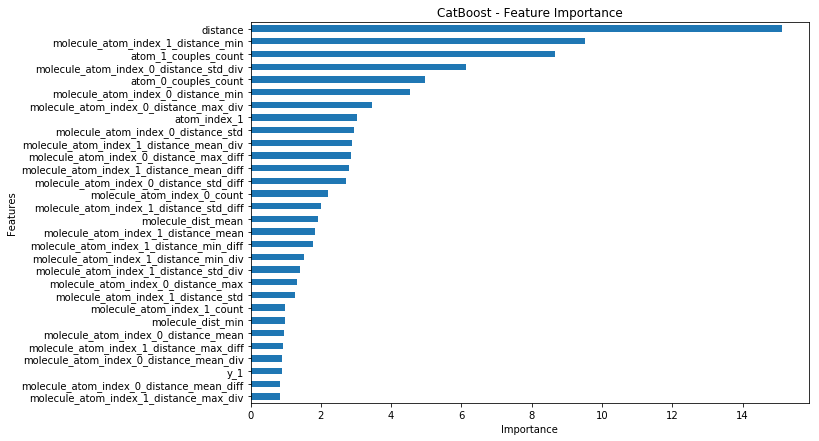

In [40]:
show_feature_importance(model, train_map_split[coupling_type][0].columns)

#### 1JHN

In [41]:
coupling_type = '1JHN'
model = model_map[coupling_type]
y_pred = model.predict(train_map_split[coupling_type][1])

In [42]:
show_scores(train_map_split[coupling_type][3], y_pred)

Variance_Score(cat_Regressor)	:0.9611473589018391
Mean_Absolute_Error(cat_Regressor)	:1.5373073117979494
Mean_Squared_Error(cat_Regressor)	:4.673770404443461
R2-Score(cat_Regressor)	:0.9611466578566376


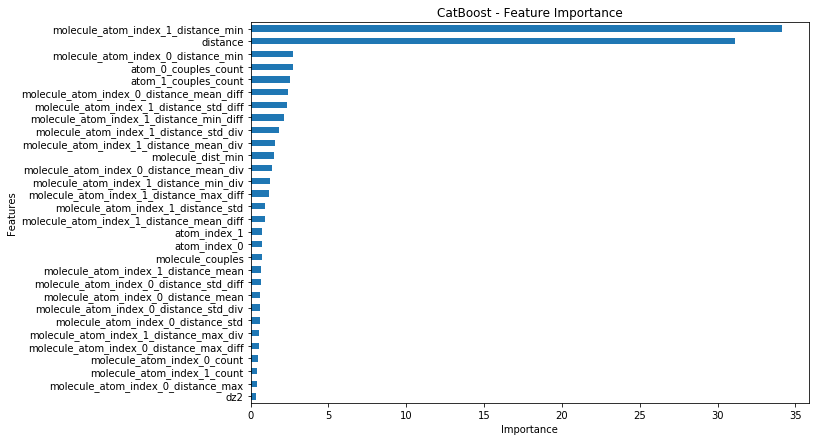

In [43]:
show_feature_importance(model, train_map_split[coupling_type][0].columns)

#### 2JHC

In [65]:
coupling_type = '2JHC'
model = model_map[coupling_type]
y_pred = model.predict(train_map_split[coupling_type][1])

In [66]:
show_scores(train_map_split[coupling_type][3], y_pred)

Variance_Score(cat_Regressor)	:0.9221655083697559
Mean_Absolute_Error(cat_Regressor)	:0.8120442067559839
Mean_Squared_Error(cat_Regressor)	:1.5877746161431325
R2-Score(cat_Regressor)	:0.922163930035095


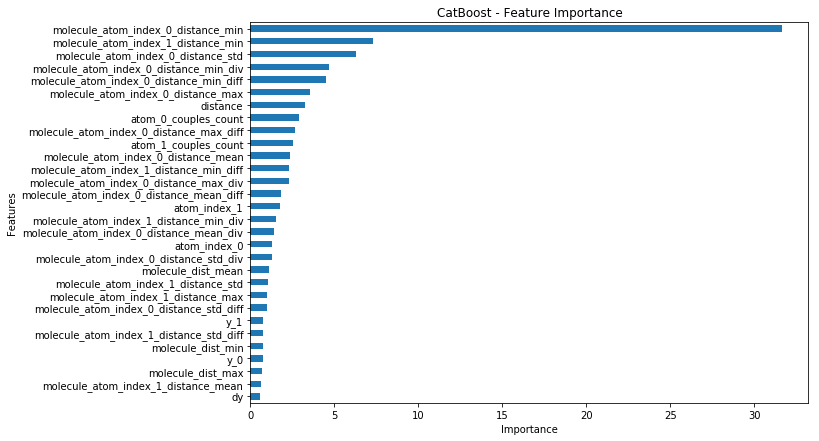

In [67]:
show_feature_importance(model, train_map_split[coupling_type][0].columns)

#### 2JHH

In [46]:
coupling_type = '2JHH'
model = model_map[coupling_type]
y_pred = model.predict(train_map_split[coupling_type][1])

In [47]:
show_scores(train_map_split[coupling_type][3], y_pred)

Variance_Score(cat_Regressor)	:0.9750875472431786
Mean_Absolute_Error(cat_Regressor)	:0.38361337239112486
Mean_Squared_Error(cat_Regressor)	:0.39303113487237484
R2-Score(cat_Regressor)	:0.9750873587712919


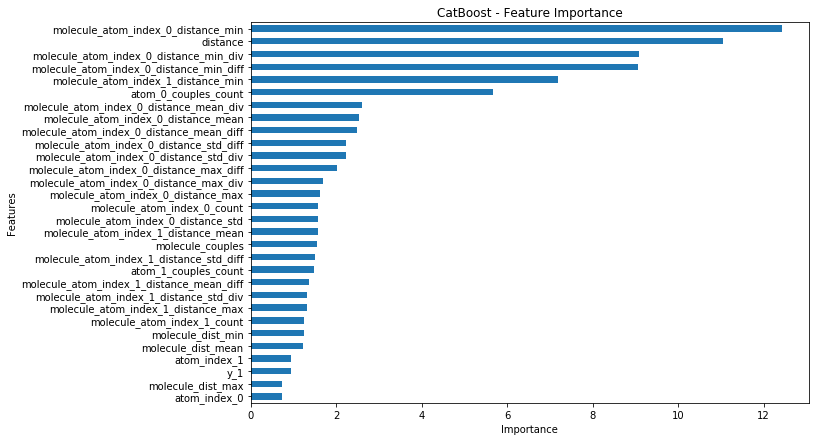

In [48]:
show_feature_importance(model, train_map_split[coupling_type][0].columns)

#### 2JHN

In [49]:
coupling_type = '2JHN'
model = model_map[coupling_type]
y_pred = model.predict(train_map_split[coupling_type][1])

In [50]:
show_scores(train_map_split[coupling_type][3], y_pred)

Variance_Score(cat_Regressor)	:0.97060832108199
Mean_Absolute_Error(cat_Regressor)	:0.3728969889935699
Mean_Squared_Error(cat_Regressor)	:0.39232595835840844
R2-Score(cat_Regressor)	:0.9706074603535453


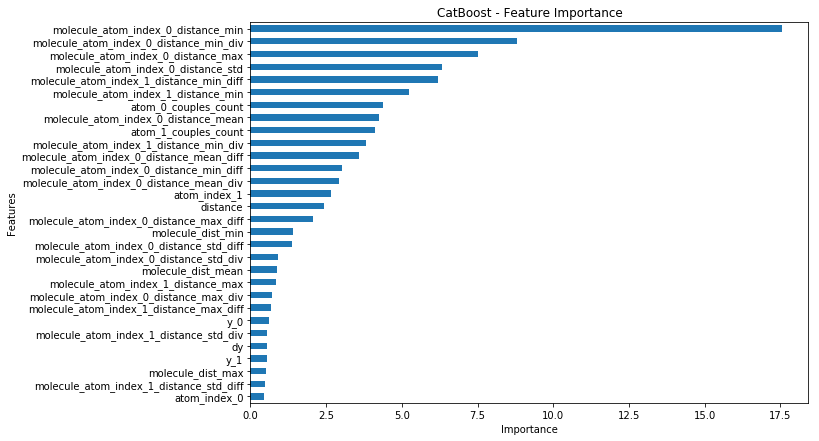

In [51]:
show_feature_importance(model, train_map_split[coupling_type][0].columns)

#### 3JHC

In [56]:
coupling_type = '3JHC'
model = model_map[coupling_type]
y_pred = model.predict(train_map_split[coupling_type][1])

In [57]:
show_scores(train_map_split[coupling_type][3], y_pred)

Variance_Score(cat_Regressor)	:0.8261361963688275
Mean_Absolute_Error(cat_Regressor)	:0.8673767224199509
Mean_Squared_Error(cat_Regressor)	:1.6389450986010392
R2-Score(cat_Regressor)	:0.8261361637319115


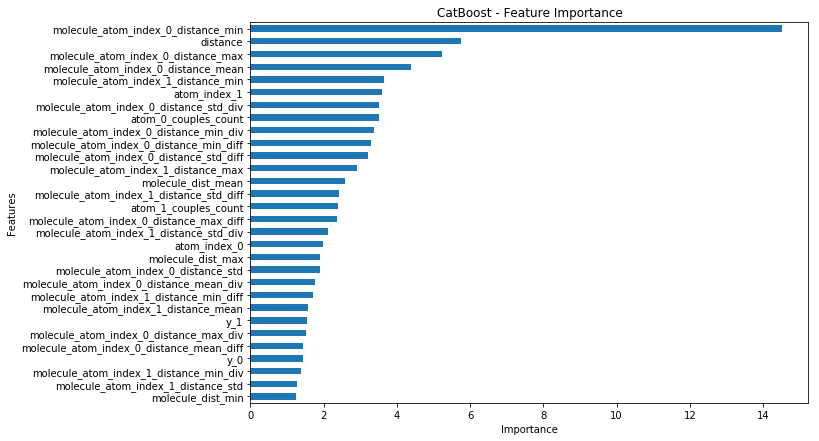

In [58]:
show_feature_importance(model, train_map_split[coupling_type][0].columns)

#### 3JHH

In [59]:
coupling_type = '3JHH'
model = model_map[coupling_type]
y_pred = model.predict(train_map_split[coupling_type][1])

In [60]:
show_scores(train_map_split[coupling_type][3], y_pred)

Variance_Score(cat_Regressor)	:0.954217759950249
Mean_Absolute_Error(cat_Regressor)	:0.4988676387807048
Mean_Squared_Error(cat_Regressor)	:0.6281927213238033
R2-Score(cat_Regressor)	:0.9542177506999817


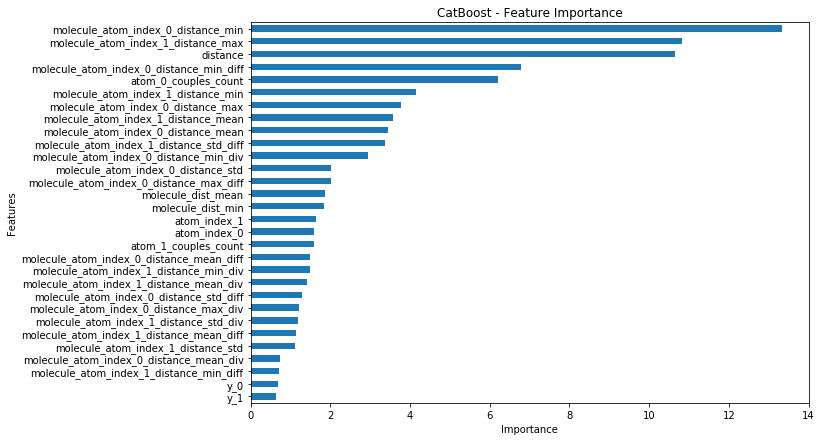

In [61]:
show_feature_importance(model, train_map_split[coupling_type][0].columns)

#### 3JHN

In [62]:
coupling_type = '3JHN'
model = model_map[coupling_type]
y_pred = model.predict(train_map_split[coupling_type][1])

In [63]:
show_scores(train_map_split[coupling_type][3], y_pred)

Variance_Score(cat_Regressor)	:0.8940709345770101
Mean_Absolute_Error(cat_Regressor)	:0.262028238736877
Mean_Squared_Error(cat_Regressor)	:0.1818985436427966
R2-Score(cat_Regressor)	:0.8940709328358816


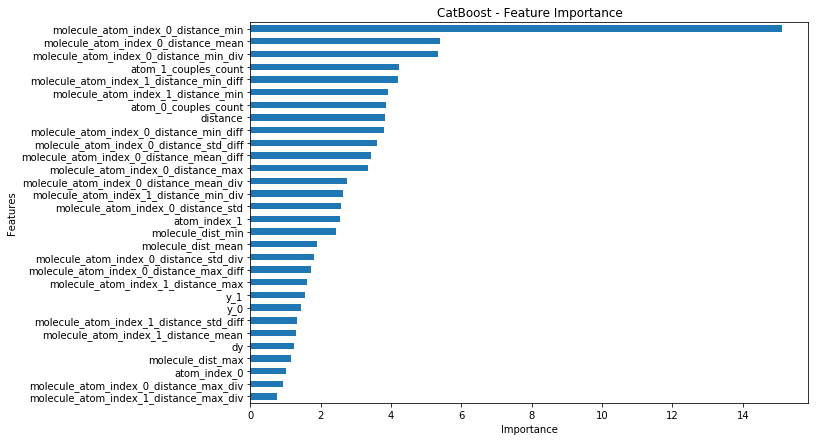

In [64]:
show_feature_importance(model, train_map_split[coupling_type][0].columns)

### Let's look at the test data and generate a score for submission

In [70]:
test = pd.read_csv(f'{input_folder}/test.csv')
structures = pd.read_csv(f'{input_folder}/structures.csv')

In [71]:
test = map_atom_info(test, 0)
test = map_atom_info(test, 1)

In [72]:
test=add_distances(test)

In [73]:
test=additional_features(test)

Mem. usage decreased to 912.78 Mb (11.6% reduction)


In [74]:
test_atom_0 = pd.get_dummies(test['atom_0'], prefix='atom_0')
test = pd.concat([test, test_atom_0], axis=1)
test_atom_1 = pd.get_dummies(test['atom_1'], prefix='atom_1')
test = pd.concat([test, test_atom_1], axis=1)

In [75]:
test = test.drop('id', axis=1)
test = test.drop('molecule_name', axis=1)
test = test.drop('atom_0', axis=1)
test = test.drop('atom_1', axis=1)

In [107]:
test.columns

Index(['atom_index_0', 'atom_index_1', 'type', 'x_0', 'y_0', 'z_0', 'x_1',
       'y_1', 'z_1', 'dx', 'dy', 'dz', 'dx2', 'dy2', 'dz2', 'distance',
       'molecule_couples', 'molecule_dist_mean', 'molecule_dist_min',
       'molecule_dist_max', 'molecule_dist_std', 'atom_0_couples_count',
       'atom_1_couples_count', 'molecule_atom_index_0_count',
       'molecule_atom_index_1_count', 'molecule_atom_index_0_distance_mean',
       'molecule_atom_index_0_distance_mean_diff',
       'molecule_atom_index_0_distance_mean_div',
       'molecule_atom_index_0_distance_std',
       'molecule_atom_index_0_distance_std_diff',
       'molecule_atom_index_0_distance_std_div',
       'molecule_atom_index_0_distance_max',
       'molecule_atom_index_0_distance_max_diff',
       'molecule_atom_index_0_distance_max_div',
       'molecule_atom_index_0_distance_min',
       'molecule_atom_index_0_distance_min_diff',
       'molecule_atom_index_0_distance_min_div',
       'molecule_atom_index_1_distance

In [154]:
# '1JHC' '2JHH' '1JHN' '2JHN' '2JHC' '3JHH' '3JHC' '3JHN'
#model_1JHC = model_map['1JHC']
#model_2JHH = model_map['2JHH']
#model_1JHN = model_map['1JHN']
#model_2JHN = model_map['2JHN']
#model_2JHC = model_map['2JHC']
#model_3JHH = model_map['3JHH']
#model_3JHC = model_map['3JHC']
#model_3JHN = model_map['3JHN']

predictions = []

def score_data(row):
    coupling_type = row['type']
    #print(coupling_type)
    row = row.drop(labels=['type'])
    row = row.tolist()
    #print(row)

    model = model_map[coupling_type]
    y_pred = model.predict(row)
    #print(y_pred)
    predictions.append(y_pred)

In [155]:
for index, row in test.iterrows():
    if index % 10000 == 0:
        print("Index: " + str(index)) 
    score_data(row)

Index: 0
Index: 10000
Index: 20000
Index: 30000
Index: 40000
Index: 50000
Index: 60000
Index: 70000
Index: 80000
Index: 90000
Index: 100000
Index: 110000
Index: 120000
Index: 130000
Index: 140000
Index: 150000
Index: 160000
Index: 170000
Index: 180000
Index: 190000
Index: 200000
Index: 210000
Index: 220000
Index: 230000
Index: 240000
Index: 250000
Index: 260000
Index: 270000
Index: 280000
Index: 290000
Index: 300000
Index: 310000
Index: 320000
Index: 330000
Index: 340000
Index: 350000
Index: 360000
Index: 370000
Index: 380000
Index: 390000
Index: 400000
Index: 410000
Index: 420000
Index: 430000
Index: 440000
Index: 450000
Index: 460000
Index: 470000
Index: 480000
Index: 490000
Index: 500000
Index: 510000
Index: 520000
Index: 530000
Index: 540000
Index: 550000
Index: 560000
Index: 570000
Index: 580000
Index: 590000
Index: 600000
Index: 610000
Index: 620000
Index: 630000
Index: 640000
Index: 650000
Index: 660000
Index: 670000
Index: 680000
Index: 690000
Index: 700000
Index: 710000
Index:

In [156]:
# OK
import numpy as np

print(f'Mean: {np.mean(predictions)}')
print(f'std: {np.std(predictions)}')
print(f'Median: {np.median(predictions)}')
print(f'Min: {np.amin(predictions, axis = 0)}')
print(f'Max: {np.amax(predictions, axis = 0)}')


Mean: 15.8866776877037
std: 34.81564731157362
Median: 2.3578563523841822
Min: -27.104786784178145
Max: 203.76013896468658


Label Encoding
- Mean: 15.88686737376035
- std: 34.660710108935
- Median: 2.629095976719184
- Min: -21.341563433735075
- Max: 220.7949596659139
<BR>
  
One Hot Encoding
- Mean: 15.88702962893186
- std: 34.66088572045097
- Median: 2.625737756448414
- Min: -21.282020727288177
- Max: 218.22497992595754

In [161]:
# OK
rows_to_compare = [0, 1, 89, 368, 3434, 12345, 100000, 2500000]
print(predictions[368])

81.4965104224747


Label Encoding
<BR>
[  2.59968011 156.2923657    3.26403273  83.85696981  86.61881557
   2.80670743  -8.41252018   0.27499807]
   
One Hot Encoding
<BR>
[  2.75261998 146.15409166   3.17457195  84.17543889  86.48490323
   2.85781352  -8.41580391   0.15665672]

### Submit scores!


-0.409 on Kaggle

In [162]:
import pandas as pd

submission = pd.read_csv('./input/sample_submission.csv')
submission['scalar_coupling_constant'] = predictions
submission.to_csv('many_features_split_type_CAT.csv', index=False)